# Lab 8 - Deep Learning 3

The goal of this week's lab is to learn to use another widely-used neural network module: recurrent neural networks (RNNs). We can use it to learn features from sequences such as time series and text.

![image](https://www.researchgate.net/profile/Huy-Tien-Nguyen/publication/321259272/figure/fig2/AS:572716866433034@1513557749934/Illustration-of-our-LSTM-model-for-sentiment-classification-Each-word-is-transfered-to-a_W640.jpg)

How should we extract features from sequences, which might be of variable length? Recurrent Neural Networks (RNNs) provide a solution by summarizing the entire sequence into a fixed-size vector representation. This week we will walk through how to use RNNs for sequence processing.

* **Review**: Convolutional Neural Networks (CNNs)
* **Unit A**: Time Series Classification and Recurrent Neural Networks (RNNs)
* **Unit B**: Recurrent Neural Networks for Text Classification

## Review

Last time we learned the basics of convolutional neural networks (CNNs) and used them for image classification.

In [1]:
# For Tables
import pandas as pd
# For Visualization
import altair as alt
# For Scikit-Learn
import sklearn
from keras.wrappers.scikit_learn import KerasClassifier
# For Neural Networks
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Reshape

We will also turn off warnings.

In [2]:
import warnings
warnings.filterwarnings('ignore')

We saw in last week how to store images and their labels in Pandas dataframes.

In [3]:
df_train = pd.read_csv('https://srush.github.io/BT-AI/notebooks/mnist_train.csv.gz', compression='gzip')
df_test = pd.read_csv('https://srush.github.io/BT-AI/notebooks/mnist_test.csv.gz', compression='gzip')

The column `class` stores the class of each image, which is a number between 0 and 9.

In [4]:
df_train[:100]["class"].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

The rest of columns store the features, where we have 784 features since our images are 28x28. Each feature stores the intensity at each pixel : for instance, the column "3x4" stores the pixel value at the 3rd row and the 4th column. Since the size of each image is 28x28, there are 28 rows and 28 columns.

To make later processing easier, we store the names of pixel value columns in a list `features`.

In [5]:
features = []
for i in range(1, 29):
    for j in range(1, 29):
        features.append(str(i) + "x" + str(j))
len(features)

784

We used the below utility functions for visualizing the images.

Convert feature to x, y, and value.

In [6]:
def position(row):
    y, x = row["index"].split("x")
    return {"x":int(x),
            "y":int(y),
            "val":row["val"]}
def draw_image(i, shuffle=False):
    t = df_train[i:i+1].T.reset_index().rename(columns={i: "val"})
    out = t.loc[t["index"] != "class"].apply(position, axis=1, result_type="expand")

    label = df_train.loc[i]["class"]
    title = "Image of a " + str(label)
    if shuffle:
        out["val"] = sklearn.utils.shuffle(out["val"], random_state=1234).reset_index()["val"]
        title = "Shuffled Image of a " + str(label)
        
    return (alt.Chart(out)
            .mark_rect()
            .properties(title=title)
            .encode(
                x="x:O",
                y="y:O",
                fill="val:Q",
                color="val:Q",
                tooltip=("x", "y", "val")
            ))

We can visualize an example image.

In [7]:
im = draw_image(0)
im

alt.Chart(...)

The task is to classify the label given an image. To do that, we first need to define a function that creates our model.

Here is what a CNN model looks like. It contains two convolution layers and two max pooling layers.

In [8]:
def create_cnn_model():
    # create model
    input_shape = (28, 28, 1)
    model = Sequential()
    model.add(Reshape(input_shape))
    model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax")) # output a vector of size 10
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])
    return model

Then we create the model and fit it on training data.

In [9]:
model = KerasClassifier(build_fn=create_cnn_model,
                         epochs=2,
                         batch_size=20,
                         verbose=1)
# fit model
model.fit(x=df_train[features].astype(float),
          y=df_train["class"])

Epoch 1/2


   1/3000 [..............................] - ETA: 28:10:25 - loss: 49.0355 - accuracy: 0.0500

   7/3000 [..............................] - ETA: 28s - loss: 35.5798 - accuracy: 0.1153     

  13/3000 [..............................] - ETA: 28s - loss: 30.1826 - accuracy: 0.1445

  19/3000 [..............................] - ETA: 28s - loss: 26.2853 - accuracy: 0.1786

  25/3000 [..............................] - ETA: 27s - loss: 23.4277 - accuracy: 0.2090

  32/3000 [..............................] - ETA: 26s - loss: 20.8702 - accuracy: 0.2455

  38/3000 [..............................] - ETA: 26s - loss: 19.1504 - accuracy: 0.2755

  44/3000 [..............................] - ETA: 27s - loss: 17.7261 - accuracy: 0.3045

  49/3000 [..............................] - ETA: 27s - loss: 16.7151 - accuracy: 0.3267

  52/3000 [..............................] - ETA: 29s - loss: 16.1707 - accuracy: 0.3394

  56/3000 [..............................] - ETA: 29s - loss: 15.5050 - accuracy: 0.3557

  60/3000 [..............................] - ETA: 31s - loss: 14.9022 - accuracy: 0.3710

  66/3000 [..............................] - ETA: 30s - loss: 14.0983 - accuracy: 0.3917

  72/3000 [..............................] - ETA: 29s - loss: 13.3909 - accuracy: 0.4106

  79/3000 [..............................] - ETA: 29s - loss: 12.6658 - accuracy: 0.4307

  86/3000 [..............................] - ETA: 28s - loss: 12.0285 - accuracy: 0.4490

  93/3000 [..............................] - ETA: 28s - loss: 11.4641 - accuracy: 0.4655

  99/3000 [..............................] - ETA: 28s - loss: 11.0280 - accuracy: 0.4785

 106/3000 [>.............................] - ETA: 27s - loss: 10.5670 - accuracy: 0.4927

 112/3000 [>.............................] - ETA: 27s - loss: 10.2075 - accuracy: 0.5039

 119/3000 [>.............................] - ETA: 27s - loss: 9.8230 - accuracy: 0.5161 

 126/3000 [>.............................] - ETA: 26s - loss: 9.4720 - accuracy: 0.5275

 133/3000 [>.............................] - ETA: 26s - loss: 9.1494 - accuracy: 0.5382

 138/3000 [>.............................] - ETA: 26s - loss: 8.9340 - accuracy: 0.5454

 144/3000 [>.............................] - ETA: 26s - loss: 8.6911 - accuracy: 0.5537

 151/3000 [>.............................] - ETA: 26s - loss: 8.4266 - accuracy: 0.5629

 158/3000 [>.............................] - ETA: 26s - loss: 8.1805 - accuracy: 0.5715

 165/3000 [>.............................] - ETA: 26s - loss: 7.9506 - accuracy: 0.5797

 172/3000 [>.............................] - ETA: 25s - loss: 7.7357 - accuracy: 0.5875

 179/3000 [>.............................] - ETA: 25s - loss: 7.5340 - accuracy: 0.5949

 185/3000 [>.............................] - ETA: 25s - loss: 7.3707 - accuracy: 0.6010

 191/3000 [>.............................] - ETA: 25s - loss: 7.2157 - accuracy: 0.6068

 198/3000 [>.............................] - ETA: 25s - loss: 7.0443 - accuracy: 0.6133

 204/3000 [=>............................] - ETA: 25s - loss: 6.9047 - accuracy: 0.6186

 210/3000 [=>............................] - ETA: 25s - loss: 6.7715 - accuracy: 0.6237

 217/3000 [=>............................] - ETA: 25s - loss: 6.6237 - accuracy: 0.6295

 224/3000 [=>............................] - ETA: 25s - loss: 6.4833 - accuracy: 0.6349

 231/3000 [=>............................] - ETA: 25s - loss: 6.3497 - accuracy: 0.6402

 238/3000 [=>............................] - ETA: 24s - loss: 6.2225 - accuracy: 0.6452

 244/3000 [=>............................] - ETA: 24s - loss: 6.1182 - accuracy: 0.6494

 247/3000 [=>............................] - ETA: 25s - loss: 6.0676 - accuracy: 0.6514

 251/3000 [=>............................] - ETA: 25s - loss: 6.0016 - accuracy: 0.6540

 257/3000 [=>............................] - ETA: 25s - loss: 5.9058 - accuracy: 0.6579

 262/3000 [=>............................] - ETA: 25s - loss: 5.8287 - accuracy: 0.6610

 267/3000 [=>............................] - ETA: 25s - loss: 5.7539 - accuracy: 0.6641

 270/3000 [=>............................] - ETA: 25s - loss: 5.7101 - accuracy: 0.6659

 275/3000 [=>............................] - ETA: 25s - loss: 5.6389 - accuracy: 0.6688

 281/3000 [=>............................] - ETA: 25s - loss: 5.5561 - accuracy: 0.6722

 284/3000 [=>............................] - ETA: 25s - loss: 5.5158 - accuracy: 0.6738

 288/3000 [=>............................] - ETA: 25s - loss: 5.4632 - accuracy: 0.6760

 292/3000 [=>............................] - ETA: 25s - loss: 5.4117 - accuracy: 0.6781

 295/3000 [=>............................] - ETA: 26s - loss: 5.3739 - accuracy: 0.6796

 297/3000 [=>............................] - ETA: 26s - loss: 5.3490 - accuracy: 0.6807

 299/3000 [=>............................] - ETA: 26s - loss: 5.3243 - accuracy: 0.6817

 304/3000 [==>...........................] - ETA: 26s - loss: 5.2639 - accuracy: 0.6842

 310/3000 [==>...........................] - ETA: 26s - loss: 5.1936 - accuracy: 0.6871

 315/3000 [==>...........................] - ETA: 26s - loss: 5.1366 - accuracy: 0.6895

 319/3000 [==>...........................] - ETA: 26s - loss: 5.0921 - accuracy: 0.6914

 323/3000 [==>...........................] - ETA: 26s - loss: 5.0485 - accuracy: 0.6932

 329/3000 [==>...........................] - ETA: 26s - loss: 4.9846 - accuracy: 0.6959

 335/3000 [==>...........................] - ETA: 26s - loss: 4.9227 - accuracy: 0.6985

 340/3000 [==>...........................] - ETA: 26s - loss: 4.8724 - accuracy: 0.7007

 345/3000 [==>...........................] - ETA: 26s - loss: 4.8233 - accuracy: 0.7028

 350/3000 [==>...........................] - ETA: 26s - loss: 4.7754 - accuracy: 0.7049

 355/3000 [==>...........................] - ETA: 26s - loss: 4.7285 - accuracy: 0.7069

 361/3000 [==>...........................] - ETA: 26s - loss: 4.6737 - accuracy: 0.7093

 368/3000 [==>...........................] - ETA: 26s - loss: 4.6115 - accuracy: 0.7120

 374/3000 [==>...........................] - ETA: 26s - loss: 4.5599 - accuracy: 0.7143

 379/3000 [==>...........................] - ETA: 26s - loss: 4.5178 - accuracy: 0.7161

 384/3000 [==>...........................] - ETA: 26s - loss: 4.4767 - accuracy: 0.7179

 389/3000 [==>...........................] - ETA: 26s - loss: 4.4365 - accuracy: 0.7197

 394/3000 [==>...........................] - ETA: 26s - loss: 4.3971 - accuracy: 0.7214

 400/3000 [===>..........................] - ETA: 26s - loss: 4.3509 - accuracy: 0.7235

 406/3000 [===>..........................] - ETA: 26s - loss: 4.3058 - accuracy: 0.7255

 412/3000 [===>..........................] - ETA: 25s - loss: 4.2618 - accuracy: 0.7274

 418/3000 [===>..........................] - ETA: 25s - loss: 4.2189 - accuracy: 0.7293

 423/3000 [===>..........................] - ETA: 25s - loss: 4.1839 - accuracy: 0.7309

 430/3000 [===>..........................] - ETA: 25s - loss: 4.1360 - accuracy: 0.7331

 437/3000 [===>..........................] - ETA: 25s - loss: 4.0894 - accuracy: 0.7352

 444/3000 [===>..........................] - ETA: 25s - loss: 4.0440 - accuracy: 0.7372

 451/3000 [===>..........................] - ETA: 25s - loss: 3.9998 - accuracy: 0.7393

 458/3000 [===>..........................] - ETA: 25s - loss: 3.9567 - accuracy: 0.7412

 465/3000 [===>..........................] - ETA: 24s - loss: 3.9148 - accuracy: 0.7431

 472/3000 [===>..........................] - ETA: 24s - loss: 3.8738 - accuracy: 0.7450

 479/3000 [===>..........................] - ETA: 24s - loss: 3.8338 - accuracy: 0.7469

 486/3000 [===>..........................] - ETA: 24s - loss: 3.7948 - accuracy: 0.7487

 493/3000 [===>..........................] - ETA: 24s - loss: 3.7567 - accuracy: 0.7505

 500/3000 [====>.........................] - ETA: 24s - loss: 3.7195 - accuracy: 0.7522

 507/3000 [====>.........................] - ETA: 24s - loss: 3.6831 - accuracy: 0.7539

 514/3000 [====>.........................] - ETA: 23s - loss: 3.6476 - accuracy: 0.7556

 521/3000 [====>.........................] - ETA: 23s - loss: 3.6129 - accuracy: 0.7572

 528/3000 [====>.........................] - ETA: 23s - loss: 3.5789 - accuracy: 0.7588

 535/3000 [====>.........................] - ETA: 23s - loss: 3.5457 - accuracy: 0.7604

 542/3000 [====>.........................] - ETA: 23s - loss: 3.5133 - accuracy: 0.7620

 548/3000 [====>.........................] - ETA: 23s - loss: 3.4860 - accuracy: 0.7633

 553/3000 [====>.........................] - ETA: 23s - loss: 3.4637 - accuracy: 0.7643

 560/3000 [====>.........................] - ETA: 23s - loss: 3.4330 - accuracy: 0.7658

 567/3000 [====>.........................] - ETA: 23s - loss: 3.4029 - accuracy: 0.7673

 574/3000 [====>.........................] - ETA: 22s - loss: 3.3734 - accuracy: 0.7687

 581/3000 [====>.........................] - ETA: 22s - loss: 3.3445 - accuracy: 0.7701

 588/3000 [====>.........................] - ETA: 22s - loss: 3.3162 - accuracy: 0.7715

 595/3000 [====>.........................] - ETA: 22s - loss: 3.2885 - accuracy: 0.7728

 602/3000 [=====>........................] - ETA: 22s - loss: 3.2613 - accuracy: 0.7742

 609/3000 [=====>........................] - ETA: 22s - loss: 3.2346 - accuracy: 0.7755

 616/3000 [=====>........................] - ETA: 22s - loss: 3.2084 - accuracy: 0.7768

 623/3000 [=====>........................] - ETA: 22s - loss: 3.1828 - accuracy: 0.7780

 630/3000 [=====>........................] - ETA: 22s - loss: 3.1576 - accuracy: 0.7793

 637/3000 [=====>........................] - ETA: 21s - loss: 3.1329 - accuracy: 0.7805

 643/3000 [=====>........................] - ETA: 21s - loss: 3.1121 - accuracy: 0.7815

 650/3000 [=====>........................] - ETA: 21s - loss: 3.0883 - accuracy: 0.7827

 657/3000 [=====>........................] - ETA: 21s - loss: 3.0648 - accuracy: 0.7839

 662/3000 [=====>........................] - ETA: 21s - loss: 3.0483 - accuracy: 0.7847

 667/3000 [=====>........................] - ETA: 21s - loss: 3.0321 - accuracy: 0.7855

 671/3000 [=====>........................] - ETA: 21s - loss: 3.0192 - accuracy: 0.7861

 677/3000 [=====>........................] - ETA: 21s - loss: 3.0001 - accuracy: 0.7871

 681/3000 [=====>........................] - ETA: 21s - loss: 2.9876 - accuracy: 0.7877

 685/3000 [=====>........................] - ETA: 21s - loss: 2.9752 - accuracy: 0.7883

 690/3000 [=====>........................] - ETA: 21s - loss: 2.9598 - accuracy: 0.7891

 693/3000 [=====>........................] - ETA: 21s - loss: 2.9507 - accuracy: 0.7895

 697/3000 [=====>........................] - ETA: 21s - loss: 2.9386 - accuracy: 0.7901

 703/3000 [======>.......................] - ETA: 21s - loss: 2.9207 - accuracy: 0.7910

 710/3000 [======>.......................] - ETA: 21s - loss: 2.9002 - accuracy: 0.7920

 717/3000 [======>.......................] - ETA: 21s - loss: 2.8800 - accuracy: 0.7930

 723/3000 [======>.......................] - ETA: 21s - loss: 2.8630 - accuracy: 0.7939

 728/3000 [======>.......................] - ETA: 21s - loss: 2.8489 - accuracy: 0.7946

 734/3000 [======>.......................] - ETA: 21s - loss: 2.8323 - accuracy: 0.7954

 741/3000 [======>.......................] - ETA: 21s - loss: 2.8132 - accuracy: 0.7964

 746/3000 [======>.......................] - ETA: 21s - loss: 2.7998 - accuracy: 0.7971

 753/3000 [======>.......................] - ETA: 21s - loss: 2.7812 - accuracy: 0.7980

 760/3000 [======>.......................] - ETA: 20s - loss: 2.7629 - accuracy: 0.7989

 767/3000 [======>.......................] - ETA: 20s - loss: 2.7449 - accuracy: 0.7998

 774/3000 [======>.......................] - ETA: 20s - loss: 2.7271 - accuracy: 0.8007

 780/3000 [======>.......................] - ETA: 20s - loss: 2.7121 - accuracy: 0.8015

 784/3000 [======>.......................] - ETA: 20s - loss: 2.7022 - accuracy: 0.8020

 790/3000 [======>.......................] - ETA: 20s - loss: 2.6876 - accuracy: 0.8027

 797/3000 [======>.......................] - ETA: 20s - loss: 2.6707 - accuracy: 0.8036

 804/3000 [=======>......................] - ETA: 20s - loss: 2.6541 - accuracy: 0.8045

 811/3000 [=======>......................] - ETA: 20s - loss: 2.6377 - accuracy: 0.8053

 818/3000 [=======>......................] - ETA: 20s - loss: 2.6215 - accuracy: 0.8061

 825/3000 [=======>......................] - ETA: 20s - loss: 2.6056 - accuracy: 0.8069

 831/3000 [=======>......................] - ETA: 20s - loss: 2.5921 - accuracy: 0.8076

 837/3000 [=======>......................] - ETA: 20s - loss: 2.5788 - accuracy: 0.8083

 841/3000 [=======>......................] - ETA: 20s - loss: 2.5700 - accuracy: 0.8088

 845/3000 [=======>......................] - ETA: 20s - loss: 2.5613 - accuracy: 0.8092

 850/3000 [=======>......................] - ETA: 20s - loss: 2.5505 - accuracy: 0.8098

 854/3000 [=======>......................] - ETA: 20s - loss: 2.5420 - accuracy: 0.8102

 860/3000 [=======>......................] - ETA: 20s - loss: 2.5292 - accuracy: 0.8109

 865/3000 [=======>......................] - ETA: 19s - loss: 2.5187 - accuracy: 0.8115

 870/3000 [=======>......................] - ETA: 19s - loss: 2.5084 - accuracy: 0.8120

 875/3000 [=======>......................] - ETA: 19s - loss: 2.4981 - accuracy: 0.8125

 880/3000 [=======>......................] - ETA: 19s - loss: 2.4879 - accuracy: 0.8131

 884/3000 [=======>......................] - ETA: 19s - loss: 2.4798 - accuracy: 0.8135

 890/3000 [=======>......................] - ETA: 19s - loss: 2.4678 - accuracy: 0.8141

 896/3000 [=======>......................] - ETA: 19s - loss: 2.4559 - accuracy: 0.8148

 902/3000 [========>.....................] - ETA: 19s - loss: 2.4442 - accuracy: 0.8154

 905/3000 [========>.....................] - ETA: 19s - loss: 2.4384 - accuracy: 0.8157

 909/3000 [========>.....................] - ETA: 19s - loss: 2.4307 - accuracy: 0.8161

 913/3000 [========>.....................] - ETA: 19s - loss: 2.4231 - accuracy: 0.8165

 918/3000 [========>.....................] - ETA: 19s - loss: 2.4136 - accuracy: 0.8170

 924/3000 [========>.....................] - ETA: 19s - loss: 2.4023 - accuracy: 0.8176

 930/3000 [========>.....................] - ETA: 19s - loss: 2.3912 - accuracy: 0.8182

 936/3000 [========>.....................] - ETA: 19s - loss: 2.3802 - accuracy: 0.8188

 941/3000 [========>.....................] - ETA: 19s - loss: 2.3711 - accuracy: 0.8193

 945/3000 [========>.....................] - ETA: 19s - loss: 2.3639 - accuracy: 0.8196

 949/3000 [========>.....................] - ETA: 19s - loss: 2.3567 - accuracy: 0.8200

 952/3000 [========>.....................] - ETA: 19s - loss: 2.3514 - accuracy: 0.8203

 957/3000 [========>.....................] - ETA: 19s - loss: 2.3425 - accuracy: 0.8208

 962/3000 [========>.....................] - ETA: 19s - loss: 2.3338 - accuracy: 0.8213

 965/3000 [========>.....................] - ETA: 19s - loss: 2.3285 - accuracy: 0.8215

 969/3000 [========>.....................] - ETA: 19s - loss: 2.3216 - accuracy: 0.8219

 972/3000 [========>.....................] - ETA: 19s - loss: 2.3165 - accuracy: 0.8222

 975/3000 [========>.....................] - ETA: 19s - loss: 2.3113 - accuracy: 0.8225

 978/3000 [========>.....................] - ETA: 19s - loss: 2.3062 - accuracy: 0.8227

 981/3000 [========>.....................] - ETA: 19s - loss: 2.3012 - accuracy: 0.8230

 984/3000 [========>.....................] - ETA: 19s - loss: 2.2961 - accuracy: 0.8233

 988/3000 [========>.....................] - ETA: 19s - loss: 2.2894 - accuracy: 0.8236

 993/3000 [========>.....................] - ETA: 19s - loss: 2.2811 - accuracy: 0.8241

 997/3000 [========>.....................] - ETA: 19s - loss: 2.2745 - accuracy: 0.8245

1002/3000 [=========>....................] - ETA: 19s - loss: 2.2663 - accuracy: 0.8249

1007/3000 [=========>....................] - ETA: 19s - loss: 2.2582 - accuracy: 0.8253

1012/3000 [=========>....................] - ETA: 19s - loss: 2.2501 - accuracy: 0.8258

1016/3000 [=========>....................] - ETA: 19s - loss: 2.2438 - accuracy: 0.8261

1021/3000 [=========>....................] - ETA: 19s - loss: 2.2358 - accuracy: 0.8266

1027/3000 [=========>....................] - ETA: 19s - loss: 2.2264 - accuracy: 0.8271

1032/3000 [=========>....................] - ETA: 19s - loss: 2.2186 - accuracy: 0.8275

1037/3000 [=========>....................] - ETA: 19s - loss: 2.2109 - accuracy: 0.8279

1041/3000 [=========>....................] - ETA: 19s - loss: 2.2048 - accuracy: 0.8283

1046/3000 [=========>....................] - ETA: 19s - loss: 2.1972 - accuracy: 0.8287

1051/3000 [=========>....................] - ETA: 19s - loss: 2.1896 - accuracy: 0.8291

1057/3000 [=========>....................] - ETA: 19s - loss: 2.1806 - accuracy: 0.8296

1063/3000 [=========>....................] - ETA: 19s - loss: 2.1717 - accuracy: 0.8301

1070/3000 [=========>....................] - ETA: 19s - loss: 2.1615 - accuracy: 0.8307

1077/3000 [=========>....................] - ETA: 19s - loss: 2.1513 - accuracy: 0.8312

1082/3000 [=========>....................] - ETA: 18s - loss: 2.1441 - accuracy: 0.8316

1086/3000 [=========>....................] - ETA: 18s - loss: 2.1384 - accuracy: 0.8319

1091/3000 [=========>....................] - ETA: 18s - loss: 2.1313 - accuracy: 0.8323

1097/3000 [=========>....................] - ETA: 18s - loss: 2.1229 - accuracy: 0.8328

1104/3000 [==========>...................] - ETA: 18s - loss: 2.1132 - accuracy: 0.8333

1111/3000 [==========>...................] - ETA: 18s - loss: 2.1035 - accuracy: 0.8339

1117/3000 [==========>...................] - ETA: 18s - loss: 2.0954 - accuracy: 0.8343

1124/3000 [==========>...................] - ETA: 18s - loss: 2.0859 - accuracy: 0.8349

1129/3000 [==========>...................] - ETA: 18s - loss: 2.0792 - accuracy: 0.8352

1131/3000 [==========>...................] - ETA: 18s - loss: 2.0766 - accuracy: 0.8354

1134/3000 [==========>...................] - ETA: 18s - loss: 2.0726 - accuracy: 0.8356

1135/3000 [==========>...................] - ETA: 18s - loss: 2.0713 - accuracy: 0.8357

1139/3000 [==========>...................] - ETA: 18s - loss: 2.0660 - accuracy: 0.8360

1140/3000 [==========>...................] - ETA: 19s - loss: 2.0647 - accuracy: 0.8361

1141/3000 [==========>...................] - ETA: 19s - loss: 2.0634 - accuracy: 0.8361

1145/3000 [==========>...................] - ETA: 19s - loss: 2.0582 - accuracy: 0.8364

1147/3000 [==========>...................] - ETA: 19s - loss: 2.0556 - accuracy: 0.8366

1148/3000 [==========>...................] - ETA: 19s - loss: 2.0543 - accuracy: 0.8366

1151/3000 [==========>...................] - ETA: 19s - loss: 2.0504 - accuracy: 0.8369

1154/3000 [==========>...................] - ETA: 19s - loss: 2.0466 - accuracy: 0.8371

1157/3000 [==========>...................] - ETA: 19s - loss: 2.0428 - accuracy: 0.8373

1162/3000 [==========>...................] - ETA: 19s - loss: 2.0364 - accuracy: 0.8376

1163/3000 [==========>...................] - ETA: 19s - loss: 2.0351 - accuracy: 0.8377

1166/3000 [==========>...................] - ETA: 19s - loss: 2.0313 - accuracy: 0.8379

1170/3000 [==========>...................] - ETA: 19s - loss: 2.0263 - accuracy: 0.8382

1174/3000 [==========>...................] - ETA: 19s - loss: 2.0213 - accuracy: 0.8385

1178/3000 [==========>...................] - ETA: 19s - loss: 2.0164 - accuracy: 0.8388

1180/3000 [==========>...................] - ETA: 19s - loss: 2.0139 - accuracy: 0.8389

1183/3000 [==========>...................] - ETA: 19s - loss: 2.0102 - accuracy: 0.8391

1187/3000 [==========>...................] - ETA: 19s - loss: 2.0053 - accuracy: 0.8394

1189/3000 [==========>...................] - ETA: 19s - loss: 2.0029 - accuracy: 0.8395

1191/3000 [==========>...................] - ETA: 19s - loss: 2.0004 - accuracy: 0.8397

1192/3000 [==========>...................] - ETA: 19s - loss: 1.9992 - accuracy: 0.8397

1195/3000 [==========>...................] - ETA: 19s - loss: 1.9956 - accuracy: 0.8400

1199/3000 [==========>...................] - ETA: 19s - loss: 1.9908 - accuracy: 0.8402



1202/3000 [===========>..................] - ETA: 19s - loss: 1.9872 - accuracy: 0.8404

1206/3000 [===========>..................] - ETA: 19s - loss: 1.9824 - accuracy: 0.8407

1211/3000 [===========>..................] - ETA: 19s - loss: 1.9765 - accuracy: 0.8410

1215/3000 [===========>..................] - ETA: 19s - loss: 1.9718 - accuracy: 0.8413

1218/3000 [===========>..................] - ETA: 19s - loss: 1.9683 - accuracy: 0.8415

1220/3000 [===========>..................] - ETA: 19s - loss: 1.9660 - accuracy: 0.8416

1223/3000 [===========>..................] - ETA: 19s - loss: 1.9625 - accuracy: 0.8418

1225/3000 [===========>..................] - ETA: 19s - loss: 1.9602 - accuracy: 0.8420

1226/3000 [===========>..................] - ETA: 19s - loss: 1.9590 - accuracy: 0.8420

1229/3000 [===========>..................] - ETA: 19s - loss: 1.9555 - accuracy: 0.8422

1232/3000 [===========>..................] - ETA: 19s - loss: 1.9521 - accuracy: 0.8424

1234/3000 [===========>..................] - ETA: 19s - loss: 1.9498 - accuracy: 0.8425

1238/3000 [===========>..................] - ETA: 19s - loss: 1.9453 - accuracy: 0.8428

1242/3000 [===========>..................] - ETA: 19s - loss: 1.9407 - accuracy: 0.8431

1245/3000 [===========>..................] - ETA: 19s - loss: 1.9374 - accuracy: 0.8433

1247/3000 [===========>..................] - ETA: 19s - loss: 1.9351 - accuracy: 0.8434

1251/3000 [===========>..................] - ETA: 19s - loss: 1.9306 - accuracy: 0.8436

1254/3000 [===========>..................] - ETA: 19s - loss: 1.9273 - accuracy: 0.8438

1258/3000 [===========>..................] - ETA: 19s - loss: 1.9229 - accuracy: 0.8441

1261/3000 [===========>..................] - ETA: 19s - loss: 1.9196 - accuracy: 0.8443

1264/3000 [===========>..................] - ETA: 19s - loss: 1.9163 - accuracy: 0.8445

1266/3000 [===========>..................] - ETA: 19s - loss: 1.9141 - accuracy: 0.8446

1267/3000 [===========>..................] - ETA: 19s - loss: 1.9130 - accuracy: 0.8446

1269/3000 [===========>..................] - ETA: 20s - loss: 1.9108 - accuracy: 0.8448

1270/3000 [===========>..................] - ETA: 20s - loss: 1.9097 - accuracy: 0.8448

1272/3000 [===========>..................] - ETA: 20s - loss: 1.9076 - accuracy: 0.8450

1274/3000 [===========>..................] - ETA: 20s - loss: 1.9054 - accuracy: 0.8451

1278/3000 [===========>..................] - ETA: 20s - loss: 1.9011 - accuracy: 0.8453

1282/3000 [===========>..................] - ETA: 20s - loss: 1.8968 - accuracy: 0.8456

1285/3000 [===========>..................] - ETA: 20s - loss: 1.8936 - accuracy: 0.8458

1290/3000 [===========>..................] - ETA: 20s - loss: 1.8883 - accuracy: 0.8461

1293/3000 [===========>..................] - ETA: 20s - loss: 1.8851 - accuracy: 0.8462

1297/3000 [===========>..................] - ETA: 20s - loss: 1.8809 - accuracy: 0.8465

1300/3000 [============>.................] - ETA: 20s - loss: 1.8778 - accuracy: 0.8467

1301/3000 [============>.................] - ETA: 20s - loss: 1.8767 - accuracy: 0.8467

1304/3000 [============>.................] - ETA: 20s - loss: 1.8736 - accuracy: 0.8469

1305/3000 [============>.................] - ETA: 20s - loss: 1.8726 - accuracy: 0.8470

1306/3000 [============>.................] - ETA: 20s - loss: 1.8715 - accuracy: 0.8470

1307/3000 [============>.................] - ETA: 20s - loss: 1.8705 - accuracy: 0.8471

1310/3000 [============>.................] - ETA: 20s - loss: 1.8674 - accuracy: 0.8473

1312/3000 [============>.................] - ETA: 20s - loss: 1.8654 - accuracy: 0.8474

1313/3000 [============>.................] - ETA: 20s - loss: 1.8643 - accuracy: 0.8474

1316/3000 [============>.................] - ETA: 20s - loss: 1.8613 - accuracy: 0.8476

1320/3000 [============>.................] - ETA: 20s - loss: 1.8572 - accuracy: 0.8479

1322/3000 [============>.................] - ETA: 20s - loss: 1.8551 - accuracy: 0.8480

1326/3000 [============>.................] - ETA: 20s - loss: 1.8511 - accuracy: 0.8482

1330/3000 [============>.................] - ETA: 20s - loss: 1.8471 - accuracy: 0.8484

1333/3000 [============>.................] - ETA: 20s - loss: 1.8441 - accuracy: 0.8486

1335/3000 [============>.................] - ETA: 20s - loss: 1.8421 - accuracy: 0.8487

1338/3000 [============>.................] - ETA: 20s - loss: 1.8391 - accuracy: 0.8489

1339/3000 [============>.................] - ETA: 20s - loss: 1.8381 - accuracy: 0.8490

1341/3000 [============>.................] - ETA: 20s - loss: 1.8361 - accuracy: 0.8491

1345/3000 [============>.................] - ETA: 20s - loss: 1.8322 - accuracy: 0.8493

1349/3000 [============>.................] - ETA: 20s - loss: 1.8282 - accuracy: 0.8495

1353/3000 [============>.................] - ETA: 20s - loss: 1.8243 - accuracy: 0.8498

1357/3000 [============>.................] - ETA: 20s - loss: 1.8204 - accuracy: 0.8500

1361/3000 [============>.................] - ETA: 20s - loss: 1.8166 - accuracy: 0.8502

1365/3000 [============>.................] - ETA: 20s - loss: 1.8127 - accuracy: 0.8504

1369/3000 [============>.................] - ETA: 20s - loss: 1.8089 - accuracy: 0.8507

1373/3000 [============>.................] - ETA: 20s - loss: 1.8051 - accuracy: 0.8509

1375/3000 [============>.................] - ETA: 20s - loss: 1.8032 - accuracy: 0.8510

1377/3000 [============>.................] - ETA: 20s - loss: 1.8013 - accuracy: 0.8511

1379/3000 [============>.................] - ETA: 20s - loss: 1.7994 - accuracy: 0.8512

1381/3000 [============>.................] - ETA: 20s - loss: 1.7975 - accuracy: 0.8513

1385/3000 [============>.................] - ETA: 20s - loss: 1.7937 - accuracy: 0.8515

1387/3000 [============>.................] - ETA: 20s - loss: 1.7919 - accuracy: 0.8516

1390/3000 [============>.................] - ETA: 20s - loss: 1.7891 - accuracy: 0.8518

1394/3000 [============>.................] - ETA: 20s - loss: 1.7853 - accuracy: 0.8520

1399/3000 [============>.................] - ETA: 20s - loss: 1.7807 - accuracy: 0.8523

1403/3000 [=============>................] - ETA: 20s - loss: 1.7770 - accuracy: 0.8525

1406/3000 [=============>................] - ETA: 20s - loss: 1.7743 - accuracy: 0.8527

1410/3000 [=============>................] - ETA: 20s - loss: 1.7707 - accuracy: 0.8529

1412/3000 [=============>................] - ETA: 20s - loss: 1.7688 - accuracy: 0.8530

1414/3000 [=============>................] - ETA: 20s - loss: 1.7670 - accuracy: 0.8531

1418/3000 [=============>................] - ETA: 20s - loss: 1.7634 - accuracy: 0.8533

1422/3000 [=============>................] - ETA: 20s - loss: 1.7598 - accuracy: 0.8535

1427/3000 [=============>................] - ETA: 20s - loss: 1.7554 - accuracy: 0.8538

1431/3000 [=============>................] - ETA: 20s - loss: 1.7518 - accuracy: 0.8540

1434/3000 [=============>................] - ETA: 20s - loss: 1.7491 - accuracy: 0.8541

1438/3000 [=============>................] - ETA: 20s - loss: 1.7456 - accuracy: 0.8544

1442/3000 [=============>................] - ETA: 19s - loss: 1.7421 - accuracy: 0.8546

1446/3000 [=============>................] - ETA: 19s - loss: 1.7386 - accuracy: 0.8548

1450/3000 [=============>................] - ETA: 19s - loss: 1.7351 - accuracy: 0.8550

1452/3000 [=============>................] - ETA: 19s - loss: 1.7334 - accuracy: 0.8551

1453/3000 [=============>................] - ETA: 19s - loss: 1.7325 - accuracy: 0.8551

1456/3000 [=============>................] - ETA: 19s - loss: 1.7300 - accuracy: 0.8553

1460/3000 [=============>................] - ETA: 19s - loss: 1.7265 - accuracy: 0.8555

1463/3000 [=============>................] - ETA: 19s - loss: 1.7240 - accuracy: 0.8556

1465/3000 [=============>................] - ETA: 19s - loss: 1.7223 - accuracy: 0.8557

1466/3000 [=============>................] - ETA: 20s - loss: 1.7214 - accuracy: 0.8558

1467/3000 [=============>................] - ETA: 20s - loss: 1.7206 - accuracy: 0.8558

1468/3000 [=============>................] - ETA: 20s - loss: 1.7197 - accuracy: 0.8559

1469/3000 [=============>................] - ETA: 20s - loss: 1.7189 - accuracy: 0.8559

1472/3000 [=============>................] - ETA: 20s - loss: 1.7163 - accuracy: 0.8561

1476/3000 [=============>................] - ETA: 20s - loss: 1.7129 - accuracy: 0.8563

1480/3000 [=============>................] - ETA: 20s - loss: 1.7096 - accuracy: 0.8565

1482/3000 [=============>................] - ETA: 20s - loss: 1.7079 - accuracy: 0.8566

1487/3000 [=============>................] - ETA: 20s - loss: 1.7037 - accuracy: 0.8568

1488/3000 [=============>................] - ETA: 20s - loss: 1.7029 - accuracy: 0.8569

1490/3000 [=============>................] - ETA: 20s - loss: 1.7013 - accuracy: 0.8570

1493/3000 [=============>................] - ETA: 20s - loss: 1.6988 - accuracy: 0.8571

1494/3000 [=============>................] - ETA: 20s - loss: 1.6980 - accuracy: 0.8572

1498/3000 [=============>................] - ETA: 20s - loss: 1.6947 - accuracy: 0.8574

1502/3000 [==============>...............] - ETA: 20s - loss: 1.6914 - accuracy: 0.8576

1505/3000 [==============>...............] - ETA: 20s - loss: 1.6890 - accuracy: 0.8577



1507/3000 [==============>...............] - ETA: 20s - loss: 1.6873 - accuracy: 0.8578

1510/3000 [==============>...............] - ETA: 20s - loss: 1.6849 - accuracy: 0.8580

1514/3000 [==============>...............] - ETA: 19s - loss: 1.6817 - accuracy: 0.8581

1518/3000 [==============>...............] - ETA: 19s - loss: 1.6785 - accuracy: 0.8583

1521/3000 [==============>...............] - ETA: 19s - loss: 1.6761 - accuracy: 0.8585

1525/3000 [==============>...............] - ETA: 19s - loss: 1.6729 - accuracy: 0.8587

1529/3000 [==============>...............] - ETA: 19s - loss: 1.6697 - accuracy: 0.8589

1533/3000 [==============>...............] - ETA: 19s - loss: 1.6665 - accuracy: 0.8591

1537/3000 [==============>...............] - ETA: 19s - loss: 1.6634 - accuracy: 0.8592

1542/3000 [==============>...............] - ETA: 19s - loss: 1.6595 - accuracy: 0.8595

1547/3000 [==============>...............] - ETA: 19s - loss: 1.6556 - accuracy: 0.8597

1553/3000 [==============>...............] - ETA: 19s - loss: 1.6509 - accuracy: 0.8600

1560/3000 [==============>...............] - ETA: 19s - loss: 1.6456 - accuracy: 0.8603

1567/3000 [==============>...............] - ETA: 19s - loss: 1.6402 - accuracy: 0.8606

1574/3000 [==============>...............] - ETA: 19s - loss: 1.6349 - accuracy: 0.8610

1580/3000 [==============>...............] - ETA: 18s - loss: 1.6304 - accuracy: 0.8612

1583/3000 [==============>...............] - ETA: 18s - loss: 1.6282 - accuracy: 0.8614

1585/3000 [==============>...............] - ETA: 18s - loss: 1.6267 - accuracy: 0.8615

1590/3000 [==============>...............] - ETA: 18s - loss: 1.6230 - accuracy: 0.8617

1597/3000 [==============>...............] - ETA: 18s - loss: 1.6178 - accuracy: 0.8620

1604/3000 [===============>..............] - ETA: 18s - loss: 1.6127 - accuracy: 0.8623

1610/3000 [===============>..............] - ETA: 18s - loss: 1.6083 - accuracy: 0.8626

1614/3000 [===============>..............] - ETA: 18s - loss: 1.6054 - accuracy: 0.8627

1620/3000 [===============>..............] - ETA: 18s - loss: 1.6011 - accuracy: 0.8630

1626/3000 [===============>..............] - ETA: 18s - loss: 1.5968 - accuracy: 0.8633

1632/3000 [===============>..............] - ETA: 18s - loss: 1.5925 - accuracy: 0.8635

1638/3000 [===============>..............] - ETA: 18s - loss: 1.5883 - accuracy: 0.8638

1644/3000 [===============>..............] - ETA: 17s - loss: 1.5841 - accuracy: 0.8640

1650/3000 [===============>..............] - ETA: 17s - loss: 1.5799 - accuracy: 0.8643

1656/3000 [===============>..............] - ETA: 17s - loss: 1.5757 - accuracy: 0.8645

1662/3000 [===============>..............] - ETA: 17s - loss: 1.5716 - accuracy: 0.8648

1668/3000 [===============>..............] - ETA: 17s - loss: 1.5675 - accuracy: 0.8650

1673/3000 [===============>..............] - ETA: 17s - loss: 1.5641 - accuracy: 0.8653

1677/3000 [===============>..............] - ETA: 17s - loss: 1.5614 - accuracy: 0.8654

1679/3000 [===============>..............] - ETA: 17s - loss: 1.5600 - accuracy: 0.8655

1682/3000 [===============>..............] - ETA: 17s - loss: 1.5580 - accuracy: 0.8656

1685/3000 [===============>..............] - ETA: 17s - loss: 1.5560 - accuracy: 0.8658

1690/3000 [===============>..............] - ETA: 17s - loss: 1.5527 - accuracy: 0.8660

1696/3000 [===============>..............] - ETA: 17s - loss: 1.5487 - accuracy: 0.8662

1702/3000 [================>.............] - ETA: 17s - loss: 1.5447 - accuracy: 0.8664

1707/3000 [================>.............] - ETA: 17s - loss: 1.5414 - accuracy: 0.8666

1712/3000 [================>.............] - ETA: 17s - loss: 1.5381 - accuracy: 0.8669

1718/3000 [================>.............] - ETA: 16s - loss: 1.5342 - accuracy: 0.8671

1724/3000 [================>.............] - ETA: 16s - loss: 1.5303 - accuracy: 0.8673

1731/3000 [================>.............] - ETA: 16s - loss: 1.5258 - accuracy: 0.8676

1738/3000 [================>.............] - ETA: 16s - loss: 1.5214 - accuracy: 0.8679

1745/3000 [================>.............] - ETA: 16s - loss: 1.5169 - accuracy: 0.8682

1752/3000 [================>.............] - ETA: 16s - loss: 1.5125 - accuracy: 0.8684

1759/3000 [================>.............] - ETA: 16s - loss: 1.5082 - accuracy: 0.8687

1766/3000 [================>.............] - ETA: 16s - loss: 1.5038 - accuracy: 0.8690

1773/3000 [================>.............] - ETA: 15s - loss: 1.4995 - accuracy: 0.8692

1779/3000 [================>.............] - ETA: 15s - loss: 1.4958 - accuracy: 0.8695

1786/3000 [================>.............] - ETA: 15s - loss: 1.4916 - accuracy: 0.8697

1793/3000 [================>.............] - ETA: 15s - loss: 1.4873 - accuracy: 0.8700

1800/3000 [=================>............] - ETA: 15s - loss: 1.4831 - accuracy: 0.8702

1807/3000 [=================>............] - ETA: 15s - loss: 1.4790 - accuracy: 0.8705

1814/3000 [=================>............] - ETA: 15s - loss: 1.4748 - accuracy: 0.8708

1820/3000 [=================>............] - ETA: 15s - loss: 1.4713 - accuracy: 0.8710

1827/3000 [=================>............] - ETA: 15s - loss: 1.4672 - accuracy: 0.8712

1834/3000 [=================>............] - ETA: 14s - loss: 1.4631 - accuracy: 0.8715

1841/3000 [=================>............] - ETA: 14s - loss: 1.4591 - accuracy: 0.8717

1848/3000 [=================>............] - ETA: 14s - loss: 1.4551 - accuracy: 0.8720

1854/3000 [=================>............] - ETA: 14s - loss: 1.4517 - accuracy: 0.8722

1859/3000 [=================>............] - ETA: 14s - loss: 1.4488 - accuracy: 0.8724

1865/3000 [=================>............] - ETA: 14s - loss: 1.4454 - accuracy: 0.8726

1872/3000 [=================>............] - ETA: 14s - loss: 1.4415 - accuracy: 0.8728

1878/3000 [=================>............] - ETA: 14s - loss: 1.4382 - accuracy: 0.8730

1884/3000 [=================>............] - ETA: 14s - loss: 1.4348 - accuracy: 0.8732

1891/3000 [=================>............] - ETA: 14s - loss: 1.4310 - accuracy: 0.8735

1896/3000 [=================>............] - ETA: 14s - loss: 1.4282 - accuracy: 0.8737

1901/3000 [==================>...........] - ETA: 13s - loss: 1.4255 - accuracy: 0.8738

1905/3000 [==================>...........] - ETA: 13s - loss: 1.4233 - accuracy: 0.8740

1910/3000 [==================>...........] - ETA: 13s - loss: 1.4206 - accuracy: 0.8741

1915/3000 [==================>...........] - ETA: 13s - loss: 1.4179 - accuracy: 0.8743

1920/3000 [==================>...........] - ETA: 13s - loss: 1.4153 - accuracy: 0.8745

1927/3000 [==================>...........] - ETA: 13s - loss: 1.4115 - accuracy: 0.8747

1934/3000 [==================>...........] - ETA: 13s - loss: 1.4078 - accuracy: 0.8749

1941/3000 [==================>...........] - ETA: 13s - loss: 1.4041 - accuracy: 0.8752

1948/3000 [==================>...........] - ETA: 13s - loss: 1.4005 - accuracy: 0.8754

1955/3000 [==================>...........] - ETA: 13s - loss: 1.3968 - accuracy: 0.8756

1961/3000 [==================>...........] - ETA: 13s - loss: 1.3937 - accuracy: 0.8758

1968/3000 [==================>...........] - ETA: 12s - loss: 1.3901 - accuracy: 0.8760

1974/3000 [==================>...........] - ETA: 12s - loss: 1.3871 - accuracy: 0.8762

1980/3000 [==================>...........] - ETA: 12s - loss: 1.3840 - accuracy: 0.8764

1987/3000 [==================>...........] - ETA: 12s - loss: 1.3805 - accuracy: 0.8767

1994/3000 [==================>...........] - ETA: 12s - loss: 1.3769 - accuracy: 0.8769

2001/3000 [===================>..........] - ETA: 12s - loss: 1.3734 - accuracy: 0.8771

2008/3000 [===================>..........] - ETA: 12s - loss: 1.3700 - accuracy: 0.8773

2013/3000 [===================>..........] - ETA: 12s - loss: 1.3675 - accuracy: 0.8775

2019/3000 [===================>..........] - ETA: 12s - loss: 1.3645 - accuracy: 0.8777

2026/3000 [===================>..........] - ETA: 12s - loss: 1.3611 - accuracy: 0.8779

2032/3000 [===================>..........] - ETA: 12s - loss: 1.3582 - accuracy: 0.8781

2038/3000 [===================>..........] - ETA: 11s - loss: 1.3553 - accuracy: 0.8782

2044/3000 [===================>..........] - ETA: 11s - loss: 1.3524 - accuracy: 0.8784

2049/3000 [===================>..........] - ETA: 11s - loss: 1.3500 - accuracy: 0.8786

2055/3000 [===================>..........] - ETA: 11s - loss: 1.3471 - accuracy: 0.8788

2061/3000 [===================>..........] - ETA: 11s - loss: 1.3443 - accuracy: 0.8789

2067/3000 [===================>..........] - ETA: 11s - loss: 1.3415 - accuracy: 0.8791

2073/3000 [===================>..........] - ETA: 11s - loss: 1.3387 - accuracy: 0.8793

2079/3000 [===================>..........] - ETA: 11s - loss: 1.3359 - accuracy: 0.8795

2085/3000 [===================>..........] - ETA: 11s - loss: 1.3331 - accuracy: 0.8796

2089/3000 [===================>..........] - ETA: 11s - loss: 1.3312 - accuracy: 0.8798

2094/3000 [===================>..........] - ETA: 11s - loss: 1.3289 - accuracy: 0.8799

2099/3000 [===================>..........] - ETA: 11s - loss: 1.3266 - accuracy: 0.8801

2105/3000 [====================>.........] - ETA: 11s - loss: 1.3239 - accuracy: 0.8802

2110/3000 [====================>.........] - ETA: 10s - loss: 1.3216 - accuracy: 0.8804

2115/3000 [====================>.........] - ETA: 10s - loss: 1.3193 - accuracy: 0.8805

2120/3000 [====================>.........] - ETA: 10s - loss: 1.3171 - accuracy: 0.8807

2124/3000 [====================>.........] - ETA: 10s - loss: 1.3153 - accuracy: 0.8808

2128/3000 [====================>.........] - ETA: 10s - loss: 1.3135 - accuracy: 0.8809

2132/3000 [====================>.........] - ETA: 10s - loss: 1.3117 - accuracy: 0.8810

2136/3000 [====================>.........] - ETA: 10s - loss: 1.3099 - accuracy: 0.8811

2140/3000 [====================>.........] - ETA: 10s - loss: 1.3081 - accuracy: 0.8812

2145/3000 [====================>.........] - ETA: 10s - loss: 1.3059 - accuracy: 0.8814

2149/3000 [====================>.........] - ETA: 10s - loss: 1.3042 - accuracy: 0.8815

2153/3000 [====================>.........] - ETA: 10s - loss: 1.3024 - accuracy: 0.8816

2158/3000 [====================>.........] - ETA: 10s - loss: 1.3002 - accuracy: 0.8817

2164/3000 [====================>.........] - ETA: 10s - loss: 1.2976 - accuracy: 0.8819

2169/3000 [====================>.........] - ETA: 10s - loss: 1.2954 - accuracy: 0.8820

2173/3000 [====================>.........] - ETA: 10s - loss: 1.2937 - accuracy: 0.8821

2177/3000 [====================>.........] - ETA: 10s - loss: 1.2920 - accuracy: 0.8823

2182/3000 [====================>.........] - ETA: 10s - loss: 1.2898 - accuracy: 0.8824

2186/3000 [====================>.........] - ETA: 10s - loss: 1.2881 - accuracy: 0.8825

2190/3000 [====================>.........] - ETA: 10s - loss: 1.2864 - accuracy: 0.8826

2194/3000 [====================>.........] - ETA: 9s - loss: 1.2847 - accuracy: 0.8827 

2198/3000 [====================>.........] - ETA: 9s - loss: 1.2830 - accuracy: 0.8828

2202/3000 [=====================>........] - ETA: 9s - loss: 1.2813 - accuracy: 0.8829

2206/3000 [=====================>........] - ETA: 9s - loss: 1.2796 - accuracy: 0.8830

2211/3000 [=====================>........] - ETA: 9s - loss: 1.2775 - accuracy: 0.8832

2215/3000 [=====================>........] - ETA: 9s - loss: 1.2759 - accuracy: 0.8833

2220/3000 [=====================>........] - ETA: 9s - loss: 1.2738 - accuracy: 0.8834

2225/3000 [=====================>........] - ETA: 9s - loss: 1.2717 - accuracy: 0.8835

2230/3000 [=====================>........] - ETA: 9s - loss: 1.2696 - accuracy: 0.8837

2234/3000 [=====================>........] - ETA: 9s - loss: 1.2680 - accuracy: 0.8838

2238/3000 [=====================>........] - ETA: 9s - loss: 1.2663 - accuracy: 0.8839

2242/3000 [=====================>........] - ETA: 9s - loss: 1.2647 - accuracy: 0.8840

2247/3000 [=====================>........] - ETA: 9s - loss: 1.2627 - accuracy: 0.8841

2251/3000 [=====================>........] - ETA: 9s - loss: 1.2610 - accuracy: 0.8842

2255/3000 [=====================>........] - ETA: 9s - loss: 1.2594 - accuracy: 0.8843

2260/3000 [=====================>........] - ETA: 9s - loss: 1.2574 - accuracy: 0.8845

2265/3000 [=====================>........] - ETA: 9s - loss: 1.2554 - accuracy: 0.8846

2268/3000 [=====================>........] - ETA: 9s - loss: 1.2542 - accuracy: 0.8847

2270/3000 [=====================>........] - ETA: 9s - loss: 1.2534 - accuracy: 0.8847

2273/3000 [=====================>........] - ETA: 9s - loss: 1.2522 - accuracy: 0.8848

2276/3000 [=====================>........] - ETA: 9s - loss: 1.2510 - accuracy: 0.8849

2278/3000 [=====================>........] - ETA: 8s - loss: 1.2502 - accuracy: 0.8849

2279/3000 [=====================>........] - ETA: 9s - loss: 1.2498 - accuracy: 0.8850

2282/3000 [=====================>........] - ETA: 8s - loss: 1.2486 - accuracy: 0.8850

2286/3000 [=====================>........] - ETA: 8s - loss: 1.2470 - accuracy: 0.8851

2290/3000 [=====================>........] - ETA: 8s - loss: 1.2454 - accuracy: 0.8852

2293/3000 [=====================>........] - ETA: 8s - loss: 1.2442 - accuracy: 0.8853

2296/3000 [=====================>........] - ETA: 8s - loss: 1.2430 - accuracy: 0.8854

2298/3000 [=====================>........] - ETA: 8s - loss: 1.2423 - accuracy: 0.8854

2301/3000 [======================>.......] - ETA: 8s - loss: 1.2411 - accuracy: 0.8855

2305/3000 [======================>.......] - ETA: 8s - loss: 1.2395 - accuracy: 0.8856

2309/3000 [======================>.......] - ETA: 8s - loss: 1.2380 - accuracy: 0.8857

2313/3000 [======================>.......] - ETA: 8s - loss: 1.2364 - accuracy: 0.8858

2317/3000 [======================>.......] - ETA: 8s - loss: 1.2349 - accuracy: 0.8859

2321/3000 [======================>.......] - ETA: 8s - loss: 1.2333 - accuracy: 0.8860

2326/3000 [======================>.......] - ETA: 8s - loss: 1.2314 - accuracy: 0.8861

2332/3000 [======================>.......] - ETA: 8s - loss: 1.2291 - accuracy: 0.8863

2338/3000 [======================>.......] - ETA: 8s - loss: 1.2268 - accuracy: 0.8864

2343/3000 [======================>.......] - ETA: 8s - loss: 1.2249 - accuracy: 0.8866

2346/3000 [======================>.......] - ETA: 8s - loss: 1.2238 - accuracy: 0.8866

2348/3000 [======================>.......] - ETA: 8s - loss: 1.2230 - accuracy: 0.8867

2349/3000 [======================>.......] - ETA: 8s - loss: 1.2226 - accuracy: 0.8867

2352/3000 [======================>.......] - ETA: 8s - loss: 1.2215 - accuracy: 0.8868

2353/3000 [======================>.......]

 - ETA: 8s - loss: 1.2211 - accuracy: 0.8868

2354/3000 [======================>.......] - ETA: 8s - loss: 1.2207 - accuracy: 0.8868

2358/3000 [======================>.......] - ETA: 8s - loss: 1.2192 - accuracy: 0.8869

2362/3000 [======================>.......] - ETA: 8s - loss: 1.2177 - accuracy: 0.8870

2367/3000 [======================>.......] - ETA: 8s - loss: 1.2159 - accuracy: 0.8872

2370/3000 [======================>.......] - ETA: 8s - loss: 1.2148 - accuracy: 0.8872

2371/3000 [======================>.......] - ETA: 8s - loss: 1.2144 - accuracy: 0.8873

2374/3000 [======================>.......] - ETA: 7s - loss: 1.2133 - accuracy: 0.8873

2378/3000 [======================>.......] - ETA: 7s - loss: 1.2118 - accuracy: 0.8874

2382/3000 [======================>.......] - ETA: 7s - loss: 1.2103 - accuracy: 0.8875

2385/3000 [======================>.......] - ETA: 7s - loss: 1.2092 - accuracy: 0.8876

2388/3000 [======================>.......] - ETA: 7s - loss: 1.2081 - accuracy: 0.8877

2391/3000 [======================>.......] - ETA: 7s - loss: 1.2070 - accuracy: 0.8877

2395/3000 [======================>.......] - ETA: 7s - loss: 1.2055 - accuracy: 0.8878

2398/3000 [======================>.......] - ETA: 7s - loss: 1.2044 - accuracy: 0.8879

2402/3000 [=======================>......] - ETA: 7s - loss: 1.2030 - accuracy: 0.8880

2403/3000 [=======================>......] - ETA: 7s - loss: 1.2026 - accuracy: 0.8880

2406/3000 [=======================>......] - ETA: 7s - loss: 1.2015 - accuracy: 0.8881

2410/3000 [=======================>......] - ETA: 7s - loss: 1.2001 - accuracy: 0.8882

2413/3000 [=======================>......] - ETA: 7s - loss: 1.1990 - accuracy: 0.8883

2416/3000 [=======================>......] - ETA: 7s - loss: 1.1979 - accuracy: 0.8883

2420/3000 [=======================>......] - ETA: 7s - loss: 1.1965 - accuracy: 0.8884

2424/3000 [=======================>......] - ETA: 7s - loss: 1.1951 - accuracy: 0.8885

2428/3000 [=======================>......] - ETA: 7s - loss: 1.1936 - accuracy: 0.8886

2429/3000 [=======================>......] - ETA: 7s - loss: 1.1933 - accuracy: 0.8886

2430/3000 [=======================>......] - ETA: 7s - loss: 1.1929 - accuracy: 0.8887

2434/3000 [=======================>......] - ETA: 7s - loss: 1.1915 - accuracy: 0.8887

2439/3000 [=======================>......] - ETA: 7s - loss: 1.1897 - accuracy: 0.8889

2443/3000 [=======================>......] - ETA: 7s - loss: 1.1883 - accuracy: 0.8890

2446/3000 [=======================>......] - ETA: 7s - loss: 1.1872 - accuracy: 0.8890

2447/3000 [=======================>......] - ETA: 7s - loss: 1.1869 - accuracy: 0.8890

2448/3000 [=======================>......] - ETA: 7s - loss: 1.1865 - accuracy: 0.8891

2451/3000 [=======================>......] - ETA: 7s - loss: 1.1855 - accuracy: 0.8891

2456/3000 [=======================>......] - ETA: 7s - loss: 1.1837 - accuracy: 0.8893

2461/3000 [=======================>......] - ETA: 7s - loss: 1.1820 - accuracy: 0.8894

2464/3000 [=======================>......] - ETA: 6s - loss: 1.1809 - accuracy: 0.8894

2465/3000 [=======================>......] - ETA: 6s - loss: 1.1806 - accuracy: 0.8895

2468/3000 [=======================>......] - ETA: 6s - loss: 1.1796 - accuracy: 0.8895

2473/3000 [=======================>......] - ETA: 6s - loss: 1.1778 - accuracy: 0.8896

2476/3000 [=======================>......] - ETA: 6s - loss: 1.1768 - accuracy: 0.8897

2479/3000 [=======================>......] - ETA: 6s - loss: 1.1758 - accuracy: 0.8898

2483/3000 [=======================>......] - ETA: 6s - loss: 1.1744 - accuracy: 0.8899

2487/3000 [=======================>......] - ETA: 6s - loss: 1.1730 - accuracy: 0.8900

2489/3000 [=======================>......] - ETA: 6s - loss: 1.1723 - accuracy: 0.8900

2490/3000 [=======================>......] - ETA: 6s - loss: 1.1720 - accuracy: 0.8900

2493/3000 [=======================>......] - ETA: 6s - loss: 1.1710 - accuracy: 0.8901

2497/3000 [=======================>......] - ETA: 6s - loss: 1.1696 - accuracy: 0.8902

2503/3000 [========================>.....] - ETA: 6s - loss: 1.1676 - accuracy: 0.8903

2505/3000 [========================>.....] - ETA: 6s - loss: 1.1669 - accuracy: 0.8904

2510/3000 [========================>.....] - ETA: 6s - loss: 1.1652 - accuracy: 0.8905

2515/3000 [========================>.....] - ETA: 6s - loss: 1.1635 - accuracy: 0.8906

2521/3000 [========================>.....] - ETA: 6s - loss: 1.1615 - accuracy: 0.8907

2527/3000 [========================>.....] - ETA: 6s - loss: 1.1595 - accuracy: 0.8908

2534/3000 [========================>.....] - ETA: 6s - loss: 1.1572 - accuracy: 0.8910

2541/3000 [========================>.....] - ETA: 6s - loss: 1.1549 - accuracy: 0.8911

2548/3000 [========================>.....] - ETA: 5s - loss: 1.1526 - accuracy: 0.8913

2555/3000 [========================>.....] - ETA: 5s - loss: 1.1503 - accuracy: 0.8914

2562/3000 [========================>.....] - ETA: 5s - loss: 1.1480 - accuracy: 0.8916

2569/3000 [========================>.....] - ETA: 5s - loss: 1.1457 - accuracy: 0.8917

2576/3000 [========================>.....] - ETA: 5s - loss: 1.1435 - accuracy: 0.8919

2583/3000 [========================>.....] - ETA: 5s - loss: 1.1412 - accuracy: 0.8920

2589/3000 [========================>.....] - ETA: 5s - loss: 1.1393 - accuracy: 0.8922

2592/3000 [========================>.....] - ETA: 5s - loss: 1.1384 - accuracy: 0.8922

2598/3000 [========================>.....] - ETA: 5s - loss: 1.1365 - accuracy: 0.8924

2605/3000 [=========================>....] - ETA: 5s - loss: 1.1342 - accuracy: 0.8925

2611/3000 [=========================>....] - ETA: 5s - loss: 1.1323 - accuracy: 0.8926

2618/3000 [=========================>....] - ETA: 4s - loss: 1.1302 - accuracy: 0.8928

2625/3000 [=========================>....] - ETA: 4s - loss: 1.1280 - accuracy: 0.8929

2632/3000 [=========================>....] - ETA: 4s - loss: 1.1258 - accuracy: 0.8931

2639/3000 [=========================>....] - ETA: 4s - loss: 1.1236 - accuracy: 0.8932

2644/3000 [=========================>....] - ETA: 4s - loss: 1.1221 - accuracy: 0.8933

2650/3000 [=========================>....] - ETA: 4s - loss: 1.1202 - accuracy: 0.8934

2656/3000 [=========================>....] - ETA: 4s - loss: 1.1184 - accuracy: 0.8936

2662/3000 [=========================>....] - ETA: 4s - loss: 1.1166 - accuracy: 0.8937

2668/3000 [=========================>....] - ETA: 4s - loss: 1.1148 - accuracy: 0.8938

2674/3000 [=========================>....] - ETA: 4s - loss: 1.1129 - accuracy: 0.8939

2681/3000 [=========================>....] - ETA: 4s - loss: 1.1108 - accuracy: 0.8941

2688/3000 [=========================>....] - ETA: 4s - loss: 1.1087 - accuracy: 0.8942

2695/3000 [=========================>....] - ETA: 3s - loss: 1.1066 - accuracy: 0.8943

2701/3000 [==========================>...] - ETA: 3s - loss: 1.1049 - accuracy: 0.8945

2706/3000 [==========================>...] - ETA: 3s - loss: 1.1034 - accuracy: 0.8946

2712/3000 [==========================>...] - ETA: 3s - loss: 1.1016 - accuracy: 0.8947

2718/3000 [==========================>...] - ETA: 3s - loss: 1.0998 - accuracy: 0.8948

2723/3000 [==========================>...] - ETA: 3s - loss: 1.0984 - accuracy: 0.8949

2730/3000 [==========================>...] - ETA: 3s - loss: 1.0963 - accuracy: 0.8950

2737/3000 [==========================>...] - ETA: 3s - loss: 1.0943 - accuracy: 0.8952

2744/3000 [==========================>...] - ETA: 3s - loss: 1.0923 - accuracy: 0.8953

2751/3000 [==========================>...] - ETA: 3s - loss: 1.0902 - accuracy: 0.8954

2757/3000 [==========================>...] - ETA: 3s - loss: 1.0885 - accuracy: 0.8956

2763/3000 [==========================>...] - ETA: 3s - loss: 1.0868 - accuracy: 0.8957

2769/3000 [==========================>...] - ETA: 2s - loss: 1.0851 - accuracy: 0.8958

2775/3000 [==========================>...] - ETA: 2s - loss: 1.0834 - accuracy: 0.8959

2782/3000 [==========================>...] - ETA: 2s - loss: 1.0814 - accuracy: 0.8960

2789/3000 [==========================>...] - ETA: 2s - loss: 1.0795 - accuracy: 0.8962

2796/3000 [==========================>...] - ETA: 2s - loss: 1.0775 - accuracy: 0.8963

2802/3000 [===========================>..] - ETA: 2s - loss: 1.0758 - accuracy: 0.8964

2809/3000 [===========================>..] - ETA: 2s - loss: 1.0739 - accuracy: 0.8965

2816/3000 [===========================>..] - ETA: 2s - loss: 1.0719 - accuracy: 0.8967

2823/3000 [===========================>..] - ETA: 2s - loss: 1.0700 - accuracy: 0.8968

2829/3000 [===========================>..] - ETA: 2s - loss: 1.0684 - accuracy: 0.8969

2833/3000 [===========================>..] - ETA: 2s - loss: 1.0673 - accuracy: 0.8970

2839/3000 [===========================>..] - ETA: 2s - loss: 1.0656 - accuracy: 0.8971

2845/3000 [===========================>..] - ETA: 1s - loss: 1.0640 - accuracy: 0.8972

2851/3000 [===========================>..] - ETA: 1s - loss: 1.0624 - accuracy: 0.8973

2858/3000 [===========================>..] - ETA: 1s - loss: 1.0605 - accuracy: 0.8974

2865/3000 [===========================>..] - ETA: 1s - loss: 1.0586 - accuracy: 0.8976

2872/3000 [===========================>..] - ETA: 1s - loss: 1.0568 - accuracy: 0.8977

2879/3000 [===========================>..] - ETA: 1s - loss: 1.0549 - accuracy: 0.8978

2884/3000 [===========================>..] - ETA: 1s - loss: 1.0536 - accuracy: 0.8979

2891/3000 [===========================>..] - ETA: 1s - loss: 1.0517 - accuracy: 0.8980

2898/3000 [===========================>..] - ETA: 1s - loss: 1.0499 - accuracy: 0.8982

2905/3000 [============================>.] - ETA: 1s - loss: 1.0481 - accuracy: 0.8983

2912/3000 [============================>.] - ETA: 1s - loss: 1.0462 - accuracy: 0.8984

2919/3000 [============================>.] - ETA: 1s - loss: 1.0444 - accuracy: 0.8985

2926/3000 [============================>.] - ETA: 0s - loss: 1.0426 - accuracy: 0.8987

2933/3000 [============================>.] - ETA: 0s - loss: 1.0408 - accuracy: 0.8988

2940/3000 [============================>.] - ETA: 0s - loss: 1.0390 - accuracy: 0.8989

2947/3000 [============================>.] - ETA: 0s - loss: 1.0372 - accuracy: 0.8990

2954/3000 [============================>.] - ETA: 0s - loss: 1.0354 - accuracy: 0.8991

2961/3000 [============================>.] - ETA: 0s - loss: 1.0337 - accuracy: 0.8993

2968/3000 [============================>.] - ETA: 0s - loss: 1.0319 - accuracy: 0.8994

2975/3000 [============================>.] - ETA: 0s - loss: 1.0301 - accuracy: 0.8995

2982/3000 [============================>.] - ETA: 0s - loss: 1.0284 - accuracy: 0.8996

2989/3000 [============================>.] - ETA: 0s - loss: 1.0266 - accuracy: 0.8997

2996/3000 [============================>.] - ETA: 0s - loss: 1.0249 - accuracy: 0.8999

3000/3000 [==============================] - 71s 12ms/step - loss: 1.0237 - accuracy: 0.8999


Epoch 2/2


   1/3000 [..............................] - ETA: 25s - loss: 0.0076 - accuracy: 1.0000

   8/3000 [..............................] - ETA: 21s - loss: 0.0584 - accuracy: 0.9730

  14/3000 [..............................] - ETA: 24s - loss: 0.0533 - accuracy: 0.9753

  21/3000 [..............................] - ETA: 23s - loss: 0.0525 - accuracy: 0.9770

  28/3000 [..............................] - ETA: 23s - loss: 0.0532 - accuracy: 0.9783

  35/3000 [..............................] - ETA: 23s - loss: 0.0570 - accuracy: 0.9781

  40/3000 [..............................] - ETA: 23s - loss: 0.0593 - accuracy: 0.9778

  45/3000 [..............................] - ETA: 24s - loss: 0.0614 - accuracy: 0.9773

  49/3000 [..............................] - ETA: 25s - loss: 0.0627 - accuracy: 0.9771

  55/3000 [..............................] - ETA: 26s - loss: 0.0639 - accuracy: 0.9770

  59/3000 [..............................] - ETA: 27s - loss: 0.0644 - accuracy: 0.9770

  63/3000 [..............................] - ETA: 28s - loss: 0.0649 - accuracy: 0.9769

  70/3000 [..............................] - ETA: 27s - loss: 0.0660 - accuracy: 0.9767

  76/3000 [..............................] - ETA: 27s - loss: 0.0668 - accuracy: 0.9766

  83/3000 [..............................] - ETA: 26s - loss: 0.0676 - accuracy: 0.9764

  90/3000 [..............................] - ETA: 26s - loss: 0.0683 - accuracy: 0.9763

  97/3000 [..............................] - ETA: 26s - loss: 0.0688 - accuracy: 0.9761

 104/3000 [>.............................] - ETA: 25s - loss: 0.0692 - accuracy: 0.9760

 111/3000 [>.............................] - ETA: 25s - loss: 0.0695 - accuracy: 0.9760

 118/3000 [>.............................] - ETA: 25s - loss: 0.0697 - accuracy: 0.9759

 124/3000 [>.............................] - ETA: 25s - loss: 0.0698 - accuracy: 0.9759

 131/3000 [>.............................] - ETA: 25s - loss: 0.0700 - accuracy: 0.9759

 138/3000 [>.............................] - ETA: 25s - loss: 0.0700 - accuracy: 0.9759

 145/3000 [>.............................] - ETA: 24s - loss: 0.0699 - accuracy: 0.9760

 152/3000 [>.............................] - ETA: 24s - loss: 0.0698 - accuracy: 0.9761

 159/3000 [>.............................] - ETA: 24s - loss: 0.0696 - accuracy: 0.9761

 166/3000 [>.............................] - ETA: 24s - loss: 0.0697 - accuracy: 0.9762

 173/3000 [>.............................] - ETA: 24s - loss: 0.0697 - accuracy: 0.9762

 180/3000 [>.............................] - ETA: 23s - loss: 0.0699 - accuracy: 0.9763

 187/3000 [>.............................] - ETA: 23s - loss: 0.0699 - accuracy: 0.9763

 194/3000 [>.............................] - ETA: 23s - loss: 0.0700 - accuracy: 0.9764

 201/3000 [=>............................] - ETA: 23s - loss: 0.0700 - accuracy: 0.9764

 208/3000 [=>............................] - ETA: 23s - loss: 0.0700 - accuracy: 0.9765

 214/3000 [=>............................] - ETA: 23s - loss: 0.0700 - accuracy: 0.9766

 220/3000 [=>............................] - ETA: 23s - loss: 0.0700 - accuracy: 0.9767

 227/3000 [=>............................] - ETA: 23s - loss: 0.0699 - accuracy: 0.9767

 234/3000 [=>............................] - ETA: 23s - loss: 0.0700 - accuracy: 0.9768

 241/3000 [=>............................] - ETA: 23s - loss: 0.0701 - accuracy: 0.9769

 248/3000 [=>............................] - ETA: 22s - loss: 0.0701 - accuracy: 0.9770

 253/3000 [=>............................] - ETA: 23s - loss: 0.0702 - accuracy: 0.9770

 260/3000 [=>............................] - ETA: 22s - loss: 0.0702 - accuracy: 0.9771

 267/3000 [=>............................] - ETA: 22s - loss: 0.0703 - accuracy: 0.9771

 274/3000 [=>............................] - ETA: 22s - loss: 0.0704 - accuracy: 0.9772

 281/3000 [=>............................] - ETA: 22s - loss: 0.0705 - accuracy: 0.9772

 288/3000 [=>............................] - ETA: 22s - loss: 0.0705 - accuracy: 0.9772

 295/3000 [=>............................] - ETA: 22s - loss: 0.0706 - accuracy: 0.9773

 302/3000 [==>...........................] - ETA: 22s - loss: 0.0707 - accuracy: 0.9773

 309/3000 [==>...........................] - ETA: 22s - loss: 0.0707 - accuracy: 0.9773

 316/3000 [==>...........................] - ETA: 22s - loss: 0.0708 - accuracy: 0.9774

 323/3000 [==>...........................] - ETA: 22s - loss: 0.0708 - accuracy: 0.9774

 330/3000 [==>...........................] - ETA: 22s - loss: 0.0708 - accuracy: 0.9774

 337/3000 [==>...........................] - ETA: 21s - loss: 0.0708 - accuracy: 0.9775

 344/3000 [==>...........................] - ETA: 21s - loss: 0.0708 - accuracy: 0.9775

 351/3000 [==>...........................] - ETA: 21s - loss: 0.0708 - accuracy: 0.9775

 358/3000 [==>...........................] - ETA: 21s - loss: 0.0708 - accuracy: 0.9776

 365/3000 [==>...........................] - ETA: 21s - loss: 0.0708 - accuracy: 0.9776

 372/3000 [==>...........................] - ETA: 21s - loss: 0.0708 - accuracy: 0.9776

 379/3000 [==>...........................] - ETA: 21s - loss: 0.0707 - accuracy: 0.9776

 386/3000 [==>...........................] - ETA: 21s - loss: 0.0707 - accuracy: 0.9777

 393/3000 [==>...........................] - ETA: 21s - loss: 0.0707 - accuracy: 0.9777

 400/3000 [===>..........................] - ETA: 21s - loss: 0.0707 - accuracy: 0.9777

 407/3000 [===>..........................] - ETA: 21s - loss: 0.0707 - accuracy: 0.9777

 414/3000 [===>..........................] - ETA: 21s - loss: 0.0707 - accuracy: 0.9778

 421/3000 [===>..........................] - ETA: 20s - loss: 0.0707 - accuracy: 0.9778

 428/3000 [===>..........................] - ETA: 20s - loss: 0.0707 - accuracy: 0.9778

 435/3000 [===>..........................] - ETA: 20s - loss: 0.0707 - accuracy: 0.9778

 442/3000 [===>..........................] - ETA: 20s - loss: 0.0707 - accuracy: 0.9778

 449/3000 [===>..........................] - ETA: 20s - loss: 0.0706 - accuracy: 0.9778

 456/3000 [===>..........................] - ETA: 20s - loss: 0.0706 - accuracy: 0.9779

 463/3000 [===>..........................] - ETA: 20s - loss: 0.0706 - accuracy: 0.9779

 470/3000 [===>..........................] - ETA: 20s - loss: 0.0706 - accuracy: 0.9779

 477/3000 [===>..........................] - ETA: 20s - loss: 0.0706 - accuracy: 0.9779

 484/3000 [===>..........................] - ETA: 20s - loss: 0.0705 - accuracy: 0.9779

 491/3000 [===>..........................] - ETA: 20s - loss: 0.0705 - accuracy: 0.9780

 498/3000 [===>..........................] - ETA: 20s - loss: 0.0705 - accuracy: 0.9780

 505/3000 [====>.........................] - ETA: 19s - loss: 0.0705 - accuracy: 0.9780

 512/3000 [====>.........................] - ETA: 19s - loss: 0.0705 - accuracy: 0.9780

 518/3000 [====>.........................] - ETA: 19s - loss: 0.0705 - accuracy: 0.9780

 525/3000 [====>.........................] - ETA: 19s - loss: 0.0704 - accuracy: 0.9781

 532/3000 [====>.........................] - ETA: 19s - loss: 0.0704 - accuracy: 0.9781

 539/3000 [====>.........................] - ETA: 19s - loss: 0.0703 - accuracy: 0.9781

 546/3000 [====>.........................] - ETA: 19s - loss: 0.0703 - accuracy: 0.9781

 552/3000 [====>.........................] - ETA: 19s - loss: 0.0702 - accuracy: 0.9782

 559/3000 [====>.........................] - ETA: 19s - loss: 0.0702 - accuracy: 0.9782

 564/3000 [====>.........................] - ETA: 19s - loss: 0.0702 - accuracy: 0.9782

 570/3000 [====>.........................] - ETA: 19s - loss: 0.0701 - accuracy: 0.9782

 576/3000 [====>.........................] - ETA: 19s - loss: 0.0701 - accuracy: 0.9782

 580/3000 [====>.........................] - ETA: 19s - loss: 0.0700 - accuracy: 0.9783

 585/3000 [====>.........................] - ETA: 19s - loss: 0.0700 - accuracy: 0.9783

 590/3000 [====>.........................] - ETA: 19s - loss: 0.0700 - accuracy: 0.9783

 595/3000 [====>.........................] - ETA: 19s - loss: 0.0699 - accuracy: 0.9783

 599/3000 [====>.........................] - ETA: 19s - loss: 0.0699 - accuracy: 0.9783

 605/3000 [=====>........................] - ETA: 19s - loss: 0.0699 - accuracy: 0.9783

 611/3000 [=====>........................] - ETA: 19s - loss: 0.0699 - accuracy: 0.9783

 618/3000 [=====>........................] - ETA: 19s - loss: 0.0698 - accuracy: 0.9784

 624/3000 [=====>........................] - ETA: 19s - loss: 0.0698 - accuracy: 0.9784

 629/3000 [=====>........................] - ETA: 19s - loss: 0.0698 - accuracy: 0.9784

 633/3000 [=====>........................] - ETA: 19s - loss: 0.0698 - accuracy: 0.9784

 638/3000 [=====>........................] - ETA: 19s - loss: 0.0697 - accuracy: 0.9784

 645/3000 [=====>........................] - ETA: 19s - loss: 0.0697 - accuracy: 0.9784

 652/3000 [=====>........................] - ETA: 19s - loss: 0.0697 - accuracy: 0.9785

 659/3000 [=====>........................] - ETA: 19s - loss: 0.0696 - accuracy: 0.9785

 666/3000 [=====>........................] - ETA: 19s - loss: 0.0696 - accuracy: 0.9785

 673/3000 [=====>........................] - ETA: 19s - loss: 0.0696 - accuracy: 0.9785

 679/3000 [=====>........................] - ETA: 19s - loss: 0.0696 - accuracy: 0.9785

 684/3000 [=====>........................] - ETA: 19s - loss: 0.0695 - accuracy: 0.9785

 691/3000 [=====>........................] - ETA: 19s - loss: 0.0695 - accuracy: 0.9785

 698/3000 [=====>........................] - ETA: 19s - loss: 0.0695 - accuracy: 0.9785

 704/3000 [======>.......................] - ETA: 19s - loss: 0.0695 - accuracy: 0.9785

 710/3000 [======>.......................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9785

 716/3000 [======>.......................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9786

 723/3000 [======>.......................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9786

 729/3000 [======>.......................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9786

 736/3000 [======>.......................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9786

 742/3000 [======>.......................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9786

 749/3000 [======>.......................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9786

 756/3000 [======>.......................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9786

 763/3000 [======>.......................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9786

 770/3000 [======>.......................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9786

 777/3000 [======>.......................] - ETA: 18s - loss: 0.0695 - accuracy: 0.9786

 784/3000 [======>.......................] - ETA: 18s - loss: 0.0694 - accuracy: 0.9786

 791/3000 [======>.......................] - ETA: 18s - loss: 0.0694 - accuracy: 0.9786

 797/3000 [======>.......................] - ETA: 18s - loss: 0.0694 - accuracy: 0.9786

 804/3000 [=======>......................] - ETA: 18s - loss: 0.0694 - accuracy: 0.9786

 811/3000 [=======>......................] - ETA: 18s - loss: 0.0694 - accuracy: 0.9786

 817/3000 [=======>......................] - ETA: 18s - loss: 0.0694 - accuracy: 0.9786

 823/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 829/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 836/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 842/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 849/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 856/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 863/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 870/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 877/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 884/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 890/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 896/3000 [=======>......................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 902/3000 [========>.....................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 907/3000 [========>.....................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 910/3000 [========>.....................] - ETA: 17s - loss: 0.0695 - accuracy: 0.9786

 913/3000 [========>.....................] - ETA: 17s - loss: 0.0696 - accuracy: 0.9786

 917/3000 [========>.....................] - ETA: 17s - loss: 0.0696 - accuracy: 0.9786

 920/3000 [========>.....................] - ETA: 17s - loss: 0.0696 - accuracy: 0.9786

 923/3000 [========>.....................] - ETA: 17s - loss: 0.0696 - accuracy: 0.9786

 929/3000 [========>.....................] - ETA: 17s - loss: 0.0696 - accuracy: 0.9786

 933/3000 [========>.....................] - ETA: 17s - loss: 0.0696 - accuracy: 0.9786

 938/3000 [========>.....................] - ETA: 17s - loss: 0.0696 - accuracy: 0.9786

 943/3000 [========>.....................] - ETA: 17s - loss: 0.0696 - accuracy: 0.9786

 947/3000 [========>.....................] - ETA: 17s - loss: 0.0696 - accuracy: 0.9786

 952/3000 [========>.....................] - ETA: 17s - loss: 0.0697 - accuracy: 0.9786

 956/3000 [========>.....................] - ETA: 17s - loss: 0.0697 - accuracy: 0.9786

 961/3000 [========>.....................] - ETA: 17s - loss: 0.0697 - accuracy: 0.9786

 966/3000 [========>.....................] - ETA: 17s - loss: 0.0697 - accuracy: 0.9786

 972/3000 [========>.....................] - ETA: 17s - loss: 0.0697 - accuracy: 0.9786

 977/3000 [========>.....................] - ETA: 17s - loss: 0.0697 - accuracy: 0.9786

 982/3000 [========>.....................] - ETA: 17s - loss: 0.0697 - accuracy: 0.9786

 987/3000 [========>.....................] - ETA: 17s - loss: 0.0697 - accuracy: 0.9786

 992/3000 [========>.....................] - ETA: 17s - loss: 0.0697 - accuracy: 0.9786

 997/3000 [========>.....................] - ETA: 17s - loss: 0.0697 - accuracy: 0.9786

1002/3000 [=========>....................] - ETA: 17s - loss: 0.0698 - accuracy: 0.9786

1007/3000 [=========>....................] - ETA: 17s - loss: 0.0698 - accuracy: 0.9786

1011/3000 [=========>....................] - ETA: 17s - loss: 0.0698 - accuracy: 0.9786

1014/3000 [=========>....................] - ETA: 17s - loss: 0.0698 - accuracy: 0.9786

1017/3000 [=========>....................] - ETA: 17s - loss: 0.0698 - accuracy: 0.9786

1021/3000 [=========>....................] - ETA: 17s - loss: 0.0698 - accuracy: 0.9786

1023/3000 [=========>....................] - ETA: 17s - loss: 0.0698 - accuracy: 0.9786

1028/3000 [=========>....................] - ETA: 17s - loss: 0.0698 - accuracy: 0.9786

1031/3000 [=========>....................] - ETA: 17s - loss: 0.0698 - accuracy: 0.9786

1036/3000 [=========>....................] - ETA: 17s - loss: 0.0699 - accuracy: 0.9786

1040/3000 [=========>....................] - ETA: 17s - loss: 0.0699 - accuracy: 0.9786

1045/3000 [=========>....................] - ETA: 17s - loss: 0.0699 - accuracy: 0.9786

1050/3000 [=========>....................] - ETA: 17s - loss: 0.0699 - accuracy: 0.9786

1055/3000 [=========>....................] - ETA: 17s - loss: 0.0699 - accuracy: 0.9786

1061/3000 [=========>....................] - ETA: 17s - loss: 0.0699 - accuracy: 0.9786

1067/3000 [=========>....................] - ETA: 17s - loss: 0.0699 - accuracy: 0.9786

1072/3000 [=========>....................] - ETA: 17s - loss: 0.0700 - accuracy: 0.9786

1078/3000 [=========>....................] - ETA: 17s - loss: 0.0700 - accuracy: 0.9786

1083/3000 [=========>....................] - ETA: 17s - loss: 0.0700 - accuracy: 0.9786

1087/3000 [=========>....................] - ETA: 17s - loss: 0.0700 - accuracy: 0.9786

1093/3000 [=========>....................] - ETA: 17s - loss: 0.0700 - accuracy: 0.9786

1100/3000 [==========>...................] - ETA: 17s - loss: 0.0700 - accuracy: 0.9786

1107/3000 [==========>...................] - ETA: 17s - loss: 0.0701 - accuracy: 0.9786

1113/3000 [==========>...................] - ETA: 16s - loss: 0.0701 - accuracy: 0.9786

1119/3000 [==========>...................] - ETA: 16s - loss: 0.0701 - accuracy: 0.9786

1125/3000 [==========>...................] - ETA: 16s - loss: 0.0701 - accuracy: 0.9786

1131/3000 [==========>...................] - ETA: 16s - loss: 0.0701 - accuracy: 0.9786

1136/3000 [==========>...................] - ETA: 16s - loss: 0.0701 - accuracy: 0.9786

1139/3000 [==========>...................] - ETA: 16s - loss: 0.0701 - accuracy: 0.9786

1144/3000 [==========>...................] - ETA: 16s - loss: 0.0701 - accuracy: 0.9785

1149/3000 [==========>...................] - ETA: 16s - loss: 0.0702 - accuracy: 0.9785

1152/3000 [==========>...................] - ETA: 16s - loss: 0.0702 - accuracy: 0.9785

1156/3000 [==========>...................] - ETA: 16s - loss: 0.0702 - accuracy: 0.9785

1158/3000 [==========>...................] - ETA: 16s - loss: 0.0702 - accuracy: 0.9785

1161/3000 [==========>...................] - ETA: 16s - loss: 0.0702 - accuracy: 0.9785

1166/3000 [==========>...................] - ETA: 16s - loss: 0.0702 - accuracy: 0.9785

1170/3000 [==========>...................] - ETA: 16s - loss: 0.0702 - accuracy: 0.9785

1176/3000 [==========>...................] - ETA: 16s - loss: 0.0702 - accuracy: 0.9785

1181/3000 [==========>...................] - ETA: 16s - loss: 0.0703 - accuracy: 0.9785

1187/3000 [==========>...................] - ETA: 16s - loss: 0.0703 - accuracy: 0.9785

1193/3000 [==========>...................] - ETA: 16s - loss: 0.0703 - accuracy: 0.9785

1198/3000 [==========>...................] - ETA: 16s - loss: 0.0703 - accuracy: 0.9785

1204/3000 [===========>..................] - ETA: 16s - loss: 0.0703 - accuracy: 0.9785

1210/3000 [===========>..................] - ETA: 16s - loss: 0.0703 - accuracy: 0.9785

1217/3000 [===========>..................] - ETA: 16s - loss: 0.0704 - accuracy: 0.9785

1224/3000 [===========>..................] - ETA: 16s - loss: 0.0704 - accuracy: 0.9785

1231/3000 [===========>..................] - ETA: 16s - loss: 0.0704 - accuracy: 0.9785

1236/3000 [===========>..................] - ETA: 16s - loss: 0.0704 - accuracy: 0.9785

1243/3000 [===========>..................] - ETA: 16s - loss: 0.0704 - accuracy: 0.9785

1249/3000 [===========>..................] - ETA: 16s - loss: 0.0704 - accuracy: 0.9785

1256/3000 [===========>..................] - ETA: 16s - loss: 0.0704 - accuracy: 0.9785

1263/3000 [===========>..................] - ETA: 16s - loss: 0.0704 - accuracy: 0.9785

1270/3000 [===========>..................] - ETA: 16s - loss: 0.0705 - accuracy: 0.9785

1277/3000 [===========>..................] - ETA: 16s - loss: 0.0705 - accuracy: 0.9785

1284/3000 [===========>..................] - ETA: 16s - loss: 0.0705 - accuracy: 0.9785

1291/3000 [===========>..................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1298/3000 [===========>..................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1304/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1311/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1317/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1320/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1323/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1327/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1328/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1330/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1334/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1338/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1343/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1347/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1350/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1354/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1358/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1362/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1365/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1370/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1377/3000 [============>.................] - ETA: 15s - loss: 0.0705 - accuracy: 0.9785

1384/3000 [============>.................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1391/3000 [============>.................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1395/3000 [============>.................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1399/3000 [============>.................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1404/3000 [=============>................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1409/3000 [=============>................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1415/3000 [=============>................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1421/3000 [=============>................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1427/3000 [=============>................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1433/3000 [=============>................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1440/3000 [=============>................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1447/3000 [=============>................] - ETA: 15s - loss: 0.0706 - accuracy: 0.9785

1454/3000 [=============>................] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1461/3000 [=============>................] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1468/3000 [=============>................] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1473/3000 [=============>................] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1477/3000 [=============>................] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1480/3000 [=============>................] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1484/3000 [=============>................] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1488/3000 [=============>................] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1489/3000 [=============>................] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1492/3000 [=============>................] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1496/3000 [=============>................] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1501/3000 [==============>...............] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1506/3000 [==============>...............] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1512/3000 [==============>...............] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1518/3000 [==============>...............] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1525/3000 [==============>...............] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1532/3000 [==============>...............] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1539/3000 [==============>...............] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1546/3000 [==============>...............] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1553/3000 [==============>...............] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1560/3000 [==============>...............] - ETA: 14s - loss: 0.0706 - accuracy: 0.9785

1566/3000 [==============>...............] - ETA: 13s - loss: 0.0706 - accuracy: 0.9785

1573/3000 [==============>...............] - ETA: 13s - loss: 0.0706 - accuracy: 0.9785

1580/3000 [==============>...............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1586/3000 [==============>...............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1593/3000 [==============>...............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1600/3000 [===============>..............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1606/3000 [===============>..............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1612/3000 [===============>..............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1617/3000 [===============>..............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1622/3000 [===============>..............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1628/3000 [===============>..............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1634/3000 [===============>..............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1640/3000 [===============>..............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1646/3000 [===============>..............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1652/3000 [===============>..............] - ETA: 13s - loss: 0.0707 - accuracy: 0.9785

1658/3000 [===============>..............] - ETA: 12s - loss: 0.0707 - accuracy: 0.9785

1664/3000 [===============>..............] - ETA: 12s - loss: 0.0707 - accuracy: 0.9785

1670/3000 [===============>..............] - ETA: 12s - loss: 0.0707 - accuracy: 0.9785

1675/3000 [===============>..............] - ETA: 12s - loss: 0.0707 - accuracy: 0.9785

1681/3000 [===============>..............] - ETA: 12s - loss: 0.0707 - accuracy: 0.9785

1686/3000 [===============>..............] - ETA: 12s - loss: 0.0707 - accuracy: 0.9785

1691/3000 [===============>..............] - ETA: 12s - loss: 0.0707 - accuracy: 0.9785

1698/3000 [===============>..............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1704/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1710/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1716/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1721/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1725/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1729/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1734/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1738/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1742/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1747/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1751/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1756/3000 [================>.............] - ETA: 12s - loss: 0.0708 - accuracy: 0.9785

1761/3000 [================>.............] - ETA: 12s - loss: 0.0709 - accuracy: 0.9785

1765/3000 [================>.............] - ETA: 12s - loss: 0.0709 - accuracy: 0.9785

1770/3000 [================>.............] - ETA: 12s - loss: 0.0709 - accuracy: 0.9785

1775/3000 [================>.............] - ETA: 11s - loss: 0.0709 - accuracy: 0.9785

1780/3000 [================>.............] - ETA: 11s - loss: 0.0709 - accuracy: 0.9784

1785/3000 [================>.............] - ETA: 11s - loss: 0.0709 - accuracy: 0.9784

1791/3000 [================>.............] - ETA: 11s - loss: 0.0709 - accuracy: 0.9784

1796/3000 [================>.............] - ETA: 11s - loss: 0.0709 - accuracy: 0.9784

1800/3000 [=================>............] - ETA: 11s - loss: 0.0709 - accuracy: 0.9784

1804/3000 [=================>............] - ETA: 11s - loss: 0.0709 - accuracy: 0.9784

1808/3000 [=================>............] - ETA: 11s - loss: 0.0709 - accuracy: 0.9784

1812/3000 [=================>............] - ETA: 11s - loss: 0.0709 - accuracy: 0.9784

1817/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1822/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1827/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1832/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1837/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1842/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1847/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1852/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1857/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1862/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1868/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1873/3000 [=================>............] - ETA: 11s - loss: 0.0710 - accuracy: 0.9784

1879/3000 [=================>............] - ETA: 11s - loss: 0.0711 - accuracy: 0.9784

1884/3000 [=================>............] - ETA: 11s - loss: 0.0711 - accuracy: 0.9784

1890/3000 [=================>............] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1896/3000 [=================>............] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1902/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1907/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1912/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1917/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1922/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1927/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1933/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1939/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1944/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1948/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1953/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1957/3000 [==================>...........] - ETA: 10s - loss: 0.0711 - accuracy: 0.9784

1962/3000 [==================>...........] - ETA: 10s - loss: 0.0712 - accuracy: 0.9784

1967/3000 [==================>...........] - ETA: 10s - loss: 0.0712 - accuracy: 0.9784

1972/3000 [==================>...........] - ETA: 10s - loss: 0.0712 - accuracy: 0.9784

1978/3000 [==================>...........] - ETA: 10s - loss: 0.0712 - accuracy: 0.9784

1984/3000 [==================>...........] - ETA: 10s - loss: 0.0712 - accuracy: 0.9784

1988/3000 [==================>...........] - ETA: 10s - loss: 0.0712 - accuracy: 0.9784

1992/3000 [==================>...........] - ETA: 9s - loss: 0.0712 - accuracy: 0.9784 

1997/3000 [==================>...........] - ETA: 9s - loss: 0.0712 - accuracy: 0.9784

2001/3000 [===================>..........] - ETA: 9s - loss: 0.0712 - accuracy: 0.9784

2007/3000 [===================>..........] - ETA: 9s - loss: 0.0712 - accuracy: 0.9784

2013/3000 [===================>..........] - ETA: 9s - loss: 0.0712 - accuracy: 0.9784

2019/3000 [===================>..........] - ETA: 9s - loss: 0.0712 - accuracy: 0.9784

2025/3000 [===================>..........] - ETA: 9s - loss: 0.0712 - accuracy: 0.9784

2031/3000 [===================>..........] - ETA: 9s - loss: 0.0712 - accuracy: 0.9784

2037/3000 [===================>..........] - ETA: 9s - loss: 0.0712 - accuracy: 0.9784

2043/3000 [===================>..........] - ETA: 9s - loss: 0.0712 - accuracy: 0.9784

2049/3000 [===================>..........] - ETA: 9s - loss: 0.0713 - accuracy: 0.9784

2055/3000 [===================>..........] - ETA: 9s - loss: 0.0713 - accuracy: 0.9784

2061/3000 [===================>..........] - ETA: 9s - loss: 0.0713 - accuracy: 0.9784

2067/3000 [===================>..........] - ETA: 9s - loss: 0.0713 - accuracy: 0.9784

2074/3000 [===================>..........] - ETA: 9s - loss: 0.0713 - accuracy: 0.9784

2080/3000 [===================>..........] - ETA: 9s - loss: 0.0713 - accuracy: 0.9784

2087/3000 [===================>..........] - ETA: 9s - loss: 0.0713 - accuracy: 0.9784

2094/3000 [===================>..........] - ETA: 8s - loss: 0.0713 - accuracy: 0.9784

2100/3000 [====================>.........] - ETA: 8s - loss: 0.0713 - accuracy: 0.9784

2107/3000 [====================>.........] - ETA: 8s - loss: 0.0713 - accuracy: 0.9784

2114/3000 [====================>.........] - ETA: 8s - loss: 0.0713 - accuracy: 0.9784

2121/3000 [====================>.........] - ETA: 8s - loss: 0.0713 - accuracy: 0.9784

2128/3000 [====================>.........] - ETA: 8s - loss: 0.0713 - accuracy: 0.9784

2134/3000 [====================>.........] - ETA: 8s - loss: 0.0714 - accuracy: 0.9784

2140/3000 [====================>.........] - ETA: 8s - loss: 0.0714 - accuracy: 0.9784

2146/3000 [====================>.........] - ETA: 8s - loss: 0.0714 - accuracy: 0.9784

2152/3000 [====================>.........] - ETA: 8s - loss: 0.0714 - accuracy: 0.9784

2158/3000 [====================>.........] - ETA: 8s - loss: 0.0714 - accuracy: 0.9784

2164/3000 [====================>.........] - ETA: 8s - loss: 0.0714 - accuracy: 0.9784

2170/3000 [====================>.........] - ETA: 8s - loss: 0.0714 - accuracy: 0.9784

2177/3000 [====================>.........] - ETA: 8s - loss: 0.0714 - accuracy: 0.9784

2184/3000 [====================>.........] - ETA: 8s - loss: 0.0714 - accuracy: 0.9784

2191/3000 [====================>.........] - ETA: 7s - loss: 0.0714 - accuracy: 0.9784

2198/3000 [====================>.........] - ETA: 7s - loss: 0.0714 - accuracy: 0.9784

2205/3000 [=====================>........] - ETA: 7s - loss: 0.0714 - accuracy: 0.9783

2211/3000 [=====================>........] - ETA: 7s - loss: 0.0714 - accuracy: 0.9783

2218/3000 [=====================>........] - ETA: 7s - loss: 0.0714 - accuracy: 0.9783

2223/3000 [=====================>........] - ETA: 7s - loss: 0.0715 - accuracy: 0.9783

2229/3000 [=====================>........] - ETA: 7s - loss: 0.0715 - accuracy: 0.9783

2236/3000 [=====================>........] - ETA: 7s - loss: 0.0715 - accuracy: 0.9783

2242/3000 [=====================>........] - ETA: 7s - loss: 0.0715 - accuracy: 0.9783

2248/3000 [=====================>........] - ETA: 7s - loss: 0.0715 - accuracy: 0.9783

2255/3000 [=====================>........] - ETA: 7s - loss: 0.0715 - accuracy: 0.9783

2262/3000 [=====================>........] - ETA: 7s - loss: 0.0715 - accuracy: 0.9783

2268/3000 [=====================>........] - ETA: 7s - loss: 0.0715 - accuracy: 0.9783

2274/3000 [=====================>........] - ETA: 7s - loss: 0.0715 - accuracy: 0.9783

2280/3000 [=====================>........] - ETA: 7s - loss: 0.0715 - accuracy: 0.9783

2285/3000 [=====================>........] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2291/3000 [=====================>........] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2296/3000 [=====================>........] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2302/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2308/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2314/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2320/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2325/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2330/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2335/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2341/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2347/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2352/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2356/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2360/3000 [======================>.......] - ETA: 6s - loss: 0.0715 - accuracy: 0.9783

2364/3000 [======================>.......] - ETA: 6s - loss: 0.0716 - accuracy: 0.9783

2370/3000 [======================>.......] - ETA: 6s - loss: 0.0716 - accuracy: 0.9783

2375/3000 [======================>.......] - ETA: 6s - loss: 0.0716 - accuracy: 0.9783

2380/3000 [======================>.......] - ETA: 6s - loss: 0.0716 - accuracy: 0.9783

2385/3000 [======================>.......] - ETA: 6s - loss: 0.0716 - accuracy: 0.9783

2390/3000 [======================>.......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2395/3000 [======================>.......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2399/3000 [======================>.......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2404/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2409/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2414/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2418/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2423/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2429/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2435/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2440/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2446/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2453/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2460/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2467/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2472/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2478/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2485/3000 [=======================>......] - ETA: 5s - loss: 0.0716 - accuracy: 0.9783

2492/3000 [=======================>......] - ETA: 4s - loss: 0.0716 - accuracy: 0.9783

2499/3000 [=======================>......] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2506/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2513/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2520/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2527/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2534/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2540/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2547/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2551/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2557/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2564/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2571/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2576/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2579/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2583/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2588/3000 [========================>.....] - ETA: 4s - loss: 0.0717 - accuracy: 0.9783

2594/3000 [========================>.....] - ETA: 3s - loss: 0.0717 - accuracy: 0.9783

2601/3000 [=========================>....] - ETA: 3s - loss: 0.0717 - accuracy: 0.9783

2608/3000 [=========================>....] - ETA: 3s - loss: 0.0717 - accuracy: 0.9783

2615/3000 [=========================>....] - ETA: 3s - loss: 0.0717 - accuracy: 0.9783

2622/3000 [=========================>....] - ETA: 3s - loss: 0.0717 - accuracy: 0.9783

2629/3000 [=========================>....] - ETA: 3s - loss: 0.0717 - accuracy: 0.9783

2636/3000 [=========================>....] - ETA: 3s - loss: 0.0718 - accuracy: 0.9783

2642/3000 [=========================>....] - ETA: 3s - loss: 0.0718 - accuracy: 0.9783

2649/3000 [=========================>....] - ETA: 3s - loss: 0.0718 - accuracy: 0.9783

2656/3000 [=========================>....] - ETA: 3s - loss: 0.0718 - accuracy: 0.9783

2663/3000 [=========================>....] - ETA: 3s - loss: 0.0718 - accuracy: 0.9783

2669/3000 [=========================>....] - ETA: 3s - loss: 0.0718 - accuracy: 0.9783

2675/3000 [=========================>....] - ETA: 3s - loss: 0.0718 - accuracy: 0.9783

2679/3000 [=========================>....] - ETA: 3s - loss: 0.0718 - accuracy: 0.9783

2685/3000 [=========================>....] - ETA: 3s - loss: 0.0718 - accuracy: 0.9783

2691/3000 [=========================>....] - ETA: 3s - loss: 0.0718 - accuracy: 0.9783

2697/3000 [=========================>....] - ETA: 2s - loss: 0.0718 - accuracy: 0.9783

2702/3000 [==========================>...] - ETA: 2s - loss: 0.0718 - accuracy: 0.9783

2708/3000 [==========================>...] - ETA: 2s - loss: 0.0718 - accuracy: 0.9783

2714/3000 [==========================>...] - ETA: 2s - loss: 0.0718 - accuracy: 0.9783

2719/3000 [==========================>...] - ETA: 2s - loss: 0.0718 - accuracy: 0.9783

2725/3000 [==========================>...] - ETA: 2s - loss: 0.0718 - accuracy: 0.9783

2731/3000 [==========================>...] - ETA: 2s - loss: 0.0718 - accuracy: 0.9783

2737/3000 [==========================>...] - ETA: 2s - loss: 0.0718 - accuracy: 0.9783

2742/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2746/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2751/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2756/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2759/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2761/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2763/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2767/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2772/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2776/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2777/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2780/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2784/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2788/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2794/3000 [==========================>...] - ETA: 2s - loss: 0.0719 - accuracy: 0.9783

2800/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2806/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2811/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2816/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2820/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2824/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2829/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2832/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2835/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2839/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2843/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2848/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2854/3000 [===========================>..] - ETA: 1s - loss: 0.0719 - accuracy: 0.9783

2859/3000 [===========================>..] - ETA: 1s - loss: 0.0720 - accuracy: 0.9783

2863/3000 [===========================>..] - ETA: 1s - loss: 0.0720 - accuracy: 0.9783

2868/3000 [===========================>..] - ETA: 1s - loss: 0.0720 - accuracy: 0.9783

2873/3000 [===========================>..] - ETA: 1s - loss: 0.0720 - accuracy: 0.9783

2879/3000 [===========================>..] - ETA: 1s - loss: 0.0720 - accuracy: 0.9783

2885/3000 [===========================>..] - ETA: 1s - loss: 0.0720 - accuracy: 0.9783

2891/3000 [===========================>..] - ETA: 1s - loss: 0.0720 - accuracy: 0.9783

2897/3000 [===========================>..] - ETA: 1s - loss: 0.0720 - accuracy: 0.9783

2903/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2908/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2913/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2920/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2927/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2933/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2939/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2944/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2949/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2954/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2959/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2964/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2970/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2976/3000 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9783

2982/3000 [============================>.] - ETA: 0s - loss: 0.0721 - accuracy: 0.9783

2988/3000 [============================>.] - ETA: 0s - loss: 0.0721 - accuracy: 0.9783

2994/3000 [============================>.] - ETA: 0s - loss: 0.0721 - accuracy: 0.9783

3000/3000 [==============================] - ETA: 0s - loss: 0.0721 - accuracy: 0.9783

3000/3000 [==============================] - 30s 10ms/step - loss: 0.0721 - accuracy: 0.9783


With a trained model, we can apply it to the test dataset and measure the test accuracy.

In [10]:
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)

  1/500 [..............................] - ETA: 5:03

 21/500 [>.............................] - ETA: 1s  

 37/500 [=>............................] - ETA: 1s

 54/500 [==>...........................] - ETA: 1s

 73/500 [===>..........................] - ETA: 1s

 91/500 [====>.........................] - ETA: 1s

107/500 [=====>........................] - ETA: 1s

124/500 [======>.......................] - ETA: 1s

142/500 [=======>......................] - ETA: 1s

161/500 [========>.....................] - ETA: 0s

177/500 [=========>....................] - ETA: 0s

193/500 [==========>...................] - ETA: 0s

212/500 [===========>..................] - ETA: 0s

229/500 [============>.................] - ETA: 0s

247/500 [=============>................] - ETA: 0s

267/500 [===============>..............] - ETA: 0s

287/500 [================>.............] - ETA: 0s

298/500 [================>.............] - ETA: 0s

299/500 [================>.............] - ETA: 0s

317/500 [==================>...........] - ETA: 0s

338/500 [===================>..........] - ETA: 0s

356/500 [====================>.........] - ETA: 0s

377/500 [=====================>........] - ETA: 0s

398/500 [======================>.......] - ETA: 0s

419/500 [========================>.....] - ETA: 0s

440/500 [=========================>....] - ETA: 0s

460/500 [==========================>...] - ETA: 0s

478/500 [===========================>..] - ETA: 0s

498/500 [============================>.] - ETA: 0s

500/500 [==============================] - 2s 3ms/step


accuracy:  0.9807


### Review Exercise

Change the model above to have the kernel size of convolution layers to be (1, 1). How does this affect the performance? Why?

In [11]:
#📝📝📝📝 FILLME
pass
#SOLUTION
def create_cnn_model():
    # create model
    input_shape = (28, 28, 1)
    model = Sequential()
    model.add(Reshape(input_shape))
    model.add(Conv2D(32, kernel_size=(1, 1), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(1, 1), activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax")) # output a vector of size 10
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])
    return model
model = KerasClassifier(build_fn=create_cnn_model,
                         epochs=2,
                         batch_size=20,
                         verbose=1)
# fit model
model.fit(x=df_train[features].astype(float),
          y=df_train["class"])
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)

Epoch 1/2


   1/3000 [..............................] - ETA: 1:13:07 - loss: 35.0269 - accuracy: 0.1500

  12/3000 [..............................] - ETA: 14s - loss: 23.0621 - accuracy: 0.1828    

  24/3000 [..............................] - ETA: 13s - loss: 19.2884 - accuracy: 0.2490

  36/3000 [..............................] - ETA: 13s - loss: 16.6857 - accuracy: 0.3050

  47/3000 [..............................] - ETA: 13s - loss: 14.9722 - accuracy: 0.3457

  58/3000 [..............................] - ETA: 13s - loss: 13.6674 - accuracy: 0.3778

  70/3000 [..............................] - ETA: 13s - loss: 12.5421 - accuracy: 0.4055

  82/3000 [..............................] - ETA: 13s - loss: 11.6431 - accuracy: 0.4279

  93/3000 [..............................] - ETA: 13s - loss: 10.9623 - accuracy: 0.4452

 105/3000 [>.............................] - ETA: 13s - loss: 10.3330 - accuracy: 0.4615

 117/3000 [>.............................] - ETA: 13s - loss: 9.7946 - accuracy: 0.4756 

 129/3000 [>.............................] - ETA: 13s - loss: 9.3266 - accuracy: 0.4880

 141/3000 [>.............................] - ETA: 12s - loss: 8.9136 - accuracy: 0.4990

 152/3000 [>.............................] - ETA: 13s - loss: 8.5745 - accuracy: 0.5083

 162/3000 [>.............................] - ETA: 13s - loss: 8.2960 - accuracy: 0.5160

 172/3000 [>.............................] - ETA: 13s - loss: 8.0423 - accuracy: 0.5229

 183/3000 [>.............................] - ETA: 13s - loss: 7.7847 - accuracy: 0.5301

 194/3000 [>.............................] - ETA: 13s - loss: 7.5474 - accuracy: 0.5368

 205/3000 [=>............................] - ETA: 13s - loss: 7.3289 - accuracy: 0.5428

 214/3000 [=>............................] - ETA: 13s - loss: 7.1616 - accuracy: 0.5475

 222/3000 [=>............................] - ETA: 13s - loss: 7.0207 - accuracy: 0.5515

 228/3000 [=>............................] - ETA: 13s - loss: 6.9196 - accuracy: 0.5543

 237/3000 [=>............................] - ETA: 13s - loss: 6.7749 - accuracy: 0.5585

 249/3000 [=>............................] - ETA: 13s - loss: 6.5940 - accuracy: 0.5636

 261/3000 [=>............................] - ETA: 13s - loss: 6.4253 - accuracy: 0.5685

 272/3000 [=>............................] - ETA: 13s - loss: 6.2800 - accuracy: 0.5727

 282/3000 [=>............................] - ETA: 13s - loss: 6.1550 - accuracy: 0.5764

 294/3000 [=>............................] - ETA: 13s - loss: 6.0133 - accuracy: 0.5805

 306/3000 [==>...........................] - ETA: 13s - loss: 5.8798 - accuracy: 0.5844

 318/3000 [==>...........................] - ETA: 12s - loss: 5.7539 - accuracy: 0.5882

 330/3000 [==>...........................] - ETA: 12s - loss: 5.6349 - accuracy: 0.5917

 342/3000 [==>...........................] - ETA: 12s - loss: 5.5219 - accuracy: 0.5951

 352/3000 [==>...........................] - ETA: 12s - loss: 5.4322 - accuracy: 0.5978

 358/3000 [==>...........................] - ETA: 12s - loss: 5.3801 - accuracy: 0.5994

 364/3000 [==>...........................] - ETA: 13s - loss: 5.3293 - accuracy: 0.6010

 372/3000 [==>...........................] - ETA: 13s - loss: 5.2634 - accuracy: 0.6031

 376/3000 [==>...........................] - ETA: 13s - loss: 5.2313 - accuracy: 0.6041

 381/3000 [==>...........................] - ETA: 13s - loss: 5.1918 - accuracy: 0.6053

 389/3000 [==>...........................] - ETA: 13s - loss: 5.1302 - accuracy: 0.6073

 398/3000 [==>...........................] - ETA: 13s - loss: 5.0632 - accuracy: 0.6094

 408/3000 [===>..........................] - ETA: 13s - loss: 4.9913 - accuracy: 0.6118

 417/3000 [===>..........................] - ETA: 13s - loss: 4.9288 - accuracy: 0.6138

 426/3000 [===>..........................] - ETA: 13s - loss: 4.8683 - accuracy: 0.6158

 434/3000 [===>..........................] - ETA: 13s - loss: 4.8161 - accuracy: 0.6175

 440/3000 [===>..........................] - ETA: 13s - loss: 4.7779 - accuracy: 0.6188

 447/3000 [===>..........................] - ETA: 13s - loss: 4.7344 - accuracy: 0.6203

 456/3000 [===>..........................] - ETA: 13s - loss: 4.6799 - accuracy: 0.6221

 466/3000 [===>..........................] - ETA: 13s - loss: 4.6214 - accuracy: 0.6241

 477/3000 [===>..........................] - ETA: 13s - loss: 4.5592 - accuracy: 0.6262

 488/3000 [===>..........................] - ETA: 13s - loss: 4.4991 - accuracy: 0.6282

 497/3000 [===>..........................] - ETA: 13s - loss: 4.4516 - accuracy: 0.6298

 508/3000 [====>.........................] - ETA: 13s - loss: 4.3953 - accuracy: 0.6317

 520/3000 [====>.........................] - ETA: 13s - loss: 4.3359 - accuracy: 0.6337

 532/3000 [====>.........................] - ETA: 13s - loss: 4.2786 - accuracy: 0.6357

 544/3000 [====>.........................] - ETA: 12s - loss: 4.2232 - accuracy: 0.6375

 556/3000 [====>.........................] - ETA: 12s - loss: 4.1697 - accuracy: 0.6394

 568/3000 [====>.........................] - ETA: 12s - loss: 4.1180 - accuracy: 0.6412

 578/3000 [====>.........................] - ETA: 12s - loss: 4.0762 - accuracy: 0.6427

 589/3000 [====>.........................] - ETA: 12s - loss: 4.0315 - accuracy: 0.6443

 600/3000 [=====>........................] - ETA: 12s - loss: 3.9881 - accuracy: 0.6458

 611/3000 [=====>........................] - ETA: 12s - loss: 3.9458 - accuracy: 0.6474

 623/3000 [=====>........................] - ETA: 12s - loss: 3.9011 - accuracy: 0.6490

 635/3000 [=====>........................] - ETA: 12s - loss: 3.8577 - accuracy: 0.6506

 646/3000 [=====>........................] - ETA: 12s - loss: 3.8191 - accuracy: 0.6520

 657/3000 [=====>........................] - ETA: 12s - loss: 3.7815 - accuracy: 0.6534

 668/3000 [=====>........................] - ETA: 12s - loss: 3.7448 - accuracy: 0.6548

 680/3000 [=====>........................] - ETA: 11s - loss: 3.7059 - accuracy: 0.6562

 691/3000 [=====>........................] - ETA: 11s - loss: 3.6712 - accuracy: 0.6576

 702/3000 [======>.......................] - ETA: 11s - loss: 3.6373 - accuracy: 0.6588

 712/3000 [======>.......................] - ETA: 11s - loss: 3.6072 - accuracy: 0.6600

 722/3000 [======>.......................] - ETA: 11s - loss: 3.5777 - accuracy: 0.6611

 732/3000 [======>.......................] - ETA: 11s - loss: 3.5489 - accuracy: 0.6623

 740/3000 [======>.......................] - ETA: 11s - loss: 3.5263 - accuracy: 0.6631

 750/3000 [======>.......................] - ETA: 11s - loss: 3.4986 - accuracy: 0.6642

 755/3000 [======>.......................] - ETA: 11s - loss: 3.4850 - accuracy: 0.6648

 756/3000 [======>.......................] - ETA: 11s - loss: 3.4823 - accuracy: 0.6649

 757/3000 [======>.......................] - ETA: 12s - loss: 3.4796 - accuracy: 0.6650

 767/3000 [======>.......................] - ETA: 12s - loss: 3.4528 - accuracy: 0.6660

 777/3000 [======>.......................] - ETA: 12s - loss: 3.4266 - accuracy: 0.6671

 785/3000 [======>.......................] - ETA: 11s - loss: 3.4060 - accuracy: 0.6679

 794/3000 [======>.......................] - ETA: 11s - loss: 3.3833 - accuracy: 0.6688

 802/3000 [=======>......................] - ETA: 11s - loss: 3.3634 - accuracy: 0.6696

 812/3000 [=======>......................] - ETA: 11s - loss: 3.3390 - accuracy: 0.6706

 821/3000 [=======>......................] - ETA: 11s - loss: 3.3175 - accuracy: 0.6715

 826/3000 [=======>......................] - ETA: 11s - loss: 3.3057 - accuracy: 0.6720

 828/3000 [=======>......................] - ETA: 12s - loss: 3.3010 - accuracy: 0.6722

 830/3000 [=======>......................] - ETA: 12s - loss: 3.2963 - accuracy: 0.6724

 834/3000 [=======>......................] - ETA: 12s - loss: 3.2870 - accuracy: 0.6728

 836/3000 [=======>......................] - ETA: 12s - loss: 3.2824 - accuracy: 0.6730

 837/3000 [=======>......................] - ETA: 12s - loss: 3.2801 - accuracy: 0.6731

 843/3000 [=======>......................] - ETA: 12s - loss: 3.2664 - accuracy: 0.6736

 850/3000 [=======>......................] - ETA: 12s - loss: 3.2505 - accuracy: 0.6743

 857/3000 [=======>......................] - ETA: 12s - loss: 3.2349 - accuracy: 0.6749

 867/3000 [=======>......................] - ETA: 12s - loss: 3.2129 - accuracy: 0.6758

 878/3000 [=======>......................] - ETA: 12s - loss: 3.1892 - accuracy: 0.6768

 889/3000 [=======>......................] - ETA: 12s - loss: 3.1660 - accuracy: 0.6778

 898/3000 [=======>......................] - ETA: 12s - loss: 3.1473 - accuracy: 0.6786

 908/3000 [========>.....................] - ETA: 12s - loss: 3.1269 - accuracy: 0.6794

 919/3000 [========>.....................] - ETA: 12s - loss: 3.1049 - accuracy: 0.6804

 929/3000 [========>.....................] - ETA: 12s - loss: 3.0852 - accuracy: 0.6812

 940/3000 [========>.....................] - ETA: 11s - loss: 3.0640 - accuracy: 0.6821

 947/3000 [========>.....................] - ETA: 11s - loss: 3.0507 - accuracy: 0.6827

 956/3000 [========>.....................] - ETA: 11s - loss: 3.0338 - accuracy: 0.6834

 964/3000 [========>.....................] - ETA: 11s - loss: 3.0190 - accuracy: 0.6840

 975/3000 [========>.....................] - ETA: 11s - loss: 2.9990 - accuracy: 0.6849

 987/3000 [========>.....................] - ETA: 11s - loss: 2.9776 - accuracy: 0.6858

 998/3000 [========>.....................] - ETA: 11s - loss: 2.9584 - accuracy: 0.6866

1008/3000 [=========>....................] - ETA: 11s - loss: 2.9412 - accuracy: 0.6874

1017/3000 [=========>....................] - ETA: 11s - loss: 2.9259 - accuracy: 0.6880

1027/3000 [=========>....................] - ETA: 11s - loss: 2.9092 - accuracy: 0.6888

1036/3000 [=========>....................] - ETA: 11s - loss: 2.8944 - accuracy: 0.6894

1046/3000 [=========>....................] - ETA: 11s - loss: 2.8782 - accuracy: 0.6901

1054/3000 [=========>....................] - ETA: 11s - loss: 2.8654 - accuracy: 0.6907

1060/3000 [=========>....................] - ETA: 11s - loss: 2.8559 - accuracy: 0.6911

1067/3000 [=========>....................] - ETA: 11s - loss: 2.8449 - accuracy: 0.6916

1077/3000 [=========>....................] - ETA: 11s - loss: 2.8295 - accuracy: 0.6923

1087/3000 [=========>....................] - ETA: 11s - loss: 2.8143 - accuracy: 0.6930

1098/3000 [=========>....................] - ETA: 10s - loss: 2.7978 - accuracy: 0.6937

1103/3000 [==========>...................] - ETA: 10s - loss: 2.7904 - accuracy: 0.6940

1104/3000 [==========>...................] - ETA: 11s - loss: 2.7889 - accuracy: 0.6941

1110/3000 [==========>...................] - ETA: 11s - loss: 2.7801 - accuracy: 0.6945

1117/3000 [==========>...................] - ETA: 11s - loss: 2.7699 - accuracy: 0.6950

1121/3000 [==========>...................] - ETA: 11s - loss: 2.7642 - accuracy: 0.6952

1124/3000 [==========>...................] - ETA: 11s - loss: 2.7599 - accuracy: 0.6954

1129/3000 [==========>...................] - ETA: 11s - loss: 2.7528 - accuracy: 0.6957

1133/3000 [==========>...................] - ETA: 11s - loss: 2.7471 - accuracy: 0.6960

1139/3000 [==========>...................] - ETA: 11s - loss: 2.7387 - accuracy: 0.6964

1144/3000 [==========>...................] - ETA: 11s - loss: 2.7317 - accuracy: 0.6967

1148/3000 [==========>...................] - ETA: 11s - loss: 2.7262 - accuracy: 0.6969

1153/3000 [==========>...................] - ETA: 11s - loss: 2.7193 - accuracy: 0.6973

1159/3000 [==========>...................] - ETA: 11s - loss: 2.7111 - accuracy: 0.6976

1163/3000 [==========>...................] - ETA: 11s - loss: 2.7056 - accuracy: 0.6979

1168/3000 [==========>...................] - ETA: 11s - loss: 2.6989 - accuracy: 0.6982

1172/3000 [==========>...................] - ETA: 11s - loss: 2.6935 - accuracy: 0.6984

1176/3000 [==========>...................] - ETA: 11s - loss: 2.6882 - accuracy: 0.6987

1179/3000 [==========>...................] - ETA: 11s - loss: 2.6842 - accuracy: 0.6989

1183/3000 [==========>...................] - ETA: 11s - loss: 2.6789 - accuracy: 0.6991

1186/3000 [==========>...................] - ETA: 11s - loss: 2.6750 - accuracy: 0.6993

1188/3000 [==========>...................] - ETA: 11s - loss: 2.6724 - accuracy: 0.6994

1192/3000 [==========>...................] - ETA: 11s - loss: 2.6672 - accuracy: 0.6997

1196/3000 [==========>...................] - ETA: 11s - loss: 2.6620 - accuracy: 0.6999

1198/3000 [==========>...................] - ETA: 11s - loss: 2.6594 - accuracy: 0.7000

1200/3000 [===========>..................] - ETA: 11s - loss: 2.6568 - accuracy: 0.7001

1203/3000 [===========>..................] - ETA: 11s - loss: 2.6530 - accuracy: 0.7003

1207/3000 [===========>..................] - ETA: 11s - loss: 2.6478 - accuracy: 0.7006

1211/3000 [===========>..................] - ETA: 11s - loss: 2.6428 - accuracy: 0.7008

1216/3000 [===========>..................] - ETA: 11s - loss: 2.6364 - accuracy: 0.7011

1224/3000 [===========>..................] - ETA: 11s - loss: 2.6264 - accuracy: 0.7016

1225/3000 [===========>..................] - ETA: 11s - loss: 2.6252 - accuracy: 0.7016

1232/3000 [===========>..................] - ETA: 11s - loss: 2.6165 - accuracy: 0.7020

1237/3000 [===========>..................] - ETA: 11s - loss: 2.6104 - accuracy: 0.7023

1245/3000 [===========>..................] - ETA: 11s - loss: 2.6006 - accuracy: 0.7028

1253/3000 [===========>..................] - ETA: 11s - loss: 2.5910 - accuracy: 0.7032

1261/3000 [===========>..................] - ETA: 11s - loss: 2.5815 - accuracy: 0.7037

1269/3000 [===========>..................] - ETA: 11s - loss: 2.5720 - accuracy: 0.7041

1276/3000 [===========>..................] - ETA: 11s - loss: 2.5639 - accuracy: 0.7045

1283/3000 [===========>..................] - ETA: 11s - loss: 2.5558 - accuracy: 0.7049

1290/3000 [===========>..................] - ETA: 11s - loss: 2.5477 - accuracy: 0.7053

1298/3000 [===========>..................] - ETA: 11s - loss: 2.5386 - accuracy: 0.7057

1306/3000 [============>.................] - ETA: 11s - loss: 2.5296 - accuracy: 0.7062

1313/3000 [============>.................] - ETA: 11s - loss: 2.5218 - accuracy: 0.7066

1320/3000 [============>.................] - ETA: 11s - loss: 2.5141 - accuracy: 0.7069

1326/3000 [============>.................] - ETA: 11s - loss: 2.5075 - accuracy: 0.7073

1331/3000 [============>.................] - ETA: 11s - loss: 2.5021 - accuracy: 0.7075

1335/3000 [============>.................] - ETA: 11s - loss: 2.4977 - accuracy: 0.7077

1341/3000 [============>.................] - ETA: 11s - loss: 2.4913 - accuracy: 0.7080

1348/3000 [============>.................] - ETA: 11s - loss: 2.4838 - accuracy: 0.7084

1354/3000 [============>.................] - ETA: 11s - loss: 2.4774 - accuracy: 0.7087

1360/3000 [============>.................] - ETA: 11s - loss: 2.4711 - accuracy: 0.7090

1367/3000 [============>.................] - ETA: 11s - loss: 2.4638 - accuracy: 0.7094

1374/3000 [============>.................] - ETA: 11s - loss: 2.4566 - accuracy: 0.7097

1381/3000 [============>.................] - ETA: 11s - loss: 2.4494 - accuracy: 0.7101

1388/3000 [============>.................] - ETA: 11s - loss: 2.4423 - accuracy: 0.7105

1395/3000 [============>.................] - ETA: 11s - loss: 2.4352 - accuracy: 0.7108

1399/3000 [============>.................] - ETA: 11s - loss: 2.4312 - accuracy: 0.7110

1406/3000 [=============>................] - ETA: 10s - loss: 2.4242 - accuracy: 0.7114

1412/3000 [=============>................] - ETA: 10s - loss: 2.4183 - accuracy: 0.7116

1418/3000 [=============>................] - ETA: 10s - loss: 2.4124 - accuracy: 0.7119

1425/3000 [=============>................] - ETA: 10s - loss: 2.4056 - accuracy: 0.7123

1434/3000 [=============>................] - ETA: 10s - loss: 2.3969 - accuracy: 0.7127

1443/3000 [=============>................] - ETA: 10s - loss: 2.3883 - accuracy: 0.7132

1452/3000 [=============>................] - ETA: 10s - loss: 2.3798 - accuracy: 0.7136

1462/3000 [=============>................] - ETA: 10s - loss: 2.3704 - accuracy: 0.7141

1473/3000 [=============>................] - ETA: 10s - loss: 2.3602 - accuracy: 0.7146

1481/3000 [=============>................] - ETA: 10s - loss: 2.3529 - accuracy: 0.7150

1490/3000 [=============>................] - ETA: 10s - loss: 2.3447 - accuracy: 0.7154

1500/3000 [==============>...............] - ETA: 10s - loss: 2.3357 - accuracy: 0.7158

1511/3000 [==============>...............] - ETA: 10s - loss: 2.3259 - accuracy: 0.7163

1523/3000 [==============>...............] - ETA: 10s - loss: 2.3154 - accuracy: 0.7169

1534/3000 [==============>...............] - ETA: 9s - loss: 2.3059 - accuracy: 0.7174 

1545/3000 [==============>...............] - ETA: 9s - loss: 2.2964 - accuracy: 0.7179

1555/3000 [==============>...............] - ETA: 9s - loss: 2.2880 - accuracy: 0.7183

1566/3000 [==============>...............] - ETA: 9s - loss: 2.2787 - accuracy: 0.7188

1577/3000 [==============>...............] - ETA: 9s - loss: 2.2696 - accuracy: 0.7193

1582/3000 [==============>...............] - ETA: 9s - loss: 2.2655 - accuracy: 0.7195

1584/3000 [==============>...............] - ETA: 9s - loss: 2.2639 - accuracy: 0.7196

1586/3000 [==============>...............] - ETA: 9s - loss: 2.2623 - accuracy: 0.7197

1587/3000 [==============>...............] - ETA: 9s - loss: 2.2614 - accuracy: 0.7197

1589/3000 [==============>...............] - ETA: 9s - loss: 2.2598 - accuracy: 0.7198

1596/3000 [==============>...............] - ETA: 9s - loss: 2.2541 - accuracy: 0.7201

1606/3000 [===============>..............] - ETA: 9s - loss: 2.2461 - accuracy: 0.7205

1610/3000 [===============>..............] - ETA: 9s - loss: 2.2429 - accuracy: 0.7207

1619/3000 [===============>..............] - ETA: 9s - loss: 2.2358 - accuracy: 0.7211

1631/3000 [===============>..............] - ETA: 9s - loss: 2.2264 - accuracy: 0.7216

1643/3000 [===============>..............] - ETA: 9s - loss: 2.2171 - accuracy: 0.7221

1655/3000 [===============>..............] - ETA: 9s - loss: 2.2079 - accuracy: 0.7226

1667/3000 [===============>..............] - ETA: 9s - loss: 2.1989 - accuracy: 0.7230

1679/3000 [===============>..............] - ETA: 9s - loss: 2.1899 - accuracy: 0.7235

1691/3000 [===============>..............] - ETA: 9s - loss: 2.1811 - accuracy: 0.7240

1703/3000 [================>.............] - ETA: 8s - loss: 2.1723 - accuracy: 0.7245

1714/3000 [================>.............] - ETA: 8s - loss: 2.1644 - accuracy: 0.7249

1725/3000 [================>.............] - ETA: 8s - loss: 2.1565 - accuracy: 0.7253

1736/3000 [================>.............] - ETA: 8s - loss: 2.1488 - accuracy: 0.7258

1748/3000 [================>.............] - ETA: 8s - loss: 2.1404 - accuracy: 0.7262

1760/3000 [================>.............] - ETA: 8s - loss: 2.1321 - accuracy: 0.7267

1772/3000 [================>.............] - ETA: 8s - loss: 2.1239 - accuracy: 0.7271

1784/3000 [================>.............] - ETA: 8s - loss: 2.1158 - accuracy: 0.7276

1796/3000 [================>.............] - ETA: 8s - loss: 2.1078 - accuracy: 0.7280

1808/3000 [=================>............] - ETA: 8s - loss: 2.0999 - accuracy: 0.7284

1820/3000 [=================>............] - ETA: 7s - loss: 2.0920 - accuracy: 0.7289

1830/3000 [=================>............] - ETA: 7s - loss: 2.0856 - accuracy: 0.7292

1841/3000 [=================>............] - ETA: 7s - loss: 2.0785 - accuracy: 0.7296

1853/3000 [=================>............] - ETA: 7s - loss: 2.0709 - accuracy: 0.7300

1863/3000 [=================>............] - ETA: 7s - loss: 2.0647 - accuracy: 0.7304

1875/3000 [=================>............] - ETA: 7s - loss: 2.0572 - accuracy: 0.7308

1887/3000 [=================>............] - ETA: 7s - loss: 2.0498 - accuracy: 0.7312

1899/3000 [=================>............] - ETA: 7s - loss: 2.0425 - accuracy: 0.7316

1911/3000 [==================>...........] - ETA: 7s - loss: 2.0353 - accuracy: 0.7320

1923/3000 [==================>...........] - ETA: 7s - loss: 2.0282 - accuracy: 0.7324

1933/3000 [==================>...........] - ETA: 7s - loss: 2.0223 - accuracy: 0.7327

1945/3000 [==================>...........] - ETA: 6s - loss: 2.0152 - accuracy: 0.7331

1956/3000 [==================>...........] - ETA: 6s - loss: 2.0089 - accuracy: 0.7335

1968/3000 [==================>...........] - ETA: 6s - loss: 2.0020 - accuracy: 0.7339

1979/3000 [==================>...........] - ETA: 6s - loss: 1.9958 - accuracy: 0.7342

1991/3000 [==================>...........] - ETA: 6s - loss: 1.9890 - accuracy: 0.7346

2003/3000 [===================>..........] - ETA: 6s - loss: 1.9823 - accuracy: 0.7350

2015/3000 [===================>..........] - ETA: 6s - loss: 1.9757 - accuracy: 0.7354

2027/3000 [===================>..........] - ETA: 6s - loss: 1.9692 - accuracy: 0.7357

2039/3000 [===================>..........] - ETA: 6s - loss: 1.9627 - accuracy: 0.7361

2049/3000 [===================>..........] - ETA: 6s - loss: 1.9574 - accuracy: 0.7364

2060/3000 [===================>..........] - ETA: 6s - loss: 1.9515 - accuracy: 0.7368

2072/3000 [===================>..........] - ETA: 6s - loss: 1.9452 - accuracy: 0.7371

2084/3000 [===================>..........] - ETA: 5s - loss: 1.9390 - accuracy: 0.7375

2096/3000 [===================>..........] - ETA: 5s - loss: 1.9328 - accuracy: 0.7378

2108/3000 [====================>.........] - ETA: 5s - loss: 1.9267 - accuracy: 0.7382

2120/3000 [====================>.........] - ETA: 5s - loss: 1.9206 - accuracy: 0.7385

2132/3000 [====================>.........] - ETA: 5s - loss: 1.9146 - accuracy: 0.7389

2144/3000 [====================>.........] - ETA: 5s - loss: 1.9086 - accuracy: 0.7392

2156/3000 [====================>.........] - ETA: 5s - loss: 1.9027 - accuracy: 0.7395

2168/3000 [====================>.........] - ETA: 5s - loss: 1.8969 - accuracy: 0.7399

2179/3000 [====================>.........] - ETA: 5s - loss: 1.8916 - accuracy: 0.7402

2190/3000 [====================>.........] - ETA: 5s - loss: 1.8863 - accuracy: 0.7405

2202/3000 [=====================>........] - ETA: 5s - loss: 1.8806 - accuracy: 0.7408

2214/3000 [=====================>........] - ETA: 4s - loss: 1.8750 - accuracy: 0.7412

2225/3000 [=====================>........] - ETA: 4s - loss: 1.8698 - accuracy: 0.7415

2237/3000 [=====================>........] - ETA: 4s - loss: 1.8643 - accuracy: 0.7418

2248/3000 [=====================>........] - ETA: 4s - loss: 1.8592 - accuracy: 0.7421

2258/3000 [=====================>........] - ETA: 4s - loss: 1.8547 - accuracy: 0.7424

2266/3000 [=====================>........] - ETA: 4s - loss: 1.8510 - accuracy: 0.7426

2277/3000 [=====================>........] - ETA: 4s - loss: 1.8461 - accuracy: 0.7429

2288/3000 [=====================>........] - ETA: 4s - loss: 1.8412 - accuracy: 0.7432

2300/3000 [======================>.......] - ETA: 4s - loss: 1.8359 - accuracy: 0.7435

2309/3000 [======================>.......] - ETA: 4s - loss: 1.8320 - accuracy: 0.7437

2318/3000 [======================>.......] - ETA: 4s - loss: 1.8280 - accuracy: 0.7439

2327/3000 [======================>.......] - ETA: 4s - loss: 1.8241 - accuracy: 0.7442

2335/3000 [======================>.......] - ETA: 4s - loss: 1.8207 - accuracy: 0.7444

2344/3000 [======================>.......] - ETA: 4s - loss: 1.8168 - accuracy: 0.7446

2352/3000 [======================>.......] - ETA: 4s - loss: 1.8134 - accuracy: 0.7448

2360/3000 [======================>.......] - ETA: 4s - loss: 1.8101 - accuracy: 0.7450

2369/3000 [======================>.......] - ETA: 3s - loss: 1.8063 - accuracy: 0.7452

2378/3000 [======================>.......] - ETA: 3s - loss: 1.8025 - accuracy: 0.7455

2387/3000 [======================>.......] - ETA: 3s - loss: 1.7988 - accuracy: 0.7457

2398/3000 [======================>.......] - ETA: 3s - loss: 1.7943 - accuracy: 0.7459

2407/3000 [=======================>......] - ETA: 3s - loss: 1.7906 - accuracy: 0.7462

2417/3000 [=======================>......] - ETA: 3s - loss: 1.7865 - accuracy: 0.7464

2428/3000 [=======================>......] - ETA: 3s - loss: 1.7821 - accuracy: 0.7467

2440/3000 [=======================>......] - ETA: 3s - loss: 1.7773 - accuracy: 0.7470

2452/3000 [=======================>......] - ETA: 3s - loss: 1.7725 - accuracy: 0.7473

2463/3000 [=======================>......] - ETA: 3s - loss: 1.7682 - accuracy: 0.7475

2475/3000 [=======================>......] - ETA: 3s - loss: 1.7635 - accuracy: 0.7478

2487/3000 [=======================>......] - ETA: 3s - loss: 1.7589 - accuracy: 0.7481

2499/3000 [=======================>......] - ETA: 3s - loss: 1.7543 - accuracy: 0.7484

2511/3000 [========================>.....] - ETA: 3s - loss: 1.7497 - accuracy: 0.7486

2523/3000 [========================>.....] - ETA: 2s - loss: 1.7452 - accuracy: 0.7489

2535/3000 [========================>.....] - ETA: 2s - loss: 1.7407 - accuracy: 0.7492

2547/3000 [========================>.....] - ETA: 2s - loss: 1.7362 - accuracy: 0.7495

2558/3000 [========================>.....] - ETA: 2s - loss: 1.7321 - accuracy: 0.7497

2569/3000 [========================>.....] - ETA: 2s - loss: 1.7281 - accuracy: 0.7500

2580/3000 [========================>.....] - ETA: 2s - loss: 1.7241 - accuracy: 0.7502

2591/3000 [========================>.....] - ETA: 2s - loss: 1.7201 - accuracy: 0.7505

2602/3000 [=========================>....] - ETA: 2s - loss: 1.7162 - accuracy: 0.7507

2613/3000 [=========================>....] - ETA: 2s - loss: 1.7122 - accuracy: 0.7509

2624/3000 [=========================>....] - ETA: 2s - loss: 1.7083 - accuracy: 0.7512

2636/3000 [=========================>....] - ETA: 2s - loss: 1.7041 - accuracy: 0.7514

2648/3000 [=========================>....] - ETA: 2s - loss: 1.6999 - accuracy: 0.7517

2660/3000 [=========================>....] - ETA: 2s - loss: 1.6958 - accuracy: 0.7520

2672/3000 [=========================>....] - ETA: 1s - loss: 1.6917 - accuracy: 0.7522

2681/3000 [=========================>....] - ETA: 1s - loss: 1.6886 - accuracy: 0.7524

2692/3000 [=========================>....] - ETA: 1s - loss: 1.6849 - accuracy: 0.7526

2703/3000 [==========================>...] - ETA: 1s - loss: 1.6811 - accuracy: 0.7529

2714/3000 [==========================>...] - ETA: 1s - loss: 1.6775 - accuracy: 0.7531

2725/3000 [==========================>...] - ETA: 1s - loss: 1.6738 - accuracy: 0.7533

2737/3000 [==========================>...] - ETA: 1s - loss: 1.6698 - accuracy: 0.7536

2748/3000 [==========================>...] - ETA: 1s - loss: 1.6662 - accuracy: 0.7538

2760/3000 [==========================>...] - ETA: 1s - loss: 1.6623 - accuracy: 0.7541

2771/3000 [==========================>...] - ETA: 1s - loss: 1.6588 - accuracy: 0.7543

2782/3000 [==========================>...] - ETA: 1s - loss: 1.6553 - accuracy: 0.7545

2793/3000 [==========================>...] - ETA: 1s - loss: 1.6517 - accuracy: 0.7547

2804/3000 [===========================>..] - ETA: 1s - loss: 1.6483 - accuracy: 0.7550

2815/3000 [===========================>..] - ETA: 1s - loss: 1.6448 - accuracy: 0.7552

2827/3000 [===========================>..] - ETA: 1s - loss: 1.6410 - accuracy: 0.7554

2839/3000 [===========================>..] - ETA: 0s - loss: 1.6373 - accuracy: 0.7556

2851/3000 [===========================>..] - ETA: 0s - loss: 1.6336 - accuracy: 0.7559

2863/3000 [===========================>..] - ETA: 0s - loss: 1.6300 - accuracy: 0.7561

2875/3000 [===========================>..] - ETA: 0s - loss: 1.6263 - accuracy: 0.7564

2887/3000 [===========================>..] - ETA: 0s - loss: 1.6227 - accuracy: 0.7566

2897/3000 [===========================>..] - ETA: 0s - loss: 1.6197 - accuracy: 0.7568

2909/3000 [============================>.] - ETA: 0s - loss: 1.6161 - accuracy: 0.7570

2921/3000 [============================>.] - ETA: 0s - loss: 1.6126 - accuracy: 0.7572

2933/3000 [============================>.] - ETA: 0s - loss: 1.6091 - accuracy: 0.7575

2945/3000 [============================>.] - ETA: 0s - loss: 1.6056 - accuracy: 0.7577

2957/3000 [============================>.] - ETA: 0s - loss: 1.6021 - accuracy: 0.7579

2969/3000 [============================>.] - ETA: 0s - loss: 1.5987 - accuracy: 0.7581

2981/3000 [============================>.] - ETA: 0s - loss: 1.5953 - accuracy: 0.7583

2993/3000 [============================>.] - ETA: 0s - loss: 1.5919 - accuracy: 0.7586

3000/3000 [==============================] - 19s 6ms/step - loss: 1.5896 - accuracy: 0.7587


Epoch 2/2
   1/3000 [..............................] - ETA: 15s - loss: 0.3640 - accuracy: 0.9000

  13/3000 [..............................] - ETA: 13s - loss: 0.4565 - accuracy: 0.8362

  25/3000 [..............................] - ETA: 12s - loss: 0.5039 - accuracy: 0.8268

  37/3000 [..............................] - ETA: 12s - loss: 0.5202 - accuracy: 0.8245

  49/3000 [..............................] - ETA: 12s - loss: 0.5211 - accuracy: 0.8263

  61/3000 [..............................] - ETA: 12s - loss: 0.5174 - accuracy: 0.8285

  73/3000 [..............................] - ETA: 12s - loss: 0.5151 - accuracy: 0.8300

  85/3000 [..............................] - ETA: 12s - loss: 0.5122 - accuracy: 0.8313

  97/3000 [..............................] - ETA: 12s - loss: 0.5098 - accuracy: 0.8326

 109/3000 [>.............................] - ETA: 12s - loss: 0.5075 - accuracy: 0.8335

 120/3000 [>.............................] - ETA: 12s - loss: 0.5051 - accuracy: 0.8344

 131/3000 [>.............................] - ETA: 12s - loss: 0.5032 - accuracy: 0.8351

 143/3000 [>.............................] - ETA: 12s - loss: 0.5013 - accuracy: 0.8360

 155/3000 [>.............................] - ETA: 12s - loss: 0.4997 - accuracy: 0.8366

 167/3000 [>.............................] - ETA: 12s - loss: 0.4986 - accuracy: 0.8371

 179/3000 [>.............................] - ETA: 12s - loss: 0.4973 - accuracy: 0.8376

 191/3000 [>.............................] - ETA: 12s - loss: 0.4960 - accuracy: 0.8381

 203/3000 [=>............................] - ETA: 12s - loss: 0.4950 - accuracy: 0.8385

 215/3000 [=>............................] - ETA: 12s - loss: 0.4944 - accuracy: 0.8388

 226/3000 [=>............................] - ETA: 12s - loss: 0.4938 - accuracy: 0.8391

 238/3000 [=>............................] - ETA: 12s - loss: 0.4933 - accuracy: 0.8393

 250/3000 [=>............................] - ETA: 12s - loss: 0.4928 - accuracy: 0.8394

 262/3000 [=>............................] - ETA: 12s - loss: 0.4923 - accuracy: 0.8396

 274/3000 [=>............................] - ETA: 12s - loss: 0.4918 - accuracy: 0.8399

 286/3000 [=>............................] - ETA: 11s - loss: 0.4913 - accuracy: 0.8401

 297/3000 [=>............................] - ETA: 11s - loss: 0.4907 - accuracy: 0.8404

 309/3000 [==>...........................] - ETA: 11s - loss: 0.4901 - accuracy: 0.8407

 321/3000 [==>...........................] - ETA: 11s - loss: 0.4895 - accuracy: 0.8409

 333/3000 [==>...........................] - ETA: 11s - loss: 0.4890 - accuracy: 0.8411

 345/3000 [==>...........................] - ETA: 11s - loss: 0.4885 - accuracy: 0.8414

 357/3000 [==>...........................] - ETA: 11s - loss: 0.4882 - accuracy: 0.8416

 369/3000 [==>...........................] - ETA: 11s - loss: 0.4879 - accuracy: 0.8417

 381/3000 [==>...........................] - ETA: 11s - loss: 0.4876 - accuracy: 0.8419

 393/3000 [==>...........................] - ETA: 11s - loss: 0.4873 - accuracy: 0.8420

 405/3000 [===>..........................] - ETA: 11s - loss: 0.4871 - accuracy: 0.8422

 417/3000 [===>..........................] - ETA: 11s - loss: 0.4869 - accuracy: 0.8423

 429/3000 [===>..........................] - ETA: 11s - loss: 0.4868 - accuracy: 0.8424

 441/3000 [===>..........................] - ETA: 11s - loss: 0.4866 - accuracy: 0.8425

 452/3000 [===>..........................] - ETA: 11s - loss: 0.4865 - accuracy: 0.8426

 464/3000 [===>..........................] - ETA: 11s - loss: 0.4864 - accuracy: 0.8426

 476/3000 [===>..........................] - ETA: 11s - loss: 0.4863 - accuracy: 0.8427

 488/3000 [===>..........................] - ETA: 11s - loss: 0.4861 - accuracy: 0.8428

 500/3000 [====>.........................] - ETA: 10s - loss: 0.4860 - accuracy: 0.8429

 512/3000 [====>.........................] - ETA: 10s - loss: 0.4858 - accuracy: 0.8430

 523/3000 [====>.........................] - ETA: 10s - loss: 0.4857 - accuracy: 0.8431

 535/3000 [====>.........................] - ETA: 10s - loss: 0.4856 - accuracy: 0.8432

 547/3000 [====>.........................] - ETA: 10s - loss: 0.4854 - accuracy: 0.8433

 559/3000 [====>.........................] - ETA: 10s - loss: 0.4853 - accuracy: 0.8434

 571/3000 [====>.........................] - ETA: 10s - loss: 0.4852 - accuracy: 0.8435

 582/3000 [====>.........................] - ETA: 10s - loss: 0.4851 - accuracy: 0.8436

 594/3000 [====>.........................] - ETA: 10s - loss: 0.4849 - accuracy: 0.8437

 606/3000 [=====>........................] - ETA: 10s - loss: 0.4848 - accuracy: 0.8437

 618/3000 [=====>........................] - ETA: 10s - loss: 0.4846 - accuracy: 0.8438

 630/3000 [=====>........................] - ETA: 10s - loss: 0.4845 - accuracy: 0.8439

 642/3000 [=====>........................] - ETA: 10s - loss: 0.4843 - accuracy: 0.8440

 654/3000 [=====>........................] - ETA: 10s - loss: 0.4841 - accuracy: 0.8441

 666/3000 [=====>........................] - ETA: 10s - loss: 0.4840 - accuracy: 0.8442

 677/3000 [=====>........................] - ETA: 10s - loss: 0.4838 - accuracy: 0.8443

 689/3000 [=====>........................] - ETA: 10s - loss: 0.4837 - accuracy: 0.8443

 701/3000 [======>.......................] - ETA: 10s - loss: 0.4835 - accuracy: 0.8444

 713/3000 [======>.......................] - ETA: 10s - loss: 0.4834 - accuracy: 0.8445

 725/3000 [======>.......................] - ETA: 10s - loss: 0.4833 - accuracy: 0.8446

 737/3000 [======>.......................] - ETA: 9s - loss: 0.4832 - accuracy: 0.8447 

 748/3000 [======>.......................] - ETA: 9s - loss: 0.4831 - accuracy: 0.8447

 760/3000 [======>.......................] - ETA: 9s - loss: 0.4830 - accuracy: 0.8448

 772/3000 [======>.......................] - ETA: 9s - loss: 0.4829 - accuracy: 0.8449

 784/3000 [======>.......................] - ETA: 9s - loss: 0.4828 - accuracy: 0.8449

 796/3000 [======>.......................] - ETA: 9s - loss: 0.4827 - accuracy: 0.8450

 807/3000 [=======>......................] - ETA: 9s - loss: 0.4826 - accuracy: 0.8451

 817/3000 [=======>......................] - ETA: 9s - loss: 0.4825 - accuracy: 0.8451

 829/3000 [=======>......................] - ETA: 9s - loss: 0.4824 - accuracy: 0.8452

 841/3000 [=======>......................] - ETA: 9s - loss: 0.4822 - accuracy: 0.8453

 853/3000 [=======>......................] - ETA: 9s - loss: 0.4821 - accuracy: 0.8453

 864/3000 [=======>......................] - ETA: 9s - loss: 0.4820 - accuracy: 0.8454

 867/3000 [=======>......................] - ETA: 9s - loss: 0.4820 - accuracy: 0.8454

 878/3000 [=======>......................] - ETA: 9s - loss: 0.4818 - accuracy: 0.8455

 885/3000 [=======>......................] - ETA: 9s - loss: 0.4818 - accuracy: 0.8455

 895/3000 [=======>......................] - ETA: 9s - loss: 0.4816 - accuracy: 0.8456

 905/3000 [========>.....................] - ETA: 9s - loss: 0.4815 - accuracy: 0.8456

 915/3000 [========>.....................] - ETA: 9s - loss: 0.4814 - accuracy: 0.8457

 925/3000 [========>.....................] - ETA: 9s - loss: 0.4813 - accuracy: 0.8457

 935/3000 [========>.....................] - ETA: 9s - loss: 0.4812 - accuracy: 0.8458

 945/3000 [========>.....................] - ETA: 9s - loss: 0.4811 - accuracy: 0.8458

 956/3000 [========>.....................] - ETA: 9s - loss: 0.4810 - accuracy: 0.8459

 966/3000 [========>.....................] - ETA: 9s - loss: 0.4809 - accuracy: 0.8459

 974/3000 [========>.....................] - ETA: 9s - loss: 0.4808 - accuracy: 0.8460

 982/3000 [========>.....................] - ETA: 9s - loss: 0.4808 - accuracy: 0.8460

 991/3000 [========>.....................] - ETA: 9s - loss: 0.4807 - accuracy: 0.8460

1000/3000 [=========>....................] - ETA: 9s - loss: 0.4806 - accuracy: 0.8461

1009/3000 [=========>....................] - ETA: 9s - loss: 0.4805 - accuracy: 0.8461

1018/3000 [=========>....................] - ETA: 9s - loss: 0.4805 - accuracy: 0.8461

1027/3000 [=========>....................] - ETA: 9s - loss: 0.4804 - accuracy: 0.8462

1036/3000 [=========>....................] - ETA: 9s - loss: 0.4803 - accuracy: 0.8462

1045/3000 [=========>....................] - ETA: 9s - loss: 0.4802 - accuracy: 0.8462

1054/3000 [=========>....................] - ETA: 9s - loss: 0.4802 - accuracy: 0.8463

1062/3000 [=========>....................] - ETA: 9s - loss: 0.4801 - accuracy: 0.8463

1071/3000 [=========>....................] - ETA: 9s - loss: 0.4801 - accuracy: 0.8463

1079/3000 [=========>....................] - ETA: 9s - loss: 0.4800 - accuracy: 0.8464

1087/3000 [=========>....................] - ETA: 9s - loss: 0.4799 - accuracy: 0.8464

1096/3000 [=========>....................] - ETA: 9s - loss: 0.4799 - accuracy: 0.8464

1105/3000 [==========>...................] - ETA: 9s - loss: 0.4798 - accuracy: 0.8464

1114/3000 [==========>...................] - ETA: 9s - loss: 0.4798 - accuracy: 0.8465

1124/3000 [==========>...................] - ETA: 9s - loss: 0.4797 - accuracy: 0.8465

1135/3000 [==========>...................] - ETA: 9s - loss: 0.4796 - accuracy: 0.8465

1147/3000 [==========>...................] - ETA: 9s - loss: 0.4795 - accuracy: 0.8465

1159/3000 [==========>...................] - ETA: 8s - loss: 0.4795 - accuracy: 0.8466

1171/3000 [==========>...................] - ETA: 8s - loss: 0.4794 - accuracy: 0.8466

1183/3000 [==========>...................] - ETA: 8s - loss: 0.4793 - accuracy: 0.8466

1195/3000 [==========>...................] - ETA: 8s - loss: 0.4792 - accuracy: 0.8467

1207/3000 [===========>..................] - ETA: 8s - loss: 0.4792 - accuracy: 0.8467

1219/3000 [===========>..................] - ETA: 8s - loss: 0.4791 - accuracy: 0.8467

1230/3000 [===========>..................] - ETA: 8s - loss: 0.4791 - accuracy: 0.8467

1242/3000 [===========>..................] - ETA: 8s - loss: 0.4790 - accuracy: 0.8468

1253/3000 [===========>..................] - ETA: 8s - loss: 0.4790 - accuracy: 0.8468

1265/3000 [===========>..................] - ETA: 8s - loss: 0.4789 - accuracy: 0.8468

1277/3000 [===========>..................] - ETA: 8s - loss: 0.4789 - accuracy: 0.8468

1289/3000 [===========>..................] - ETA: 8s - loss: 0.4789 - accuracy: 0.8469

1301/3000 [============>.................] - ETA: 8s - loss: 0.4789 - accuracy: 0.8469

1313/3000 [============>.................] - ETA: 8s - loss: 0.4788 - accuracy: 0.8469

1323/3000 [============>.................] - ETA: 8s - loss: 0.4788 - accuracy: 0.8469

1335/3000 [============>.................] - ETA: 8s - loss: 0.4788 - accuracy: 0.8469

1347/3000 [============>.................] - ETA: 7s - loss: 0.4787 - accuracy: 0.8469

1359/3000 [============>.................] - ETA: 7s - loss: 0.4787 - accuracy: 0.8470

1368/3000 [============>.................] - ETA: 7s - loss: 0.4787 - accuracy: 0.8470

1379/3000 [============>.................] - ETA: 7s - loss: 0.4786 - accuracy: 0.8470

1391/3000 [============>.................] - ETA: 7s - loss: 0.4786 - accuracy: 0.8470

1403/3000 [=============>................] - ETA: 7s - loss: 0.4786 - accuracy: 0.8470

1415/3000 [=============>................] - ETA: 7s - loss: 0.4785 - accuracy: 0.8471

1427/3000 [=============>................] - ETA: 7s - loss: 0.4785 - accuracy: 0.8471

1439/3000 [=============>................] - ETA: 7s - loss: 0.4784 - accuracy: 0.8471

1451/3000 [=============>................] - ETA: 7s - loss: 0.4784 - accuracy: 0.8471

1463/3000 [=============>................] - ETA: 7s - loss: 0.4784 - accuracy: 0.8471

1475/3000 [=============>................] - ETA: 7s - loss: 0.4783 - accuracy: 0.8471

1487/3000 [=============>................] - ETA: 7s - loss: 0.4783 - accuracy: 0.8471

1499/3000 [=============>................] - ETA: 7s - loss: 0.4782 - accuracy: 0.8472

1510/3000 [==============>...............] - ETA: 7s - loss: 0.4782 - accuracy: 0.8472

1522/3000 [==============>...............] - ETA: 7s - loss: 0.4782 - accuracy: 0.8472

1534/3000 [==============>...............] - ETA: 7s - loss: 0.4781 - accuracy: 0.8472

1546/3000 [==============>...............] - ETA: 6s - loss: 0.4781 - accuracy: 0.8472

1558/3000 [==============>...............] - ETA: 6s - loss: 0.4780 - accuracy: 0.8472

1570/3000 [==============>...............] - ETA: 6s - loss: 0.4780 - accuracy: 0.8473

1580/3000 [==============>...............] - ETA: 6s - loss: 0.4779 - accuracy: 0.8473

1591/3000 [==============>...............] - ETA: 6s - loss: 0.4779 - accuracy: 0.8473

1603/3000 [===============>..............] - ETA: 6s - loss: 0.4778 - accuracy: 0.8473

1615/3000 [===============>..............] - ETA: 6s - loss: 0.4778 - accuracy: 0.8473

1627/3000 [===============>..............] - ETA: 6s - loss: 0.4777 - accuracy: 0.8474

1639/3000 [===============>..............] - ETA: 6s - loss: 0.4777 - accuracy: 0.8474

1651/3000 [===============>..............] - ETA: 6s - loss: 0.4776 - accuracy: 0.8474

1663/3000 [===============>..............] - ETA: 6s - loss: 0.4776 - accuracy: 0.8474

1675/3000 [===============>..............] - ETA: 6s - loss: 0.4776 - accuracy: 0.8474

1687/3000 [===============>..............] - ETA: 6s - loss: 0.4775 - accuracy: 0.8474

1699/3000 [===============>..............] - ETA: 6s - loss: 0.4775 - accuracy: 0.8475

1711/3000 [================>.............] - ETA: 6s - loss: 0.4774 - accuracy: 0.8475

1723/3000 [================>.............] - ETA: 6s - loss: 0.4774 - accuracy: 0.8475

1735/3000 [================>.............] - ETA: 6s - loss: 0.4773 - accuracy: 0.8475

1747/3000 [================>.............] - ETA: 5s - loss: 0.4773 - accuracy: 0.8475

1759/3000 [================>.............] - ETA: 5s - loss: 0.4773 - accuracy: 0.8476

1771/3000 [================>.............] - ETA: 5s - loss: 0.4772 - accuracy: 0.8476

1783/3000 [================>.............] - ETA: 5s - loss: 0.4772 - accuracy: 0.8476

1795/3000 [================>.............] - ETA: 5s - loss: 0.4772 - accuracy: 0.8476

1807/3000 [=================>............] - ETA: 5s - loss: 0.4771 - accuracy: 0.8476

1819/3000 [=================>............] - ETA: 5s - loss: 0.4771 - accuracy: 0.8476

1831/3000 [=================>............] - ETA: 5s - loss: 0.4771 - accuracy: 0.8476

1843/3000 [=================>............] - ETA: 5s - loss: 0.4771 - accuracy: 0.8476

1855/3000 [=================>............] - ETA: 5s - loss: 0.4770 - accuracy: 0.8476

1867/3000 [=================>............] - ETA: 5s - loss: 0.4770 - accuracy: 0.8477

1879/3000 [=================>............] - ETA: 5s - loss: 0.4770 - accuracy: 0.8477

1891/3000 [=================>............] - ETA: 5s - loss: 0.4769 - accuracy: 0.8477

1902/3000 [==================>...........] - ETA: 5s - loss: 0.4769 - accuracy: 0.8477

1914/3000 [==================>...........] - ETA: 5s - loss: 0.4769 - accuracy: 0.8477

1925/3000 [==================>...........] - ETA: 5s - loss: 0.4769 - accuracy: 0.8477

1937/3000 [==================>...........] - ETA: 5s - loss: 0.4768 - accuracy: 0.8477

1949/3000 [==================>...........] - ETA: 4s - loss: 0.4768 - accuracy: 0.8477

1961/3000 [==================>...........] - ETA: 4s - loss: 0.4768 - accuracy: 0.8477

1973/3000 [==================>...........] - ETA: 4s - loss: 0.4767 - accuracy: 0.8478

1985/3000 [==================>...........] - ETA: 4s - loss: 0.4767 - accuracy: 0.8478

1997/3000 [==================>...........] - ETA: 4s - loss: 0.4767 - accuracy: 0.8478

2009/3000 [===================>..........] - ETA: 4s - loss: 0.4766 - accuracy: 0.8478

2021/3000 [===================>..........] - ETA: 4s - loss: 0.4766 - accuracy: 0.8478

2033/3000 [===================>..........] - ETA: 4s - loss: 0.4766 - accuracy: 0.8478

2043/3000 [===================>..........] - ETA: 4s - loss: 0.4765 - accuracy: 0.8478

2054/3000 [===================>..........] - ETA: 4s - loss: 0.4765 - accuracy: 0.8478

2066/3000 [===================>..........] - ETA: 4s - loss: 0.4765 - accuracy: 0.8478

2078/3000 [===================>..........] - ETA: 4s - loss: 0.4764 - accuracy: 0.8479

2090/3000 [===================>..........] - ETA: 4s - loss: 0.4764 - accuracy: 0.8479

2102/3000 [====================>.........] - ETA: 4s - loss: 0.4764 - accuracy: 0.8479

2114/3000 [====================>.........] - ETA: 4s - loss: 0.4764 - accuracy: 0.8479

2125/3000 [====================>.........] - ETA: 4s - loss: 0.4763 - accuracy: 0.8479

2137/3000 [====================>.........] - ETA: 4s - loss: 0.4763 - accuracy: 0.8479

2149/3000 [====================>.........] - ETA: 3s - loss: 0.4763 - accuracy: 0.8479

2161/3000 [====================>.........] - ETA: 3s - loss: 0.4762 - accuracy: 0.8479

2173/3000 [====================>.........] - ETA: 3s - loss: 0.4762 - accuracy: 0.8479

2185/3000 [====================>.........] - ETA: 3s - loss: 0.4762 - accuracy: 0.8480

2197/3000 [====================>.........] - ETA: 3s - loss: 0.4762 - accuracy: 0.8480

2209/3000 [=====================>........] - ETA: 3s - loss: 0.4761 - accuracy: 0.8480

2221/3000 [=====================>........] - ETA: 3s - loss: 0.4761 - accuracy: 0.8480

2233/3000 [=====================>........] - ETA: 3s - loss: 0.4761 - accuracy: 0.8480

2245/3000 [=====================>........] - ETA: 3s - loss: 0.4761 - accuracy: 0.8480

2255/3000 [=====================>........] - ETA: 3s - loss: 0.4760 - accuracy: 0.8480

2262/3000 [=====================>........] - ETA: 3s - loss: 0.4760 - accuracy: 0.8480

2272/3000 [=====================>........] - ETA: 3s - loss: 0.4760 - accuracy: 0.8480

2284/3000 [=====================>........] - ETA: 3s - loss: 0.4759 - accuracy: 0.8480

2296/3000 [=====================>........] - ETA: 3s - loss: 0.4759 - accuracy: 0.8481

2308/3000 [======================>.......] - ETA: 3s - loss: 0.4759 - accuracy: 0.8481

2320/3000 [======================>.......] - ETA: 3s - loss: 0.4758 - accuracy: 0.8481

2332/3000 [======================>.......] - ETA: 3s - loss: 0.4758 - accuracy: 0.8481

2344/3000 [======================>.......] - ETA: 3s - loss: 0.4757 - accuracy: 0.8481

2356/3000 [======================>.......] - ETA: 3s - loss: 0.4757 - accuracy: 0.8481

2367/3000 [======================>.......] - ETA: 2s - loss: 0.4757 - accuracy: 0.8481

2375/3000 [======================>.......] - ETA: 2s - loss: 0.4756 - accuracy: 0.8481

2387/3000 [======================>.......] - ETA: 2s - loss: 0.4756 - accuracy: 0.8482

2399/3000 [======================>.......] - ETA: 2s - loss: 0.4755 - accuracy: 0.8482

2411/3000 [=======================>......] - ETA: 2s - loss: 0.4755 - accuracy: 0.8482

2423/3000 [=======================>......] - ETA: 2s - loss: 0.4755 - accuracy: 0.8482

2435/3000 [=======================>......] - ETA: 2s - loss: 0.4754 - accuracy: 0.8482

2447/3000 [=======================>......] - ETA: 2s - loss: 0.4754 - accuracy: 0.8482

2459/3000 [=======================>......] - ETA: 2s - loss: 0.4753 - accuracy: 0.8482

2471/3000 [=======================>......] - ETA: 2s - loss: 0.4753 - accuracy: 0.8482

2482/3000 [=======================>......] - ETA: 2s - loss: 0.4753 - accuracy: 0.8483

2493/3000 [=======================>......] - ETA: 2s - loss: 0.4752 - accuracy: 0.8483

2505/3000 [========================>.....] - ETA: 2s - loss: 0.4752 - accuracy: 0.8483

2517/3000 [========================>.....] - ETA: 2s - loss: 0.4751 - accuracy: 0.8483

2528/3000 [========================>.....] - ETA: 2s - loss: 0.4751 - accuracy: 0.8483

2537/3000 [========================>.....] - ETA: 2s - loss: 0.4751 - accuracy: 0.8483

2548/3000 [========================>.....] - ETA: 2s - loss: 0.4751 - accuracy: 0.8483

2560/3000 [========================>.....] - ETA: 2s - loss: 0.4750 - accuracy: 0.8483

2572/3000 [========================>.....] - ETA: 2s - loss: 0.4750 - accuracy: 0.8483

2584/3000 [========================>.....] - ETA: 1s - loss: 0.4749 - accuracy: 0.8483

2596/3000 [========================>.....] - ETA: 1s - loss: 0.4749 - accuracy: 0.8484

2608/3000 [=========================>....] - ETA: 1s - loss: 0.4749 - accuracy: 0.8484

2620/3000 [=========================>....] - ETA: 1s - loss: 0.4748 - accuracy: 0.8484

2632/3000 [=========================>....] - ETA: 1s - loss: 0.4748 - accuracy: 0.8484

2644/3000 [=========================>....] - ETA: 1s - loss: 0.4747 - accuracy: 0.8484

2656/3000 [=========================>....] - ETA: 1s - loss: 0.4747 - accuracy: 0.8484

2668/3000 [=========================>....] - ETA: 1s - loss: 0.4746 - accuracy: 0.8484

2680/3000 [=========================>....] - ETA: 1s - loss: 0.4746 - accuracy: 0.8484

2692/3000 [=========================>....] - ETA: 1s - loss: 0.4745 - accuracy: 0.8485

2704/3000 [==========================>...] - ETA: 1s - loss: 0.4745 - accuracy: 0.8485

2716/3000 [==========================>...] - ETA: 1s - loss: 0.4744 - accuracy: 0.8485

2728/3000 [==========================>...] - ETA: 1s - loss: 0.4744 - accuracy: 0.8485

2740/3000 [==========================>...] - ETA: 1s - loss: 0.4744 - accuracy: 0.8485

2752/3000 [==========================>...] - ETA: 1s - loss: 0.4743 - accuracy: 0.8485

2764/3000 [==========================>...] - ETA: 1s - loss: 0.4743 - accuracy: 0.8485

2776/3000 [==========================>...] - ETA: 1s - loss: 0.4742 - accuracy: 0.8486

2788/3000 [==========================>...] - ETA: 0s - loss: 0.4742 - accuracy: 0.8486

2800/3000 [===========================>..] - ETA: 0s - loss: 0.4741 - accuracy: 0.8486

2812/3000 [===========================>..] - ETA: 0s - loss: 0.4741 - accuracy: 0.8486

2824/3000 [===========================>..] - ETA: 0s - loss: 0.4740 - accuracy: 0.8486

2836/3000 [===========================>..] - ETA: 0s - loss: 0.4740 - accuracy: 0.8486

2848/3000 [===========================>..] - ETA: 0s - loss: 0.4739 - accuracy: 0.8486

2860/3000 [===========================>..] - ETA: 0s - loss: 0.4739 - accuracy: 0.8487

2872/3000 [===========================>..] - ETA: 0s - loss: 0.4738 - accuracy: 0.8487

2884/3000 [===========================>..] - ETA: 0s - loss: 0.4738 - accuracy: 0.8487

2896/3000 [===========================>..] - ETA: 0s - loss: 0.4737 - accuracy: 0.8487

2908/3000 [============================>.] - ETA: 0s - loss: 0.4737 - accuracy: 0.8487

2920/3000 [============================>.] - ETA: 0s - loss: 0.4737 - accuracy: 0.8487

2932/3000 [============================>.] - ETA: 0s - loss: 0.4736 - accuracy: 0.8487

2942/3000 [============================>.] - ETA: 0s - loss: 0.4736 - accuracy: 0.8488

2954/3000 [============================>.] - ETA: 0s - loss: 0.4735 - accuracy: 0.8488

2966/3000 [============================>.] - ETA: 0s - loss: 0.4735 - accuracy: 0.8488

2978/3000 [============================>.] - ETA: 0s - loss: 0.4734 - accuracy: 0.8488

2990/3000 [============================>.] - ETA: 0s - loss: 0.4734 - accuracy: 0.8488

3000/3000 [==============================] - 14s 5ms/step - loss: 0.4734 - accuracy: 0.8488


  1/500 [..............................] - ETA: 1:44

 29/500 [>.............................] - ETA: 0s  

 56/500 [==>...........................] - ETA: 0s

 83/500 [===>..........................] - ETA: 0s

110/500 [=====>........................] - ETA: 0s

137/500 [=======>......................] - ETA: 0s

161/500 [========>.....................] - ETA: 0s

187/500 [==========>...................] - ETA: 0s

214/500 [===========>..................] - ETA: 0s

241/500 [=============>................] - ETA: 0s

267/500 [===============>..............] - ETA: 0s

293/500 [================>.............] - ETA: 0s

320/500 [==================>...........] - ETA: 0s

346/500 [===================>..........] - ETA: 0s

373/500 [=====================>........] - ETA: 0s

399/500 [======================>.......] - ETA: 0s

425/500 [========================>.....] - ETA: 0s

451/500 [==========================>...] - ETA: 0s

477/500 [===========================>..] - ETA: 0s

500/500 [==============================] - 1s 2ms/step


accuracy:  0.8653


Change the model above to have the kernel size of the first convolution layer to be (28, 28), and remove other convolution and pooling layers. How does this affect the performance? Why?

In [12]:
#📝📝📝📝 FILLME
pass
#📝📝📝📝 FILLME
pass
#SOLUTION
def create_cnn_model():
    # create model
    input_shape = (28, 28, 1)
    model = Sequential()
    model.add(Reshape(input_shape))
    model.add(Conv2D(32, kernel_size=(28, 28), activation="relu"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax")) # output a vector of size 10
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])
    return model
model = KerasClassifier(build_fn=create_cnn_model,
                         epochs=2,
                         batch_size=20,
                         verbose=1)
# fit model
model.fit(x=df_train[features].astype(float),
          y=df_train["class"])
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)

Epoch 1/2


   1/3000 [..............................] - ETA: 43:47 - loss: 26.7391 - accuracy: 0.0000e+00

  43/3000 [..............................] - ETA: 3s - loss: 8.2164 - accuracy: 0.2967        

  86/3000 [..............................] - ETA: 3s - loss: 5.7923 - accuracy: 0.3137

 131/3000 [>.............................] - ETA: 3s - loss: 4.6995 - accuracy: 0.3339

 177/3000 [>.............................] - ETA: 3s - loss: 4.0643 - accuracy: 0.3562

 222/3000 [=>............................] - ETA: 3s - loss: 3.6602 - accuracy: 0.3761

 267/3000 [=>............................] - ETA: 3s - loss: 3.3690 - accuracy: 0.3931

 312/3000 [==>...........................] - ETA: 3s - loss: 3.1490 - accuracy: 0.4077

 357/3000 [==>...........................] - ETA: 3s - loss: 2.9739 - accuracy: 0.4208

 396/3000 [==>...........................] - ETA: 3s - loss: 2.8488 - accuracy: 0.4310

 438/3000 [===>..........................] - ETA: 2s - loss: 2.7345 - accuracy: 0.4409

 482/3000 [===>..........................] - ETA: 2s - loss: 2.6319 - accuracy: 0.4503

 527/3000 [====>.........................] - ETA: 2s - loss: 2.5424 - accuracy: 0.4587

 572/3000 [====>.........................] - ETA: 2s - loss: 2.4636 - accuracy: 0.4666

 617/3000 [=====>........................] - ETA: 2s - loss: 2.3936 - accuracy: 0.4741

 662/3000 [=====>........................] - ETA: 2s - loss: 2.3316 - accuracy: 0.4809

 707/3000 [======>.......................] - ETA: 2s - loss: 2.2763 - accuracy: 0.4871

 752/3000 [======>.......................] - ETA: 2s - loss: 2.2263 - accuracy: 0.4928

 797/3000 [======>.......................] - ETA: 2s - loss: 2.1806 - accuracy: 0.4982

 842/3000 [=======>......................] - ETA: 2s - loss: 2.1388 - accuracy: 0.5033

 887/3000 [=======>......................] - ETA: 2s - loss: 2.0999 - accuracy: 0.5082

 928/3000 [========>.....................] - ETA: 2s - loss: 2.0673 - accuracy: 0.5126

 970/3000 [========>.....................] - ETA: 2s - loss: 2.0361 - accuracy: 0.5167

1015/3000 [=========>....................] - ETA: 2s - loss: 2.0050 - accuracy: 0.5210

1061/3000 [=========>....................] - ETA: 2s - loss: 1.9753 - accuracy: 0.5251

1106/3000 [==========>...................] - ETA: 2s - loss: 1.9481 - accuracy: 0.5290

1151/3000 [==========>...................] - ETA: 2s - loss: 1.9224 - accuracy: 0.5328

1196/3000 [==========>...................] - ETA: 2s - loss: 1.8981 - accuracy: 0.5363

1241/3000 [===========>..................] - ETA: 2s - loss: 1.8751 - accuracy: 0.5397

1286/3000 [===========>..................] - ETA: 1s - loss: 1.8531 - accuracy: 0.5430

1331/3000 [============>.................] - ETA: 1s - loss: 1.8321 - accuracy: 0.5463

1376/3000 [============>.................] - ETA: 1s - loss: 1.8122 - accuracy: 0.5494

1421/3000 [=============>................] - ETA: 1s - loss: 1.7930 - accuracy: 0.5523

1465/3000 [=============>................] - ETA: 1s - loss: 1.7751 - accuracy: 0.5552

1510/3000 [==============>...............] - ETA: 1s - loss: 1.7575 - accuracy: 0.5581

1551/3000 [==============>...............] - ETA: 1s - loss: 1.7421 - accuracy: 0.5606

1596/3000 [==============>...............] - ETA: 1s - loss: 1.7258 - accuracy: 0.5634

1641/3000 [===============>..............] - ETA: 1s - loss: 1.7103 - accuracy: 0.5660

1683/3000 [===============>..............] - ETA: 1s - loss: 1.6962 - accuracy: 0.5685

1729/3000 [================>.............] - ETA: 1s - loss: 1.6814 - accuracy: 0.5711

1773/3000 [================>.............] - ETA: 1s - loss: 1.6677 - accuracy: 0.5735

1818/3000 [=================>............] - ETA: 1s - loss: 1.6541 - accuracy: 0.5760

1862/3000 [=================>............] - ETA: 1s - loss: 1.6413 - accuracy: 0.5783

1907/3000 [==================>...........] - ETA: 1s - loss: 1.6287 - accuracy: 0.5806

1952/3000 [==================>...........] - ETA: 1s - loss: 1.6165 - accuracy: 0.5829

1998/3000 [==================>...........] - ETA: 1s - loss: 1.6044 - accuracy: 0.5851

2043/3000 [===================>..........] - ETA: 1s - loss: 1.5929 - accuracy: 0.5873

2088/3000 [===================>..........] - ETA: 1s - loss: 1.5818 - accuracy: 0.5894

2132/3000 [====================>.........] - ETA: 0s - loss: 1.5713 - accuracy: 0.5913

2171/3000 [====================>.........] - ETA: 0s - loss: 1.5623 - accuracy: 0.5931

2214/3000 [=====================>........] - ETA: 0s - loss: 1.5526 - accuracy: 0.5949

2258/3000 [=====================>........] - ETA: 0s - loss: 1.5430 - accuracy: 0.5968

2303/3000 [======================>.......] - ETA: 0s - loss: 1.5334 - accuracy: 0.5987

2347/3000 [======================>.......] - ETA: 0s - loss: 1.5242 - accuracy: 0.6005

2393/3000 [======================>.......] - ETA: 0s - loss: 1.5149 - accuracy: 0.6024

2438/3000 [=======================>......] - ETA: 0s - loss: 1.5060 - accuracy: 0.6042

2484/3000 [=======================>......] - ETA: 0s - loss: 1.4971 - accuracy: 0.6060

2529/3000 [========================>.....] - ETA: 0s - loss: 1.4886 - accuracy: 0.6077

2574/3000 [========================>.....] - ETA: 0s - loss: 1.4803 - accuracy: 0.6094

2619/3000 [=========================>....] - ETA: 0s - loss: 1.4723 - accuracy: 0.6111

2665/3000 [=========================>....] - ETA: 0s - loss: 1.4642 - accuracy: 0.6128

2710/3000 [==========================>...] - ETA: 0s - loss: 1.4565 - accuracy: 0.6144

2755/3000 [==========================>...] - ETA: 0s - loss: 1.4489 - accuracy: 0.6160

2800/3000 [===========================>..] - ETA: 0s - loss: 1.4415 - accuracy: 0.6176

2845/3000 [===========================>..] - ETA: 0s - loss: 1.4343 - accuracy: 0.6192

2890/3000 [===========================>..] - ETA: 0s - loss: 1.4271 - accuracy: 0.6208

2935/3000 [============================>.] - ETA: 0s - loss: 1.4202 - accuracy: 0.6223

2981/3000 [============================>.] - ETA: 0s - loss: 1.4132 - accuracy: 0.6239

3000/3000 [==============================] - 4s 1ms/step - loss: 1.4102 - accuracy: 0.6245


Epoch 2/2
   1/3000 [..............................] - ETA: 4s - loss: 0.6363 - accuracy: 0.8000

  44/3000 [..............................] - ETA: 3s - loss: 0.5849 - accuracy: 0.8510

  80/3000 [..............................] - ETA: 3s - loss: 0.5684 - accuracy: 0.8524

 122/3000 [>.............................] - ETA: 3s - loss: 0.5691 - accuracy: 0.8513

 167/3000 [>.............................] - ETA: 3s - loss: 0.5682 - accuracy: 0.8507

 212/3000 [=>............................] - ETA: 3s - loss: 0.5671 - accuracy: 0.8505

 258/3000 [=>............................] - ETA: 3s - loss: 0.5667 - accuracy: 0.8502

 303/3000 [==>...........................] - ETA: 3s - loss: 0.5672 - accuracy: 0.8500

 349/3000 [==>...........................] - ETA: 3s - loss: 0.5672 - accuracy: 0.8503

 394/3000 [==>...........................] - ETA: 3s - loss: 0.5668 - accuracy: 0.8506

 439/3000 [===>..........................] - ETA: 2s - loss: 0.5657 - accuracy: 0.8509

 484/3000 [===>..........................] - ETA: 2s - loss: 0.5642 - accuracy: 0.8514

 529/3000 [====>.........................] - ETA: 2s - loss: 0.5626 - accuracy: 0.8519

 574/3000 [====>.........................] - ETA: 2s - loss: 0.5609 - accuracy: 0.8524

 619/3000 [=====>........................] - ETA: 2s - loss: 0.5596 - accuracy: 0.8529

 665/3000 [=====>........................] - ETA: 2s - loss: 0.5586 - accuracy: 0.8533

 711/3000 [======>.......................] - ETA: 2s - loss: 0.5579 - accuracy: 0.8536

 757/3000 [======>.......................] - ETA: 2s - loss: 0.5572 - accuracy: 0.8539

 802/3000 [=======>......................] - ETA: 2s - loss: 0.5564 - accuracy: 0.8542

 847/3000 [=======>......................] - ETA: 2s - loss: 0.5556 - accuracy: 0.8545

 892/3000 [=======>......................] - ETA: 2s - loss: 0.5549 - accuracy: 0.8547

 936/3000 [========>.....................] - ETA: 2s - loss: 0.5545 - accuracy: 0.8550

 981/3000 [========>.....................] - ETA: 2s - loss: 0.5542 - accuracy: 0.8552

1026/3000 [=========>....................] - ETA: 2s - loss: 0.5538 - accuracy: 0.8554

1071/3000 [=========>....................] - ETA: 2s - loss: 0.5534 - accuracy: 0.8556

1116/3000 [==========>...................] - ETA: 2s - loss: 0.5529 - accuracy: 0.8559

1161/3000 [==========>...................] - ETA: 2s - loss: 0.5524 - accuracy: 0.8561

1206/3000 [===========>..................] - ETA: 2s - loss: 0.5518 - accuracy: 0.8563

1251/3000 [===========>..................] - ETA: 1s - loss: 0.5514 - accuracy: 0.8565

1296/3000 [===========>..................] - ETA: 1s - loss: 0.5509 - accuracy: 0.8567

1341/3000 [============>.................] - ETA: 1s - loss: 0.5505 - accuracy: 0.8569

1383/3000 [============>.................] - ETA: 1s - loss: 0.5501 - accuracy: 0.8571

1418/3000 [=============>................] - ETA: 1s - loss: 0.5497 - accuracy: 0.8573

1461/3000 [=============>................] - ETA: 1s - loss: 0.5493 - accuracy: 0.8574

1505/3000 [==============>...............] - ETA: 1s - loss: 0.5489 - accuracy: 0.8576

1550/3000 [==============>...............] - ETA: 1s - loss: 0.5484 - accuracy: 0.8578

1595/3000 [==============>...............] - ETA: 1s - loss: 0.5479 - accuracy: 0.8579

1640/3000 [===============>..............] - ETA: 1s - loss: 0.5475 - accuracy: 0.8581

1685/3000 [===============>..............] - ETA: 1s - loss: 0.5470 - accuracy: 0.8583

1731/3000 [================>.............] - ETA: 1s - loss: 0.5466 - accuracy: 0.8584

1776/3000 [================>.............] - ETA: 1s - loss: 0.5463 - accuracy: 0.8586

1818/3000 [=================>............] - ETA: 1s - loss: 0.5459 - accuracy: 0.8587

1857/3000 [=================>............] - ETA: 1s - loss: 0.5455 - accuracy: 0.8589

1902/3000 [==================>...........] - ETA: 1s - loss: 0.5451 - accuracy: 0.8591

1948/3000 [==================>...........] - ETA: 1s - loss: 0.5447 - accuracy: 0.8592

1994/3000 [==================>...........] - ETA: 1s - loss: 0.5443 - accuracy: 0.8594

2040/3000 [===================>..........] - ETA: 1s - loss: 0.5438 - accuracy: 0.8595

2085/3000 [===================>..........] - ETA: 1s - loss: 0.5435 - accuracy: 0.8597

2130/3000 [====================>.........] - ETA: 0s - loss: 0.5431 - accuracy: 0.8598

2174/3000 [====================>.........] - ETA: 0s - loss: 0.5427 - accuracy: 0.8600

2218/3000 [=====================>........] - ETA: 0s - loss: 0.5423 - accuracy: 0.8601

2264/3000 [=====================>........] - ETA: 0s - loss: 0.5419 - accuracy: 0.8603

2309/3000 [======================>.......] - ETA: 0s - loss: 0.5415 - accuracy: 0.8604

2354/3000 [======================>.......] - ETA: 0s - loss: 0.5411 - accuracy: 0.8606

2399/3000 [======================>.......] - ETA: 0s - loss: 0.5406 - accuracy: 0.8607

2444/3000 [=======================>......] - ETA: 0s - loss: 0.5402 - accuracy: 0.8609

2489/3000 [=======================>......] - ETA: 0s - loss: 0.5398 - accuracy: 0.8610

2535/3000 [========================>.....] - ETA: 0s - loss: 0.5394 - accuracy: 0.8611

2580/3000 [========================>.....] - ETA: 0s - loss: 0.5390 - accuracy: 0.8613

2625/3000 [=========================>....] - ETA: 0s - loss: 0.5385 - accuracy: 0.8614

2670/3000 [=========================>....] - ETA: 0s - loss: 0.5381 - accuracy: 0.8615

2714/3000 [==========================>...] - ETA: 0s - loss: 0.5378 - accuracy: 0.8617

2752/3000 [==========================>...] - ETA: 0s - loss: 0.5374 - accuracy: 0.8618

2796/3000 [==========================>...] - ETA: 0s - loss: 0.5370 - accuracy: 0.8619

2842/3000 [===========================>..] - ETA: 0s - loss: 0.5366 - accuracy: 0.8620

2887/3000 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.8622

2932/3000 [============================>.] - ETA: 0s - loss: 0.5358 - accuracy: 0.8623

2977/3000 [============================>.] - ETA: 0s - loss: 0.5354 - accuracy: 0.8624

3000/3000 [==============================] - 3s 1ms/step - loss: 0.5352 - accuracy: 0.8625


  1/500 [..............................] - ETA: 1:09

 78/500 [===>..........................] - ETA: 0s  

156/500 [========>.....................] - ETA: 0s

231/500 [============>.................] - ETA: 0s

309/500 [=================>............] - ETA: 0s

387/500 [======================>.......] - ETA: 0s

465/500 [==========================>...] - ETA: 0s

500/500 [==============================] - 0s 652us/step


accuracy:  0.9023


## Unit A

### Time Series Classification and Recurrent Neural Networks (RNNs)

Just like CNNs are suitable for the processing of 2-D images (and 1-D sequences since they can be viewed as a special case of 2-D images), recurrent neural networks (RNNs) are suitable for 1-D sequence modeling.

Let's start from a concrete sequence classification example, where we want to classify a curve into one of three possible classes: rectangle, triangle, and ellipse:

In [13]:
df_train = pd.read_csv('shape_classification_train.csv')
df_test = pd.read_csv('shape_classification_test.csv')
df_train

,class,0,1,2,3,4,5,6,7,8,...,45,46,47,48,49,50,51,52,53,54
0,square,0,0,0,0,0,0.0,0.0,0.00,0.00,...,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
1,square,0,0,0,0,0,0.0,0.0,0.00,0.00,...,1.000000,1.000000,1.000000,0.0,0,0,0,0,0,0
2,triangle,0,0,0,0,0,0.0,0.0,0.08,0.16,...,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
3,triangle,0,0,0,0,0,0.0,0.0,0.00,0.00,...,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
4,square,0,0,0,0,0,0.0,0.0,0.00,0.00,...,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,ellipse,0,0,0,0,0,0.0,0.0,0.00,0.00,...,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
1196,ellipse,0,0,0,0,0,0.0,0.0,0.00,0.00,...,0.539313,0.446594,0.320145,0.0,0,0,0,0,0,0
1197,square,0,0,0,0,0,0.0,0.0,0.00,0.00,...,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0
1198,ellipse,0,0,0,0,0,0.0,0.0,0.00,0.00,...,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0


In this example, the curve is stored as a vector with 55 entries. In the dataframe, the i-th entry of this vector is stored in a column named $i$.
As before, we store the names of feature columns in a list `features`.

In [14]:
input_length = 55
features = []
for i in range(input_length):
    features.append(str(i))

We can visualize some examples using the following function.

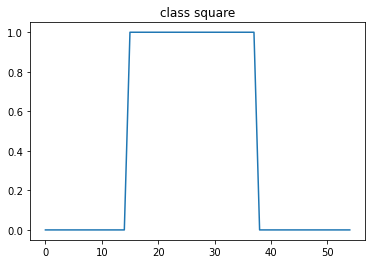

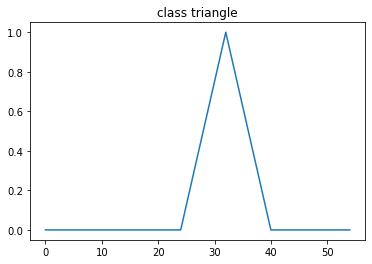

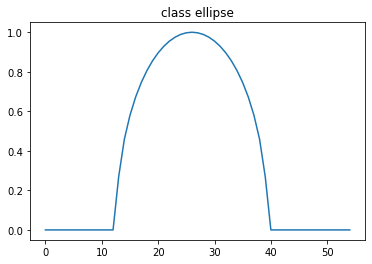

In [15]:
import matplotlib.pyplot as plt
def draw_curve(i):
    t = df_train[features].iloc[i]
    c = df_train['class'].iloc[i]
    plt.plot(list(t))
    plt.title(f'class {c}')
    plt.show()
draw_curve(0)
draw_curve(3)
draw_curve(5)

First, let's try to apply an MLP classifier to this problem. Note that we need to set the size of the last layer to be 3 since there are three output classes.

In [16]:
def create_mlp_model():
    # create model
    model = Sequential()
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax')) # output a vector of size 3
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])
    return model

In [17]:
# create model
model = KerasClassifier(build_fn=create_mlp_model,
                        epochs=10,
                        batch_size=20,
                        verbose=1)
# fit model
model.fit(x=df_train[features], y=df_train["class"])
# print summary
print (model.model.summary())
# predict on test set
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)

Epoch 1/10


 1/60 [..............................] - ETA: 42s - loss: 1.3345 - accuracy: 0.3000

59/60 [============================>.] - ETA: 0s - loss: 1.1221 - accuracy: 0.3353 

60/60 [==============================] - 1s 887us/step - loss: 1.1202 - accuracy: 0.3362


Epoch 2/10
 1/60 [..............................] - ETA: 0s - loss: 1.0337 - accuracy: 0.3000

60/60 [==============================] - ETA: 0s - loss: 0.9886 - accuracy: 0.4503

60/60 [==============================] - 0s 874us/step - loss: 0.9885 - accuracy: 0.4505


Epoch 3/10
 1/60 [..............................] - ETA: 0s - loss: 0.8173 - accuracy: 0.6500

60/60 [==============================] - ETA: 0s - loss: 0.9640 - accuracy: 0.4804

60/60 [==============================] - 0s 867us/step - loss: 0.9637 - accuracy: 0.4805


Epoch 4/10
 1/60 [..............................] - ETA: 0s - loss: 0.9918 - accuracy: 0.4000

60/60 [==============================] - 0s 838us/step - loss: 0.9337 - accuracy: 0.4779


Epoch 5/10
 1/60 [..............................] - ETA: 0s - loss: 0.8151 - accuracy: 0.5000

60/60 [==============================] - 0s 833us/step - loss: 0.8940 - accuracy: 0.5206


Epoch 6/10
 1/60 [..............................] - ETA: 0s - loss: 1.0053 - accuracy: 0.3000

60/60 [==============================] - 0s 843us/step - loss: 0.8936 - accuracy: 0.5456


Epoch 7/10
 1/60 [..............................] - ETA: 0s - loss: 0.9372 - accuracy: 0.4000

60/60 [==============================] - 0s 836us/step - loss: 0.8484 - accuracy: 0.5917


Epoch 8/10
 1/60 [..............................] - ETA: 0s - loss: 0.9467 - accuracy: 0.5000

60/60 [==============================] - ETA: 0s - loss: 0.8250 - accuracy: 0.5884

60/60 [==============================] - 0s 870us/step - loss: 0.8250 - accuracy: 0.5886


Epoch 9/10
 1/60 [..............................] - ETA: 0s - loss: 0.7673 - accuracy: 0.6500

60/60 [==============================] - 0s 820us/step - loss: 0.8117 - accuracy: 0.6119


Epoch 10/10
 1/60 [..............................] - ETA: 0s - loss: 0.7692 - accuracy: 0.6500

60/60 [==============================] - 0s 820us/step - loss: 0.7851 - accuracy: 0.6616


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (20, 64)                  3584      
_________________________________________________________________
dense_4 (Dense)              (20, 3)                   195       
Total params: 3,779
Trainable params: 3,779
Non-trainable params: 0
_________________________________________________________________
None


 1/15 [=>............................] - ETA: 1s

15/15 [==============================] - 0s 650us/step


accuracy:  0.6033333333333334


The accuracy of the MLP classifier is quite low considering the simplicity of this task. The major challenge of this task is that even for the same shapes, the positions where they appear in the sequence, and their sizes may vary. For example, let's look at some rectangles.

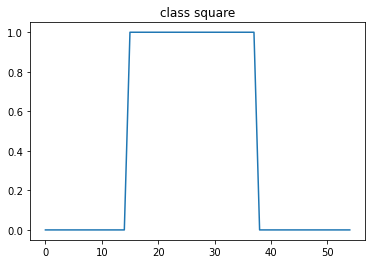

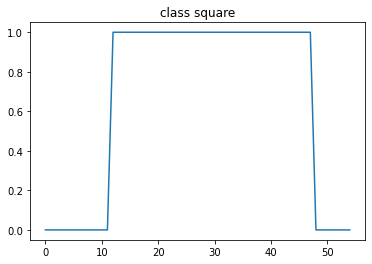

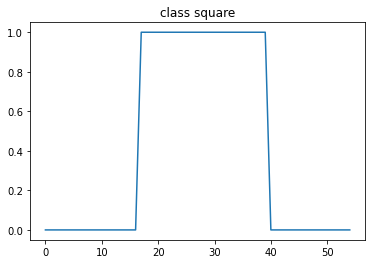

In [18]:
draw_curve(0)
draw_curve(1)
draw_curve(4)

👩🎓**Student question: Do you think MLPs are suitable for this task? Why or why not?**

In [19]:
#📝📝📝📝 FILLME
pass

### Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNNs) work by iteratively applying the same base operation to each element in the input sequence. To keep track of what it has seen so far, it also maintains an internal state. We call the base operation an RNN cell. Throughout this lab, we will use a special kind of RNN cell, a Long short-term memory (LSTM) cell due to its empirical successes.

Let's assume that we have a sequence of inputs $x_1, \ldots, x_T$. (We're notating the input elements as if they are scalars, but you should keep in mind that they might well be vectors themselves.) Let's consider a single update operation at step $t$, where the current internal state is denoted by $h_t$:

$h_{t+1} = {\text{LSTM}}_{\phi} (h_t, x_t)$,

where the LSTM cell has two inputs and one output: it uses both the input element $x_t$ and the old memory $h_t$ to compute the updated memory $h_{t+1}$. $\phi$ denotes the parameters of the LSTM cell, which we can adjust during training. For simplicy, we omit these parameters througout the rest of this lab. The internal computations of the LSTM cell are beyond the scope of this course, but for anyone interested in knowing further details, [this blog post](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) might be a good starting point.

Now that we have defined a single update step, we can chain them together to produce a summary of $x_1, \ldots, x_T$, starting from $h_0=0$:

\begin{align}
h_0 &= 0 \\
h_1 &= \text{LSTM} (h_0, x_1) \\ 
h_2 &= \text{LSTM} (h_1, x_2) \\ 
h_3 &= \text{LSTM} (h_2, x_3) \\ 
\vdots\\
h_T &= \text{LSTM} (h_{T-1}, x_T) \\ 
\end{align}"

$h_T$ can be used as a feature representation for the entire input sequence $x_1, \ldots, x_T$.

In `Keras`, the API for an LSTM cell is
```
LSTM(
    units,
    activation="tanh",
    recurrent_activation="sigmoid",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False,
    **kwargs
)
```
It appears intimidating, but we only need to set `units` in this lab. In a nutshell, it controls the size of the hidden states in the LSTM cell: the larger the size, the more powerful the model will be, but the more likely the model will overfit to training data (overfitting means memorizing the training data without being able to generlize to the test data).

In [20]:
from keras.layers import LSTM
hidden_size = 32
lstm_layer = LSTM(hidden_size)

This layer can be applied to a sequence of inputs $x_1, \ldots, x_T$, and the output will be the final hidden state $h_T$. Below shows an example of how to use this layer. Note that we need to use a `Reshape` layer to add one additional dimension to the input sequence since the expected input shape of the LSTM layer is `sequence_length x input size`, and the `input_size` in the case is 1 since $x_t$'s are scalars is 1.

In [21]:
input_shape = (input_length, 1)
model = Sequential()
model.add(Reshape(input_shape))
model.add(lstm_layer)
#
# take the first example as input
# input shape: num samples x input_length
# output shape: num samples x hidden size
inputs = tf.convert_to_tensor(df_train[features].iloc[:1])
output = model(inputs)
print (inputs.shape)
print (output.shape)

(1, 55)
(1, 32)


# Group Exercise A

## Question 0

Icebreakers

Who are other members of your group today?

📝📝📝📝 FILLME

* What's their favorite place?

📝📝📝📝 FILLME

* What are their goals by the end of the decade?

📝📝📝📝 FILLME

## Question 1

Look at this figure again. Can you figure out where are $h_t$'s and $x_t$'s? (Don't worry if you not understand the entire diagram does for now, we will elaborate on it later)**

![image](https://www.researchgate.net/profile/Huy-Tien-Nguyen/publication/321259272/figure/fig2/AS:572716866433034@1513557749934/Illustration-of-our-LSTM-model-for-sentiment-classification-Each-word-is-transfered-to-a_W640.jpg)

In [22]:
#📝📝📝📝 FILLME
pass

Why can LSTMs process variable length inputs?

In [23]:
#📝📝📝📝 FILLME
pass

## Question 2

Modify the MLP code to use LSTM instead. We recommend using a hidden size of 32 or 64. Train the model and report the test accuracy. You should expect to see at least 90% accuracy. Hint: don't forget the reshape layer before the LSTM!

In [24]:
#📝📝📝📝 FILLME
pass
#SOLUTION
def create_rnn_model():
    tf.random.set_seed(1234)
    # create model
    input_shape = (input_length, 1)
    model = Sequential()
    model.add(Reshape(input_shape))
    model.add(LSTM(32))
    model.add(Dense(3, activation='softmax')) # output a vector of size 3
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])
    return model
#
# create model
model = KerasClassifier(build_fn=create_rnn_model,
                         epochs=10,
                         batch_size=20,
                         verbose=1)
# fit model
model.fit(x=df_train[features], y=df_train["class"])
# print summary
print (model.model.summary())
# predict on test set
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)

Epoch 1/10


 1/60 [..............................] - ETA: 7:55 - loss: 1.1014 - accuracy: 0.5000

 6/60 [==>...........................] - ETA: 0s - loss: 1.1029 - accuracy: 0.4282  

11/60 [====>.........................] - ETA: 0s - loss: 1.1023 - accuracy: 0.4007

16/60 [=======>......................] - ETA: 0s - loss: 1.1019 - accuracy: 0.3841

21/60 [=========>....................] - ETA: 0s - loss: 1.1014 - accuracy: 0.3825

26/60 [============>.................] - ETA: 0s - loss: 1.1009 - accuracy: 0.3839

31/60 [==============>...............] - ETA: 0s - loss: 1.1003 - accuracy: 0.3869

36/60 [=================>............] - ETA: 0s - loss: 1.0995 - accuracy: 0.3897

41/60 [===================>..........] - ETA: 0s - loss: 1.0985 - accuracy: 0.3911

46/60 [======================>.......] - ETA: 0s - loss: 1.0975 - accuracy: 0.3913

51/60 [========================>.....] - ETA: 0s - loss: 1.0962 - accuracy: 0.3910

56/60 [===========================>..] - ETA: 0s - loss: 1.0945 - accuracy: 0.3908

60/60 [==============================] - 9s 11ms/step - loss: 1.0924 - accuracy: 0.3909


Epoch 2/10
 1/60 [..............................] - ETA: 0s - loss: 0.9779 - accuracy: 0.5000

 6/60 [==>...........................] - ETA: 0s - loss: 0.9539 - accuracy: 0.5143

11/60 [====>.........................] - ETA: 0s - loss: 0.9439 - accuracy: 0.5369

16/60 [=======>......................] - ETA: 0s - loss: 0.9345 - accuracy: 0.5491

21/60 [=========>....................] - ETA: 0s - loss: 0.9286 - accuracy: 0.5603

26/60 [============>.................] - ETA: 0s - loss: 0.9233 - accuracy: 0.5669

31/60 [==============>...............] - ETA: 0s - loss: 0.9186 - accuracy: 0.5705

36/60 [=================>............] - ETA: 0s - loss: 0.9145 - accuracy: 0.5731

41/60 [===================>..........] - ETA: 0s - loss: 0.9104 - accuracy: 0.5762

46/60 [======================>.......] - ETA: 0s - loss: 0.9068 - accuracy: 0.5785

51/60 [========================>.....] - ETA: 0s - loss: 0.9039 - accuracy: 0.5799

56/60 [===========================>..] - ETA: 0s - loss: 0.9009 - accuracy: 0.5812

60/60 [==============================] - 1s 10ms/step - loss: 0.8978 - accuracy: 0.5822


Epoch 3/10


 1/60 [..............................] - ETA: 0s - loss: 0.8209 - accuracy: 0.6500

 6/60 [==>...........................] - ETA: 0s - loss: 0.7841 - accuracy: 0.6883

11/60 [====>.........................] - ETA: 0s - loss: 0.7919 - accuracy: 0.6641

16/60 [=======>......................] - ETA: 0s - loss: 0.7914 - accuracy: 0.6505

21/60 [=========>....................] - ETA: 0s - loss: 0.7869 - accuracy: 0.6462

26/60 [============>.................] - ETA: 0s - loss: 0.7840 - accuracy: 0.6443

31/60 [==============>...............] - ETA: 0s - loss: 0.7837 - accuracy: 0.6407

36/60 [=================>............] - ETA: 0s - loss: 0.7834 - accuracy: 0.6380

41/60 [===================>..........] - ETA: 0s - loss: 0.7829 - accuracy: 0.6358

46/60 [======================>.......] - ETA: 0s - loss: 0.7823 - accuracy: 0.6336

51/60 [========================>.....] - ETA: 0s - loss: 0.7811 - accuracy: 0.6323

56/60 [===========================>..] - ETA: 0s - loss: 0.7794 - accuracy: 0.6318

60/60 [==============================] - 1s 11ms/step - loss: 0.7772 - accuracy: 0.6320


Epoch 4/10
 1/60 [..............................] - ETA: 0s - loss: 0.5832 - accuracy: 0.7500

 6/60 [==>...........................] - ETA: 0s - loss: 0.6005 - accuracy: 0.7401

11/60 [====>.........................] - ETA: 0s - loss: 0.6306 - accuracy: 0.7177

16/60 [=======>......................] - ETA: 0s - loss: 0.6414 - accuracy: 0.7108

21/60 [=========>....................] - ETA: 0s - loss: 0.6509 - accuracy: 0.7081

26/60 [============>.................] - ETA: 0s - loss: 0.6558 - accuracy: 0.7073

31/60 [==============>...............] - ETA: 0s - loss: 0.6567 - accuracy: 0.7077

36/60 [=================>............] - ETA: 0s - loss: 0.6556 - accuracy: 0.7076

41/60 [===================>..........] - ETA: 0s - loss: 0.6548 - accuracy: 0.7068

46/60 [======================>.......] - ETA: 0s - loss: 0.6539 - accuracy: 0.7065

51/60 [========================>.....] - ETA: 0s - loss: 0.6520 - accuracy: 0.7067

56/60 [===========================>..] - ETA: 0s - loss: 0.6497 - accuracy: 0.7072

60/60 [==============================] - 1s 10ms/step - loss: 0.6472 - accuracy: 0.7082


Epoch 5/10


 1/60 [..............................] - ETA: 0s - loss: 0.5066 - accuracy: 0.7500

 6/60 [==>...........................] - ETA: 0s - loss: 0.4879 - accuracy: 0.7826

11/60 [====>.........................] - ETA: 0s - loss: 0.4816 - accuracy: 0.7928

16/60 [=======>......................] - ETA: 0s - loss: 0.4773 - accuracy: 0.7974

21/60 [=========>....................] - ETA: 0s - loss: 0.4693 - accuracy: 0.8057

26/60 [============>.................] - ETA: 0s - loss: 0.4640 - accuracy: 0.8102

31/60 [==============>...............] - ETA: 0s - loss: 0.4619 - accuracy: 0.8122

36/60 [=================>............] - ETA: 0s - loss: 0.4593 - accuracy: 0.8144

41/60 [===================>..........] - ETA: 0s - loss: 0.4564 - accuracy: 0.8168

46/60 [======================>.......] - ETA: 0s - loss: 0.4539 - accuracy: 0.8189

51/60 [========================>.....] - ETA: 0s - loss: 0.4518 - accuracy: 0.8205

56/60 [===========================>..] - ETA: 0s - loss: 0.4512 - accuracy: 0.8216

60/60 [==============================] - 1s 11ms/step - loss: 0.4518 - accuracy: 0.8216


Epoch 6/10


 1/60 [..............................] - ETA: 0s - loss: 0.6795 - accuracy: 0.6500

 6/60 [==>...........................] - ETA: 0s - loss: 0.5801 - accuracy: 0.7425

11/60 [====>.........................] - ETA: 0s - loss: 0.6034 - accuracy: 0.7060

16/60 [=======>......................] - ETA: 0s - loss: 0.5937 - accuracy: 0.7101

21/60 [=========>....................] - ETA: 0s - loss: 0.5756 - accuracy: 0.7226

26/60 [============>.................] - ETA: 0s - loss: 0.5580 - accuracy: 0.7357

31/60 [==============>...............] - ETA: 0s - loss: 0.5429 - accuracy: 0.7475

36/60 [=================>............] - ETA: 0s - loss: 0.5288 - accuracy: 0.7589

41/60 [===================>..........] - ETA: 0s - loss: 0.5162 - accuracy: 0.7686

46/60 [======================>.......] - ETA: 0s - loss: 0.5045 - accuracy: 0.7771

51/60 [========================>.....] - ETA: 0s - loss: 0.4931 - accuracy: 0.7852

56/60 [===========================>..] - ETA: 0s - loss: 0.4823 - accuracy: 0.7926

60/60 [==============================] - 1s 10ms/step - loss: 0.4722 - accuracy: 0.7994


Epoch 7/10


 1/60 [..............................] - ETA: 0s - loss: 0.2370 - accuracy: 0.9500

 6/60 [==>...........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.9556

11/60 [====>.........................] - ETA: 0s - loss: 0.2132 - accuracy: 0.9566

16/60 [=======>......................] - ETA: 0s - loss: 0.2175 - accuracy: 0.9535

21/60 [=========>....................] - ETA: 0s - loss: 0.2205 - accuracy: 0.9516

26/60 [============>.................] - ETA: 0s - loss: 0.2236 - accuracy: 0.9502

31/60 [==============>...............] - ETA: 0s - loss: 0.2243 - accuracy: 0.9498

36/60 [=================>............] - ETA: 0s - loss: 0.2231 - accuracy: 0.9500

41/60 [===================>..........] - ETA: 0s - loss: 0.2209 - accuracy: 0.9507

46/60 [======================>.......] - ETA: 0s - loss: 0.2191 - accuracy: 0.9512

51/60 [========================>.....] - ETA: 0s - loss: 0.2186 - accuracy: 0.9509

56/60 [===========================>..] - ETA: 0s - loss: 0.2178 - accuracy: 0.9507

60/60 [==============================] - 1s 10ms/step - loss: 0.2169 - accuracy: 0.9507


Epoch 8/10


 1/60 [..............................] - ETA: 0s - loss: 0.3035 - accuracy: 0.8500

 6/60 [==>...........................] - ETA: 0s - loss: 0.1913 - accuracy: 0.9332

11/60 [====>.........................] - ETA: 0s - loss: 0.2302 - accuracy: 0.9215

16/60 [=======>......................] - ETA: 0s - loss: 0.2805 - accuracy: 0.8998

21/60 [=========>....................] - ETA: 0s - loss: 0.3065 - accuracy: 0.8885

26/60 [============>.................] - ETA: 0s - loss: 0.3162 - accuracy: 0.8840

31/60 [==============>...............] - ETA: 0s - loss: 0.3182 - accuracy: 0.8828

36/60 [=================>............] - ETA: 0s - loss: 0.3158 - accuracy: 0.8838

41/60 [===================>..........] - ETA: 0s - loss: 0.3120 - accuracy: 0.8855

46/60 [======================>.......] - ETA: 0s - loss: 0.3072 - accuracy: 0.8877

51/60 [========================>.....] - ETA: 0s - loss: 0.3018 - accuracy: 0.8903

56/60 [===========================>..] - ETA: 0s - loss: 0.2962 - accuracy: 0.8930

60/60 [==============================] - 1s 11ms/step - loss: 0.2906 - accuracy: 0.8958


Epoch 9/10


 1/60 [..............................] - ETA: 0s - loss: 0.0804 - accuracy: 1.0000

 6/60 [==>...........................] - ETA: 0s - loss: 0.0916 - accuracy: 0.9921

11/60 [====>.........................] - ETA: 0s - loss: 0.0930 - accuracy: 0.9912

16/60 [=======>......................] - ETA: 0s - loss: 0.0909 - accuracy: 0.9917

21/60 [=========>....................] - ETA: 0s - loss: 0.0890 - accuracy: 0.9920

26/60 [============>.................] - ETA: 0s - loss: 0.0874 - accuracy: 0.9921

31/60 [==============>...............] - ETA: 0s - loss: 0.0860 - accuracy: 0.9922

36/60 [=================>............] - ETA: 0s - loss: 0.0848 - accuracy: 0.9922

41/60 [===================>..........] - ETA: 0s - loss: 0.0842 - accuracy: 0.9920

46/60 [======================>.......] - ETA: 0s - loss: 0.0835 - accuracy: 0.9920

51/60 [========================>.....] - ETA: 0s - loss: 0.0828 - accuracy: 0.9920

56/60 [===========================>..] - ETA: 0s - loss: 0.0822 - accuracy: 0.9921

60/60 [==============================] - 1s 11ms/step - loss: 0.0815 - accuracy: 0.9921


Epoch 10/10
 1/60 [..............................] - ETA: 0s - loss: 0.0385 - accuracy: 1.0000

 6/60 [==>...........................] - ETA: 0s - loss: 0.0407 - accuracy: 1.0000

11/60 [====>.........................] - ETA: 0s - loss: 0.0459 - accuracy: 0.9981

16/60 [=======>......................] - ETA: 0s - loss: 0.0480 - accuracy: 0.9971

21/60 [=========>....................] - ETA: 0s - loss: 0.0556 - accuracy: 0.9942

26/60 [============>.................] - ETA: 0s - loss: 0.0615 - accuracy: 0.9913

31/60 [==============>...............] - ETA: 0s - loss: 0.0669 - accuracy: 0.9886

36/60 [=================>............] - ETA: 0s - loss: 0.0705 - accuracy: 0.9867

41/60 [===================>..........] - ETA: 0s - loss: 0.0725 - accuracy: 0.9856

46/60 [======================>.......] - ETA: 0s - loss: 0.0746 - accuracy: 0.9844

52/60 [=========================>....] - ETA: 0s - loss: 0.0782 - accuracy: 0.9828

57/60 [===========================>..] - ETA: 0s - loss: 0.0824 - accuracy: 0.9811

60/60 [==============================] - 1s 10ms/step - loss: 0.0855 - accuracy: 0.9799


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (20, 55, 1)               0         
_________________________________________________________________
lstm_1 (LSTM)                (20, 32)                  4352      
_________________________________________________________________
dense_5 (Dense)              (20, 3)                   99        
Total params: 4,451
Trainable params: 4,451
Non-trainable params: 0
_________________________________________________________________
None


 1/15 [=>............................] - ETA: 6s

12/15 [=======================>......] - ETA: 0s

15/15 [==============================] - 1s 5ms/step


accuracy:  0.9833333333333333


## Unit B

### Recurrent Neural Networks for Text Classification

Now let's go to a real application: text classification. Text classification raises new challenges, as the inputs are strings instead of the numeric values we have been familiar with in this course. In this unit, we will first find a suitable feature representation for the text input, and then we will apply an LSTM-based model to this task.

The text classification task we will be working with is sentiment analysis,  where the goal is to classify the sentiment of a text sequence. In particular, we will use the Stanford Sentiment Treebank v2 (SST-2) dataset, where we want to predict the sentiment (positive or negative) for a movie review.

In [25]:
df_train = pd.read_csv('sst_movie_reviews_processed_train.csv.gz', compression='gzip')
df_test = pd.read_csv('sst_movie_reviews_processed_test.csv.gz', compression='gzip')
df_train[:10]

,class,0,1,2,3,4,5,6,7,8,...,45,46,47,48,49,50,51,52,53,54
0,positive,an,ambitious,',what,if,?,',PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
1,positive,a,great,cast,and,a,wonderful,but,sometimes,confusing,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
2,positive,remarkable,for,its,intelligence,and,intensity,.,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
3,positive,steven,soderbergh,',s,digital,video,experiment,is,a,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
4,positive,a,whole,lot,of,fun,and,funny,in,the,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
5,positive,constantly,touching,",",surprisingly,funny,",",OOV,exploration,of,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
6,negative,it,',s,as,if,allen,",",at,OOV,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
7,negative,check,your,brain,and,your,secret,agent,OOV,ring,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
8,negative,it,',s,just,hard,to,believe,that,a,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
9,negative,the,rollerball,sequences,feel,OOV,and,OOV,.,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD


The column `class` stores the sentiment of each review, which is either "positive" or "negative".

In [26]:
df_train[:100]["class"].unique()

array(['positive', 'negative'], dtype=object)

The other columns store the words, where the i-th word is stored in a feature column i (counting from 0). For example, the first word of each movie review is stored in column 0, the second word is stored in column 1, and so on. As before, we store all feature column names in a list. The maximum length of sentences is 55 on this dataset, so we have 55 feature columns.

In [27]:
input_length = 55
features = []
for i in range(input_length):
    features.append(str(i))

Notice that some tokens towards the end are `PAD`. They are actually placeholders to pad every sentence into the same length such that we can store them in a table.

In [28]:
data = df_train[features].values
labels = df_train['class'].values
print (labels[1], data[1])
print (labels[8], data[8])

positive ['a' 'great' 'cast' 'and' 'a' 'wonderful' 'but' 'sometimes' 'confusing'
 'OOV' 'movie' 'about' 'growing' 'up' 'in' 'a' 'dysfunctional' 'family'
 '.' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD']
negative ['it' "'" 's' 'just' 'hard' 'to' 'believe' 'that' 'a' 'life' 'like' 'this'
 'can' 'sound' 'so' 'dull' '.' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD'
 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD' 'PAD']


### Input Representation

Different from all examples we've seen so far, the input in text classification cannot be directly fed into a neural network, since they are strings but not numeric values. A natural idea is to associate each word type with an integer id, such that we can use those integer ids to represent words.

First, we need to build the mapping from word types to integer ids.

In [29]:
# build vocabulary
word2id = {}
id2word = {}
unassigned_id = 0
for review in data:
    for token in review:
        if token not in word2id:
            word2id[token] = unassigned_id
            id2word[unassigned_id] = token
            unassigned_id += 1
vocab_size = len(word2id)
print ('Vocab size: ', vocab_size)

Vocab size:  4823


With `word2id`, we can map a word to its associated id:

In [30]:
print (word2id['the'])

51


With `id2word`, we can map an integer id to the corresponding word:

In [31]:
print (id2word[51])

the


👩🎓**Student question: Convert the sentence "a great cast" to a sequence of integer ids using `word2id`.**

In [32]:
#📝📝📝📝 FILLME
pass
#SOLUTION
print (word2id['a'], word2id['great'], word2id['cast'])

7 8 9


👩🎓**Student question: Convert a sequence of integer ids `[7, 8, 9]` to the original sentence.**

In [33]:
#📝📝📝📝 FILLME
pass
#SOLUTION
print (id2word[7], id2word[8], id2word[9])

a great cast


Now we can convert all the strings into integer ids using those mappings.

In [34]:
def word_to_id(word):
    return word2id[word]
df_train[features] = df_train[features].applymap(word_to_id)
df_test[features] = df_test[features].applymap(word_to_id)
df_train[:10]

,class,0,1,2,3,4,5,6,7,8,...,45,46,47,48,49,50,51,52,53,54
0,positive,0,1,2,3,4,5,2,6,6,...,6,6,6,6,6,6,6,6,6,6
1,positive,7,8,9,10,7,11,12,13,14,...,6,6,6,6,6,6,6,6,6,6
2,positive,24,25,26,27,10,28,23,6,6,...,6,6,6,6,6,6,6,6,6,6
3,positive,29,30,2,31,32,33,34,35,7,...,6,6,6,6,6,6,6,6,6,6
4,positive,7,46,47,48,49,10,50,20,51,...,6,6,6,6,6,6,6,6,6,6
5,positive,58,59,38,60,50,38,15,61,48,...,6,6,6,6,6,6,6,6,6,6
6,negative,64,2,31,65,4,66,38,42,15,...,6,6,6,6,6,6,6,6,6,6
7,negative,70,71,72,10,71,73,74,15,75,...,6,6,6,6,6,6,6,6,6,6
8,negative,64,2,31,88,89,82,90,91,7,...,6,6,6,6,6,6,6,6,6,6
9,negative,51,98,99,100,15,10,15,23,6,...,6,6,6,6,6,6,6,6,6,6


### Word Embeddings

Now that we can convert the original text (a sequence of strings) into a sequence of integer ids, can we directly feed that into the LSTM layer as we did for the shape classification problem?

If we directly use those integer ids in the neural network, we are implicitly assuming that the word with id `1001` is closer to the word with id `1002` than it is to the word with id `10`. However, the way we constructed the mappings between word types and ids does not provide this property. 
Instead of directly using those word ids, for each word id, we maintain a different vector (usually termed an embedding), which can be stored in a matrix $E$ of size `vocab_size x embedding_size`. To get the word embedding for word id i, we can simply take the i-th row in the matrix $E_i$.

In `Keras`, this embedding matrix is maintained in an `Embedding` layer.
```
Embedding(
   input_dim,
   output_dim,
   embeddings_initializer="uniform",
   embeddings_regularizer=None,
   activity_regularizer=None,
   embeddings_constraint=None,
   mask_zero=False,
   input_length=None,
   **kwargs
)
```
Again, we don't need to use all arguments. The only two arguments that we need to understand are: `input_dim`, which is the size of the vocabulary `vocab_size`, and `output_dim`, which is the size of the word embeddings `embedding_size`.

In [35]:
from keras.layers import Embedding
model = Sequential()
embedding_size = 32
model.add(Embedding(vocab_size, embedding_size))
# The model will take as input an integer matrix of size (num_samples, input_length).
# The output_shape is (num_samples, input_length, embedding_size)
#
# take the first example as input
inputs = tf.convert_to_tensor(df_train[features].iloc[:1])
outputs = model(inputs)
print (inputs.shape)
print (outputs.shape)

(1, 55)
(1, 55, 32)


So now we have converted words to their word ids to their embeddings (token strings -> integer word ids -> vector word embeddings). (You might notice that the intermediate word id step is not necessary and we can directly map each word type to a word embedding: we used this intermediate word id step since tensors are easier to work with than strings, and we only need to do this conversion once for the dataset.)

👩🎓**Student question: By representing words as word embeddings, are we still making implicit assumptions that the 1001-st word is closer to the 1002-nd word than it is to the 10-th word?**

In [36]:
#📝📝📝📝 FILLME
pass

### Putting Everything Together

Now we can put everything together and assemble a model for text classification: we have converted the token strings into word ids. The model first uses an embedding layer to convert those word ids into word embeddings, then the LSTM runs on top of those word embeddings, and we use a final projection layer to project to the output shape.

# Group Exercise B

## Question 1

Take another look at this model diagram. Can you explain what's happening in this diagram? What are the modules used? What are the inputs and outputs of each module?

![image](https://www.researchgate.net/profile/Huy-Tien-Nguyen/publication/321259272/figure/fig2/AS:572716866433034@1513557749934/Illustration-of-our-LSTM-model-for-sentiment-classification-Each-word-is-transfered-to-a_W640.jpg)

In [37]:
#📝📝📝📝 FILLME
pass

## Question 2

Finish the `TODO`s in the `create_rnn_model` function, train the network and report the test accuracy.

In [38]:
#📝📝📝📝 FILLME
def create_rnn_model():
    tf.random.set_seed(1234)
    # create model
    model = Sequential()
    # TODO: add embedding layer with embedding_size 32
    pass
    # TODO: add LSTM layer with hidden_size 32
    pass
    model.add(Dense(2, activation='softmax')) 
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])
    return model
#
# create model
model = KerasClassifier(build_fn=create_rnn_model,
                        epochs=6,
                        batch_size=150,
                        verbose=1)
# fit model
model.fit(x=df_train[features], y=df_train["class"])
# print summary
print (model.model.summary())
# predict on test set
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)
pass
# SOLUTION
def create_rnn_model():
    tf.random.set_seed(1234)
    # create model
    model = Sequential()
    # TODO: add embedding layer
    model.add(Embedding(vocab_size, 32)) # output size: length, 32
    # TODO: add LSTM layer
    model.add(LSTM(32))
    model.add(Dense(2, activation='softmax')) 
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])
    return model
#
# create model
model = KerasClassifier(build_fn=create_rnn_model,
                        epochs=6,
                        batch_size=150,
                        verbose=1)
# fit model
model.fit(x=df_train[features], y=df_train["class"])
# print summary
print (model.model.summary())
# predict on test set
df_test["predict"] = model.predict(df_test[features])
correct = (df_test["predict"] == df_test["class"])
accuracy = correct.sum() / correct.size
print ("accuracy: ", accuracy)
pass

Epoch 1/6


 1/47 [..............................] - ETA: 24s - loss: 561.8223 - accuracy: 0.4933

47/47 [==============================] - 1s 913us/step - loss: 470.6189 - accuracy: 0.4892


Epoch 2/6
 1/47 [..............................] - ETA: 0s - loss: 331.2010 - accuracy: 0.5000

47/47 [==============================] - 0s 893us/step - loss: 318.7600 - accuracy: 0.5008


Epoch 3/6
 1/47 [..............................] - ETA: 0s - loss: 266.3055 - accuracy: 0.5200

47/47 [==============================] - 0s 923us/step - loss: 231.9498 - accuracy: 0.4877


Epoch 4/6
 1/47 [..............................] - ETA: 0s - loss: 215.0091 - accuracy: 0.4067

47/47 [==============================] - 0s 868us/step - loss: 154.8466 - accuracy: 0.4855


Epoch 5/6
 1/47 [..............................] - ETA: 0s - loss: 96.0688 - accuracy: 0.5000

47/47 [==============================] - 0s 875us/step - loss: 80.7914 - accuracy: 0.5069


Epoch 6/6
 1/47 [..............................] - ETA: 0s - loss: 34.5543 - accuracy: 0.4867

47/47 [==============================] - 0s 885us/step - loss: 38.9167 - accuracy: 0.4904


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 112       
Total params: 112
Trainable params: 112
Non-trainable params: 0
_________________________________________________________________
None


 1/13 [=>............................] - ETA: 0s

13/13 [==============================] - 0s 673us/step


accuracy:  0.49093904448105435


Epoch 1/6


 1/47 [..............................] - ETA: 1:33 - loss: 0.6932 - accuracy: 0.4000

 3/47 [>.............................] - ETA: 1s - loss: 0.6932 - accuracy: 0.4444  

 5/47 [==>...........................] - ETA: 1s - loss: 0.6931 - accuracy: 0.4606

 7/47 [===>..........................] - ETA: 1s - loss: 0.6930 - accuracy: 0.4719

 9/47 [====>.........................] - ETA: 1s - loss: 0.6930 - accuracy: 0.4784

11/47 [======>.......................] - ETA: 0s - loss: 0.6929 - accuracy: 0.4838

13/47 [=======>......................] - ETA: 0s - loss: 0.6928 - accuracy: 0.4878

15/47 [========>.....................] - ETA: 0s - loss: 0.6928 - accuracy: 0.4904

17/47 [=========>....................] - ETA: 0s - loss: 0.6929 - accuracy: 0.4924

19/47 [===========>..................] - ETA: 0s - loss: 0.6929 - accuracy: 0.4938

21/47 [============>.................] - ETA: 0s - loss: 0.6929 - accuracy: 0.4953

23/47 [=============>................] - ETA: 0s - loss: 0.6929 - accuracy: 0.4965

25/47 [==============>...............] - ETA: 0s - loss: 0.6929 - accuracy: 0.4976

27/47 [================>.............] - ETA: 0s - loss: 0.6929 - accuracy: 0.4987

29/47 [=================>............] - ETA: 0s - loss: 0.6929 - accuracy: 0.4998

32/47 [===================>..........] - ETA: 0s - loss: 0.6929 - accuracy: 0.5012

34/47 [====================>.........] - ETA: 0s - loss: 0.6928 - accuracy: 0.5020

36/47 [=====================>........] - ETA: 0s - loss: 0.6928 - accuracy: 0.5028

38/47 [=======================>......] - ETA: 0s - loss: 0.6928 - accuracy: 0.5035

40/47 [========================>.....] - ETA: 0s - loss: 0.6928 - accuracy: 0.5040

42/47 [=========================>....] - ETA: 0s - loss: 0.6928 - accuracy: 0.5045

44/47 [===========================>..] - ETA: 0s - loss: 0.6928 - accuracy: 0.5051

46/47 [============================>.] - ETA: 0s - loss: 0.6928 - accuracy: 0.5057

47/47 [==============================] - 3s 26ms/step - loss: 0.6928 - accuracy: 0.5062


Epoch 2/6


 1/47 [..............................] - ETA: 1s - loss: 0.6948 - accuracy: 0.4933

 3/47 [>.............................] - ETA: 1s - loss: 0.6940 - accuracy: 0.5015

 5/47 [==>...........................] - ETA: 1s - loss: 0.6938 - accuracy: 0.5036

 7/47 [===>..........................] - ETA: 1s - loss: 0.6937 - accuracy: 0.5034

 9/47 [====>.........................] - ETA: 0s - loss: 0.6936 - accuracy: 0.5051

11/47 [======>.......................] - ETA: 0s - loss: 0.6935 - accuracy: 0.5066

14/47 [=======>......................] - ETA: 0s - loss: 0.6933 - accuracy: 0.5091

16/47 [=========>....................] - ETA: 0s - loss: 0.6931 - accuracy: 0.5112

18/47 [==========>...................] - ETA: 0s - loss: 0.6930 - accuracy: 0.5132

20/47 [===========>..................] - ETA: 0s - loss: 0.6929 - accuracy: 0.5143

22/47 [=============>................] - ETA: 0s - loss: 0.6928 - accuracy: 0.5153

25/47 [==============>...............] - ETA: 0s - loss: 0.6928 - accuracy: 0.5164

27/47 [================>.............] - ETA: 0s - loss: 0.6927 - accuracy: 0.5169

29/47 [=================>............] - ETA: 0s - loss: 0.6927 - accuracy: 0.5172

31/47 [==================>...........] - ETA: 0s - loss: 0.6927 - accuracy: 0.5176

33/47 [====================>.........] - ETA: 0s - loss: 0.6927 - accuracy: 0.5179

35/47 [=====================>........] - ETA: 0s - loss: 0.6926 - accuracy: 0.5182

37/47 [======================>.......] - ETA: 0s - loss: 0.6926 - accuracy: 0.5185

39/47 [=======================>......] - ETA: 0s - loss: 0.6926 - accuracy: 0.5187

41/47 [=========================>....] - ETA: 0s - loss: 0.6926 - accuracy: 0.5188

43/47 [==========================>...] - ETA: 0s - loss: 0.6926 - accuracy: 0.5190

45/47 [===========================>..] - ETA: 0s - loss: 0.6926 - accuracy: 0.5191

47/47 [==============================] - 1s 26ms/step - loss: 0.6925 - accuracy: 0.5193


Epoch 3/6


 1/47 [..............................] - ETA: 1s - loss: 0.6893 - accuracy: 0.5533

 4/47 [=>............................] - ETA: 1s - loss: 0.6891 - accuracy: 0.5550

 6/47 [==>...........................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5512

 8/47 [====>.........................] - ETA: 0s - loss: 0.6900 - accuracy: 0.5453

10/47 [=====>........................] - ETA: 0s - loss: 0.6904 - accuracy: 0.5415

12/47 [======>.......................] - ETA: 0s - loss: 0.6908 - accuracy: 0.5372

14/47 [=======>......................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5340

16/47 [=========>....................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324

18/47 [==========>...................] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312

20/47 [===========>..................] - ETA: 0s - loss: 0.6911 - accuracy: 0.5304

22/47 [=============>................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5299

24/47 [==============>...............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5302

26/47 [===============>..............] - ETA: 0s - loss: 0.6904 - accuracy: 0.5306

28/47 [================>.............] - ETA: 0s - loss: 0.6901 - accuracy: 0.5313

30/47 [==================>...........] - ETA: 0s - loss: 0.6894 - accuracy: 0.5325

32/47 [===================>..........] - ETA: 0s - loss: 0.6887 - accuracy: 0.5340

34/47 [====================>.........] - ETA: 0s - loss: 0.6878 - accuracy: 0.5359

36/47 [=====================>........] - ETA: 0s - loss: 0.6869 - accuracy: 0.5379

38/47 [=======================>......] - ETA: 0s - loss: 0.6859 - accuracy: 0.5397

40/47 [========================>.....] - ETA: 0s - loss: 0.6849 - accuracy: 0.5417

42/47 [=========================>....] - ETA: 0s - loss: 0.6838 - accuracy: 0.5437

44/47 [===========================>..] - ETA: 0s - loss: 0.6827 - accuracy: 0.5459

46/47 [============================>.] - ETA: 0s - loss: 0.6815 - accuracy: 0.5480

47/47 [==============================] - 1s 26ms/step - loss: 0.6804 - accuracy: 0.5501


Epoch 4/6
 1/47 [..............................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7467

 3/47 [>.............................] - ETA: 1s - loss: 0.5530 - accuracy: 0.7222

 6/47 [==>...........................] - ETA: 1s - loss: 0.5606 - accuracy: 0.7102

 8/47 [====>.........................] - ETA: 0s - loss: 0.5574 - accuracy: 0.7129

10/47 [=====>........................] - ETA: 0s - loss: 0.5547 - accuracy: 0.7170

12/47 [======>.......................] - ETA: 0s - loss: 0.5529 - accuracy: 0.7208

14/47 [=======>......................] - ETA: 0s - loss: 0.5499 - accuracy: 0.7250

16/47 [=========>....................] - ETA: 0s - loss: 0.5469 - accuracy: 0.7287

18/47 [==========>...................] - ETA: 0s - loss: 0.5436 - accuracy: 0.7325

20/47 [===========>..................] - ETA: 0s - loss: 0.5404 - accuracy: 0.7359

22/47 [=============>................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7390

24/47 [==============>...............] - ETA: 0s - loss: 0.5346 - accuracy: 0.7420

26/47 [===============>..............] - ETA: 0s - loss: 0.5317 - accuracy: 0.7449

28/47 [================>.............] - ETA: 0s - loss: 0.5288 - accuracy: 0.7477

30/47 [==================>...........] - ETA: 0s - loss: 0.5261 - accuracy: 0.7501

32/47 [===================>..........] - ETA: 0s - loss: 0.5233 - accuracy: 0.7525

34/47 [====================>.........] - ETA: 0s - loss: 0.5205 - accuracy: 0.7548

36/47 [=====================>........] - ETA: 0s - loss: 0.5180 - accuracy: 0.7569

38/47 [=======================>......] - ETA: 0s - loss: 0.5155 - accuracy: 0.7589

40/47 [========================>.....] - ETA: 0s - loss: 0.5132 - accuracy: 0.7608

42/47 [=========================>....] - ETA: 0s - loss: 0.5110 - accuracy: 0.7626

44/47 [===========================>..] - ETA: 0s - loss: 0.5089 - accuracy: 0.7642

46/47 [============================>.] - ETA: 0s - loss: 0.5069 - accuracy: 0.7657

47/47 [==============================] - 1s 28ms/step - loss: 0.5050 - accuracy: 0.7672


Epoch 5/6


 1/47 [..............................] - ETA: 1s - loss: 0.3889 - accuracy: 0.8467

 3/47 [>.............................] - ETA: 1s - loss: 0.3870 - accuracy: 0.8496

 5/47 [==>...........................] - ETA: 1s - loss: 0.3840 - accuracy: 0.8505

 7/47 [===>..........................] - ETA: 1s - loss: 0.3755 - accuracy: 0.8543

 9/47 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8577

11/47 [======>.......................] - ETA: 0s - loss: 0.3631 - accuracy: 0.8600

13/47 [=======>......................] - ETA: 0s - loss: 0.3579 - accuracy: 0.8626

15/47 [========>.....................] - ETA: 0s - loss: 0.3527 - accuracy: 0.8650

17/47 [=========>....................] - ETA: 0s - loss: 0.3490 - accuracy: 0.8667

19/47 [===========>..................] - ETA: 0s - loss: 0.3455 - accuracy: 0.8682

21/47 [============>.................] - ETA: 0s - loss: 0.3422 - accuracy: 0.8695

23/47 [=============>................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8708

26/47 [===============>..............] - ETA: 0s - loss: 0.3356 - accuracy: 0.8724

28/47 [================>.............] - ETA: 0s - loss: 0.3332 - accuracy: 0.8734

30/47 [==================>...........] - ETA: 0s - loss: 0.3312 - accuracy: 0.8742

32/47 [===================>..........] - ETA: 0s - loss: 0.3294 - accuracy: 0.8750

34/47 [====================>.........] - ETA: 0s - loss: 0.3279 - accuracy: 0.8756

36/47 [=====================>........] - ETA: 0s - loss: 0.3264 - accuracy: 0.8762

38/47 [=======================>......] - ETA: 0s - loss: 0.3251 - accuracy: 0.8768

40/47 [========================>.....] - ETA: 0s - loss: 0.3239 - accuracy: 0.8772

42/47 [=========================>....] - ETA: 0s - loss: 0.3229 - accuracy: 0.8777

44/47 [===========================>..] - ETA: 0s - loss: 0.3219 - accuracy: 0.8781

46/47 [============================>.] - ETA: 0s - loss: 0.3210 - accuracy: 0.8784

47/47 [==============================] - 1s 25ms/step - loss: 0.3202 - accuracy: 0.8787


Epoch 6/6
 1/47 [..............................] - ETA: 1s - loss: 0.2965 - accuracy: 0.8467

 3/47 [>.............................] - ETA: 1s - loss: 0.3009 - accuracy: 0.8596

 5/47 [==>...........................] - ETA: 1s - loss: 0.2842 - accuracy: 0.8735

 7/47 [===>..........................] - ETA: 1s - loss: 0.2751 - accuracy: 0.8818

 9/47 [====>.........................] - ETA: 0s - loss: 0.2704 - accuracy: 0.8870

11/47 [======>.......................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8916

14/47 [=======>......................] - ETA: 0s - loss: 0.2578 - accuracy: 0.8970

16/47 [=========>....................] - ETA: 0s - loss: 0.2538 - accuracy: 0.8998

18/47 [==========>...................] - ETA: 0s - loss: 0.2503 - accuracy: 0.9022

20/47 [===========>..................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9042

22/47 [=============>................] - ETA: 0s - loss: 0.2442 - accuracy: 0.9061

24/47 [==============>...............] - ETA: 0s - loss: 0.2418 - accuracy: 0.9077

26/47 [===============>..............] - ETA: 0s - loss: 0.2396 - accuracy: 0.9091

28/47 [================>.............] - ETA: 0s - loss: 0.2380 - accuracy: 0.9103

30/47 [==================>...........] - ETA: 0s - loss: 0.2365 - accuracy: 0.9114

32/47 [===================>..........] - ETA: 0s - loss: 0.2350 - accuracy: 0.9124

34/47 [====================>.........] - ETA: 0s - loss: 0.2340 - accuracy: 0.9132

36/47 [=====================>........] - ETA: 0s - loss: 0.2332 - accuracy: 0.9139

38/47 [=======================>......] - ETA: 0s - loss: 0.2325 - accuracy: 0.9144

40/47 [========================>.....] - ETA: 0s - loss: 0.2320 - accuracy: 0.9148

42/47 [=========================>....] - ETA: 0s - loss: 0.2317 - accuracy: 0.9152

44/47 [===========================>..] - ETA: 0s - loss: 0.2314 - accuracy: 0.9155

47/47 [==============================] - ETA: 0s - loss: 0.2310 - accuracy: 0.9159

47/47 [==============================] - 1s 25ms/step - loss: 0.2309 - accuracy: 0.9160


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          154336    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 162,722
Trainable params: 162,722
Non-trainable params: 0
_________________________________________________________________
None


 1/13 [=>............................] - ETA: 5s

 7/13 [===============>..............] - ETA: 0s

13/13 [==============================] - ETA: 0s

13/13 [==============================] - 1s 9ms/step


accuracy:  0.8034047226798462


## Question 3

Word embeddings might sound like a very abstract concept: we are associating each word with a vector, but what do these vectors mean? What properties do they possess? In this question, we will use the [Tensorflow Embedding Projector](https://projector.tensorflow.org/) to explore some pretrained word embeddings. (We can also take our trained model and visualize the embeddings from the embedding layer, but we usually need to train on very large datasets to see meaningful visualizations)

[Embedding Projector](https://projector.tensorflow.org/)

This visualization tool visualizes word embeddings in a 3-D space, but keep in mind that those embeddings are actually of much higher dimensionality (`embedding_size` is 200 in the default setting), and their neighbors are found in the original (200-D) space, not the 3-D space, which might lead to some seemingly nearby points not being shown as nearest neighbors.

* Use the search tool in the right-side panel and search "smith". The point cloud in the middle pannel will show this word as well as its nearest neighbors. What did you observe about the neighbors of the word "smith"?

In [39]:
#📝📝📝📝 FILLME
pass

* Let's try another word "apple" and find its nearest neighbors. What's your observation? Is "apple" considered a fruit or a company here? Do you consider this an issue for using word embeddings to represent text?

In [40]:
#📝📝📝📝 FILLME
pass

## Question 4

Word embeddings are numeric representations of word types, hence they support algebraic operations. For example, we cannot compute `water + bird - air` in the string space, but we can compute `embedding_of_water + embedding_of_bird - embedding_of_air`. Then we can convert the resulting vector back to word by finding its nearest neighbors like we did in the previous question.

Let's use this demo to perform word algebra.

[Word Algebra](https://turbomaze.github.io/word2vecjson/)

* Use the tool under section "Word Algebra" to find the nearest neighbors of `water + bird -air`. What do you get?

In [41]:
#📝📝📝📝 FILLME
pass

* Can you find some other interesting examples?

In [42]:
#📝📝📝📝 FILLME
pass